In [191]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


In [1]:
# your code here 
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv('data/dataset.csv')

pd.set_option('display.max_columns', 500)

print(df.shape)

print("Column Names:")
print(df.columns)
print("\nData Types:")
print(df.dtypes)

(130, 34)
Column Names:
Index(['Age (years)', 'Gender',
       'Positive history of Parkinson disease in family',
       'Antidepressant therapy', 'Antiparkinsonian medication',
       'Antipsychotic medication', 'Benzodiazepine medication',
       'Levodopa equivalent (mg/day)', 'Clonazepam (mg/day)',
       'pasEntropy of speech timing (-)', 'pasRate of speech timing (-/min)',
       'pasAcceleration of speech timing (-/min2)',
       'pasDuration of pause intervals (ms)',
       'pasDuration of voiced intervals (ms)',
       'pasGaping in-between voiced intervals (-/min)',
       'pasDuration of unvoiced stops (ms)',
       'pasDecay of unvoiced fricatives (promile/min)',
       'pasRelative loudness of respiration (dB)',
       'pasPause intervals per respiration (-)',
       'pasRate of speech respiration (-/min)',
       'pasLatency of respiratory exchange (ms)',
       'monoEntropy of speech timing (-)', 'monoRate of speech timing (-/min)',
       'monoAcceleration of speech tim

count     130
unique      2
top       Yes
freq       80
Name: Pyn, dtype: object


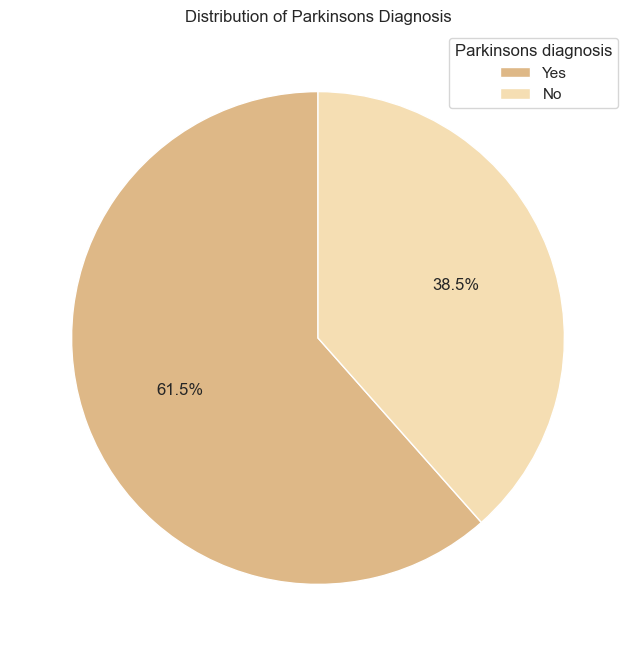

In [317]:
#EDA

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv('data/datasetyesno.csv')

import seaborn as sns

print(df['Pyn'].describe())

# Assuming 'df' is your DataFrame and 'Pyn' is the column to plot
values = df['Pyn'].value_counts()

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    values,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=['burlywood', 'wheat']
)

# Add a legend to the plot
plt.legend(values.index, title='Parkinsons diagnosis', loc='upper right')

# Set the title
plt.title('Distribution of Parkinsons Diagnosis')

# Save the plot
plt.savefig('parkinsons_distribution_plot.png', dpi=300)

# Display the plot
plt.show()


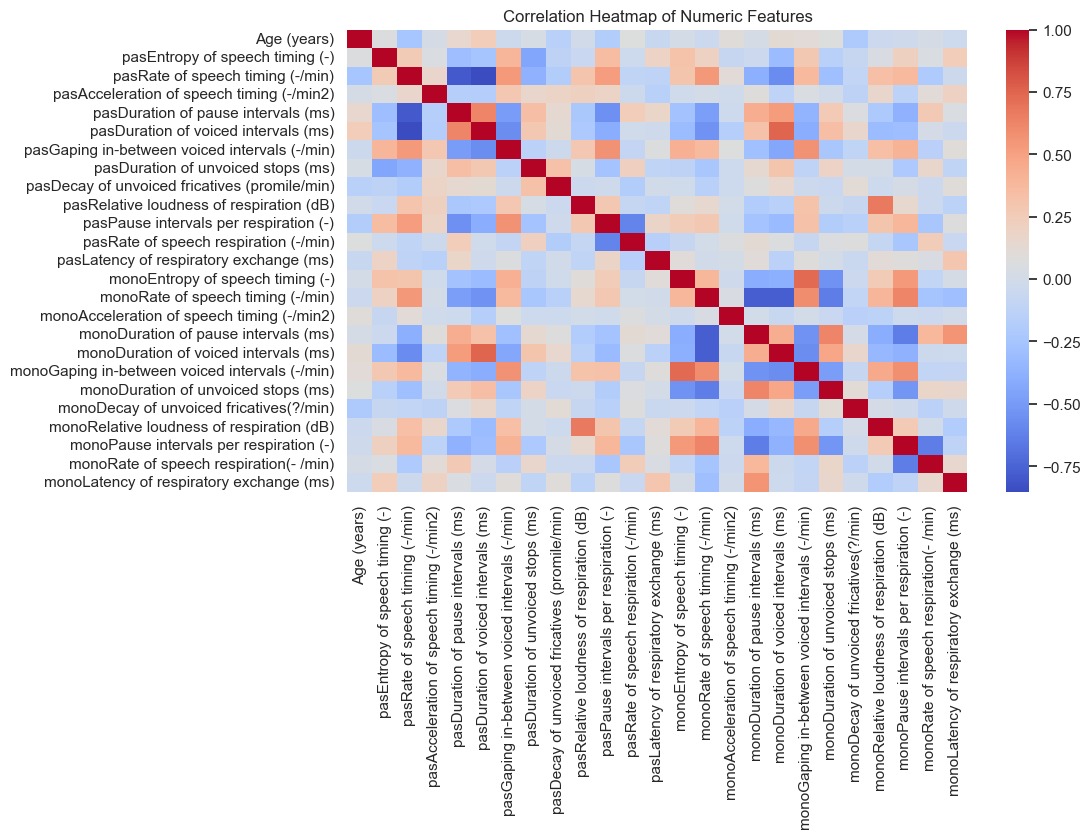

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('data/datasetyesno.csv')

# Exclude non-numeric columns from correlation calculation
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Exclude 'Levodopa equivalent (mg/day)' and 'Clonazepam (mg/day)' from the correlation matrix
exclude_features = ['Levodopa equivalent (mg/day)', 'Clonazepam (mg/day)']
correlation_matrix = numeric_features.drop(columns=exclude_features).corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')

# Save the heatmap as a PDF with 300 DPI
plt.savefig('correlation_heatmap.png', bbox_inches="tight", dpi=300)

# Display the plot
plt.show()



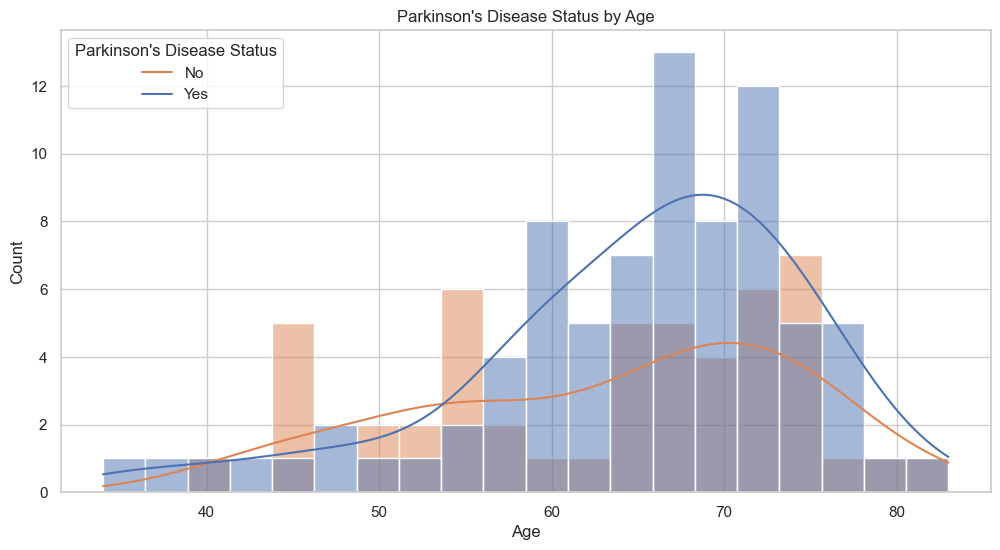

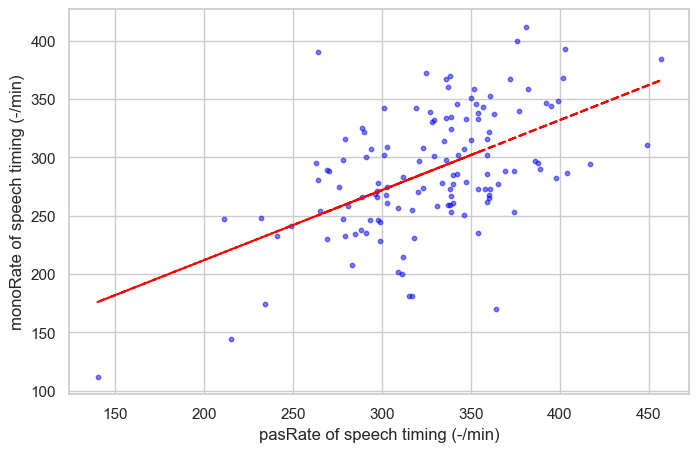

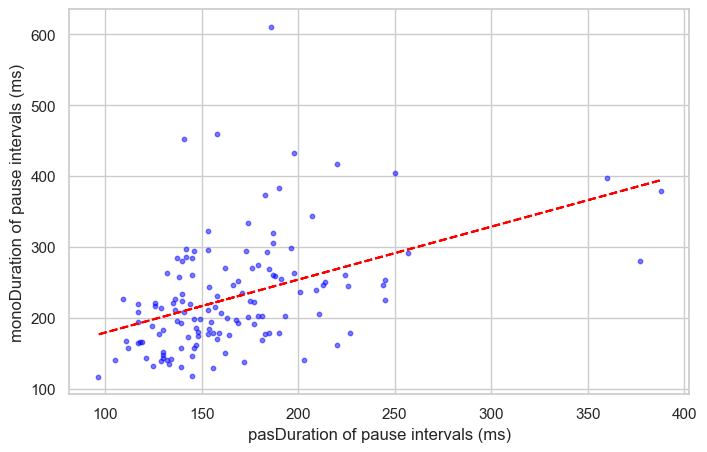

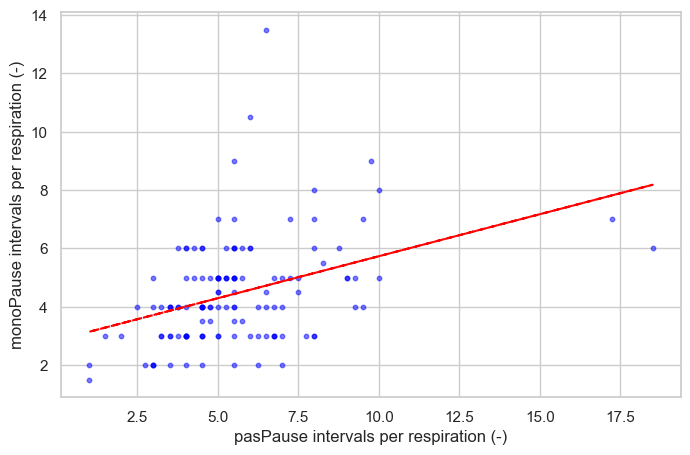

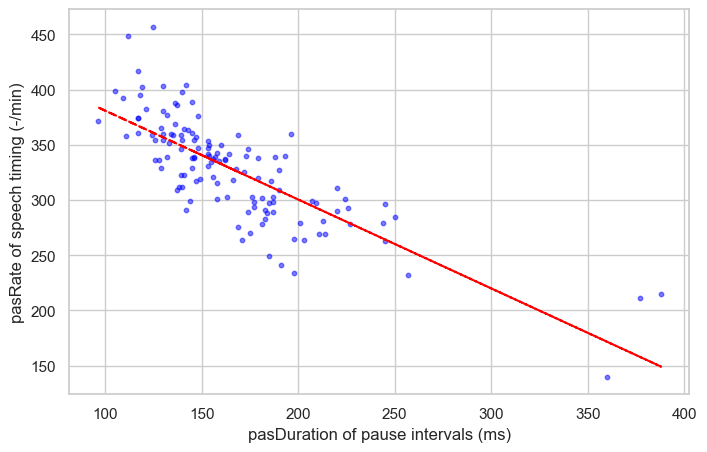

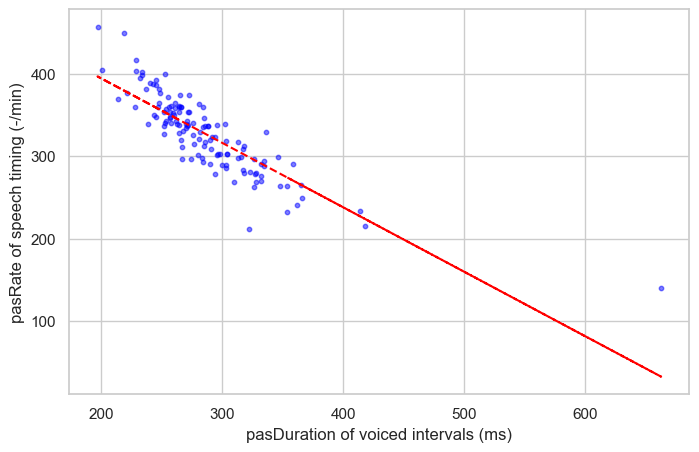

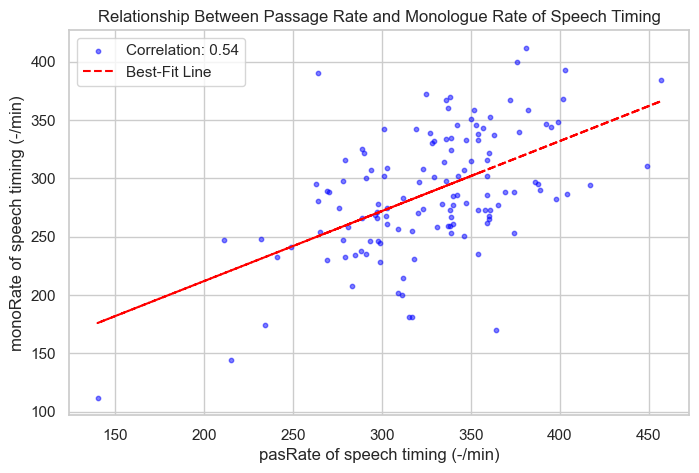

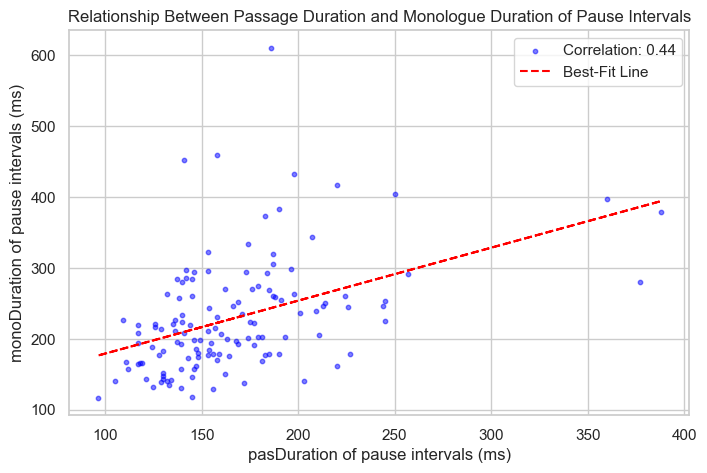

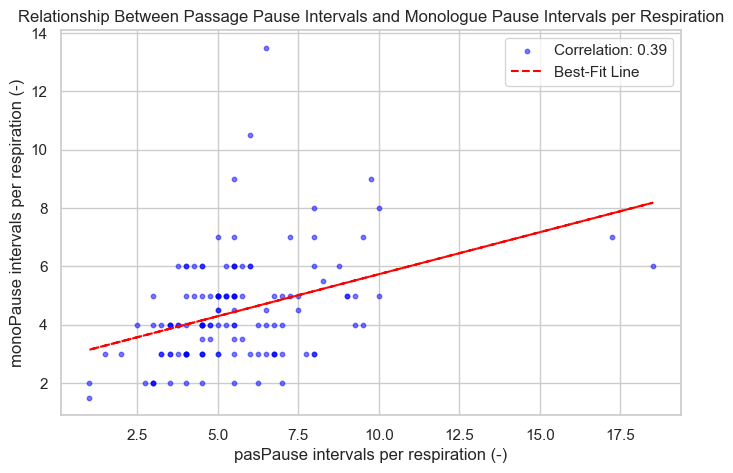

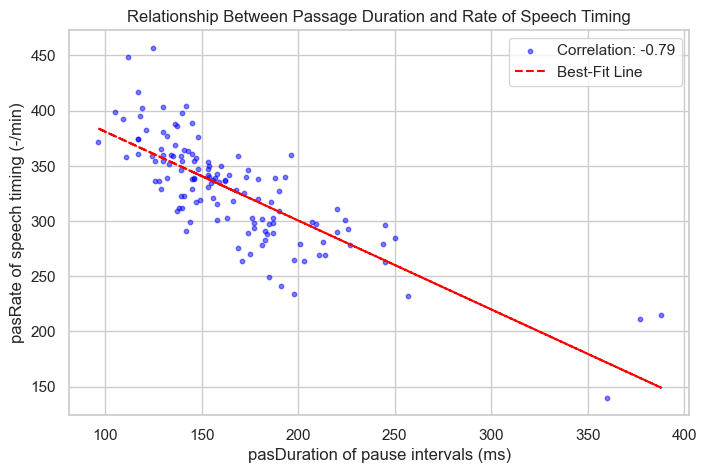

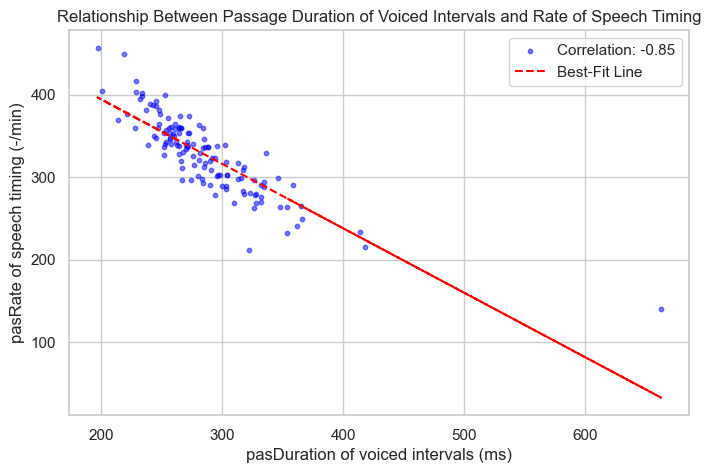

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('data/datasetyesno.csv')

# Parkinson's Disease Status by Age
plt.figure(figsize=(12, 6))
sns.histplot(x='Age (years)', hue='Pyn', data=df, bins=20, kde=True)
plt.title("Parkinson's Disease Status by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Parkinson's Disease Status", labels=["No", "Yes"])
plt.savefig('parkinson_disease_status_by_age.png', dpi=300)
plt.show()


# Relationship Between Passage Rate and Monologue Rate of Speech Timing
x = df['pasRate of speech timing (-/min)']
y = df['monoRate of speech timing (-/min)']

# Calculate the correlation coefficient
corr_coeff = df['pasRate of speech timing (-/min)'].corr(df['monoRate of speech timing (-/min)'])

# Create a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, s=10, color='blue', label=f'Correlation: {corr_coeff:.2f}')
plt.xlabel('pasRate of speech timing (-/min)')
plt.ylabel('monoRate of speech timing (-/min)')
# Add the best-fit line
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]
plt.plot(x, slope * x + intercept, color='red', linestyle='--', label='Best-Fit Line')
plt.savefig('relationship_passage_rate_monologue_rate.png', dpi=300)
plt.show()


# Relationship Between Passage Duration and Monologue Duration of Pause Intervals (ms)
x = df['pasDuration of pause intervals (ms)']
y = df['monoDuration of pause intervals (ms)']

# Calculate the correlation coefficient
corr_coeff = df['pasDuration of pause intervals (ms)'].corr(df['monoDuration of pause intervals (ms)'])

# Create a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, s=10, color='blue', label=f'Correlation: {corr_coeff:.2f}')
plt.xlabel('pasDuration of pause intervals (ms)')
plt.ylabel('monoDuration of pause intervals (ms)')
# Add the best-fit line
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]
plt.plot(x, slope * x + intercept, color='red', linestyle='--', label='Best-Fit Line')
plt.savefig('relationship_passage_duration_monologue_duration.png', dpi=300)
plt.show()


# Relationship between Passage Pause intervals and Monologue Pause intervals per Respiration (-)
x = df['pasPause intervals per respiration (-)']
y = df['monoPause intervals per respiration (-)']

# Calculate the correlation coefficient
corr_coeff = df['pasPause intervals per respiration (-)'].corr(df['monoPause intervals per respiration (-)'])

# Create a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, s=10, color='blue', label=f'Correlation: {corr_coeff:.2f}')
plt.xlabel('pasPause intervals per respiration (-)')
plt.ylabel('monoPause intervals per respiration (-)')
# Add the best-fit line
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]
plt.plot(x, slope * x + intercept, color='red', linestyle='--', label='Best-Fit Line')
plt.savefig('relationship_passage_pause_intervals_monologue_pause_intervals.png', dpi=300)
plt.show()


# Relationship between Passage Duration of Pause intervals and Passage Rate of Speech Timing
x = df['pasDuration of pause intervals (ms)']
y = df['pasRate of speech timing (-/min)']

# Calculate the correlation coefficient
corr_coeff = df['pasDuration of pause intervals (ms)'].corr(df['pasRate of speech timing (-/min)'])

# Create a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, s=10, color='blue', label=f'Correlation: {corr_coeff:.2f}')
plt.xlabel('pasDuration of pause intervals (ms)')
plt.ylabel('pasRate of speech timing (-/min)')
# Add the best-fit line
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]
plt.plot(x, slope * x + intercept, color='red', linestyle='--', label='Best-Fit Line')
plt.savefig('relationship_passage_duration_rate_of_speech_timing.png', dpi=300)
plt.show()


# Relationship between Passage Duration of Voiced Intervals and Passage Rate of Speech Timing
x = df['pasDuration of voiced intervals (ms)']
y = df['pasRate of speech timing (-/min)']

# Calculate the correlation coefficient
corr_coeff = df['pasDuration of voiced intervals (ms)'].corr(df['pasRate of speech timing (-/min)'])

# Create a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, s=10, color='blue', label=f'Correlation: {corr_coeff:.2f}')
plt.xlabel('pasDuration of voiced intervals (ms)')
plt.ylabel('pasRate of speech timing (-/min)')
# Add the best-fit line
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]
plt.plot(x, slope * x + intercept, color='red', linestyle='--', label='Best-Fit Line')
plt.savefig('relationship_passage_duration_voiced_intervals_rate_of_speech_timing.png', dpi=300)
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming df is your DataFrame

# Relationship Between Passage Rate and Monologue Rate of Speech Timing
x = df['pasRate of speech timing (-/min)']
y = df['monoRate of speech timing (-/min)']

# Calculate the correlation coefficient
corr_coeff = df['pasRate of speech timing (-/min)'].corr(df['monoRate of speech timing (-/min)'])

# Create a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, s=10, color='blue', label=f'Correlation: {corr_coeff:.2f}')
plt.xlabel('pasRate of speech timing (-/min)')
plt.ylabel('monoRate of speech timing (-/min)')
plt.title('Relationship Between Passage Rate and Monologue Rate of Speech Timing')
# Add the best-fit line
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]
plt.plot(x, slope * x + intercept, color='red', linestyle='--', label='Best-Fit Line')
plt.legend()
plt.savefig('relationship_passage_rate_monologue_rate.png', dpi=300)
plt.show()


# Relationship Between Passage Duration and Monologue Duration of Pause Intervals (ms)
x = df['pasDuration of pause intervals (ms)']
y = df['monoDuration of pause intervals (ms)']

# Calculate the correlation coefficient
corr_coeff = df['pasDuration of pause intervals (ms)'].corr(df['monoDuration of pause intervals (ms)'])

# Create a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, s=10, color='blue', label=f'Correlation: {corr_coeff:.2f}')
plt.xlabel('pasDuration of pause intervals (ms)')
plt.ylabel('monoDuration of pause intervals (ms)')
plt.title('Relationship Between Passage Duration and Monologue Duration of Pause Intervals')
# Add the best-fit line
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]
plt.plot(x, slope * x + intercept, color='red', linestyle='--', label='Best-Fit Line')
plt.legend()
plt.savefig('relationship_passage_duration_monologue_duration.png', dpi=300)
plt.show()


# Relationship between Passage Pause intervals and Monologue Pause intervals per Respiration (-)
x = df['pasPause intervals per respiration (-)']
y = df['monoPause intervals per respiration (-)']

# Calculate the correlation coefficient
corr_coeff = df['pasPause intervals per respiration (-)'].corr(df['monoPause intervals per respiration (-)'])

# Create a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, s=10, color='blue', label=f'Correlation: {corr_coeff:.2f}')
plt.xlabel('pasPause intervals per respiration (-)')
plt.ylabel('monoPause intervals per respiration (-)')
plt.title('Relationship Between Passage Pause Intervals and Monologue Pause Intervals per Respiration')
# Add the best-fit line
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]
plt.plot(x, slope * x + intercept, color='red', linestyle='--', label='Best-Fit Line')
plt.legend()
plt.savefig('relationship_passage_pause_intervals_monologue_pause_intervals.png', dpi=300)
plt.show()


# Relationship between Passage Duration of Pause intervals and Passage Rate of Speech Timing
x = df['pasDuration of pause intervals (ms)']
y = df['pasRate of speech timing (-/min)']

# Calculate the correlation coefficient
corr_coeff = df['pasDuration of pause intervals (ms)'].corr(df['pasRate of speech timing (-/min)'])

# Create a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, s=10, color='blue', label=f'Correlation: {corr_coeff:.2f}')
plt.xlabel('pasDuration of pause intervals (ms)')
plt.ylabel('pasRate of speech timing (-/min)')
plt.title('Relationship Between Passage Duration and Rate of Speech Timing')
# Add the best-fit line
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]
plt.plot(x, slope * x + intercept, color='red', linestyle='--', label='Best-Fit Line')
plt.legend()
plt.savefig('relationship_passage_duration_rate_of_speech_timing.png', dpi=300)
plt.show()


# Relationship between Passage Duration of Voiced Intervals and Passage Rate of Speech Timing
x = df['pasDuration of voiced intervals (ms)']
y = df['pasRate of speech timing (-/min)']

# Calculate the correlation coefficient
corr_coeff = df['pasDuration of voiced intervals (ms)'].corr(df['pasRate of speech timing (-/min)'])

# Create a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5, s=10, color='blue', label=f'Correlation: {corr_coeff:.2f}')
plt.xlabel('pasDuration of voiced intervals (ms)')
plt.ylabel('pasRate of speech timing (-/min)')
plt.title('Relationship Between Passage Duration of Voiced Intervals and Rate of Speech Timing')
# Add the best-fit line
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]
plt.plot(x, slope * x + intercept, color='red', linestyle='--', label='Best-Fit Line')
plt.legend()
plt.savefig('relationship_passage_duration_voiced_intervals_rate_of_speech_timing.png', dpi=300)
plt.show()


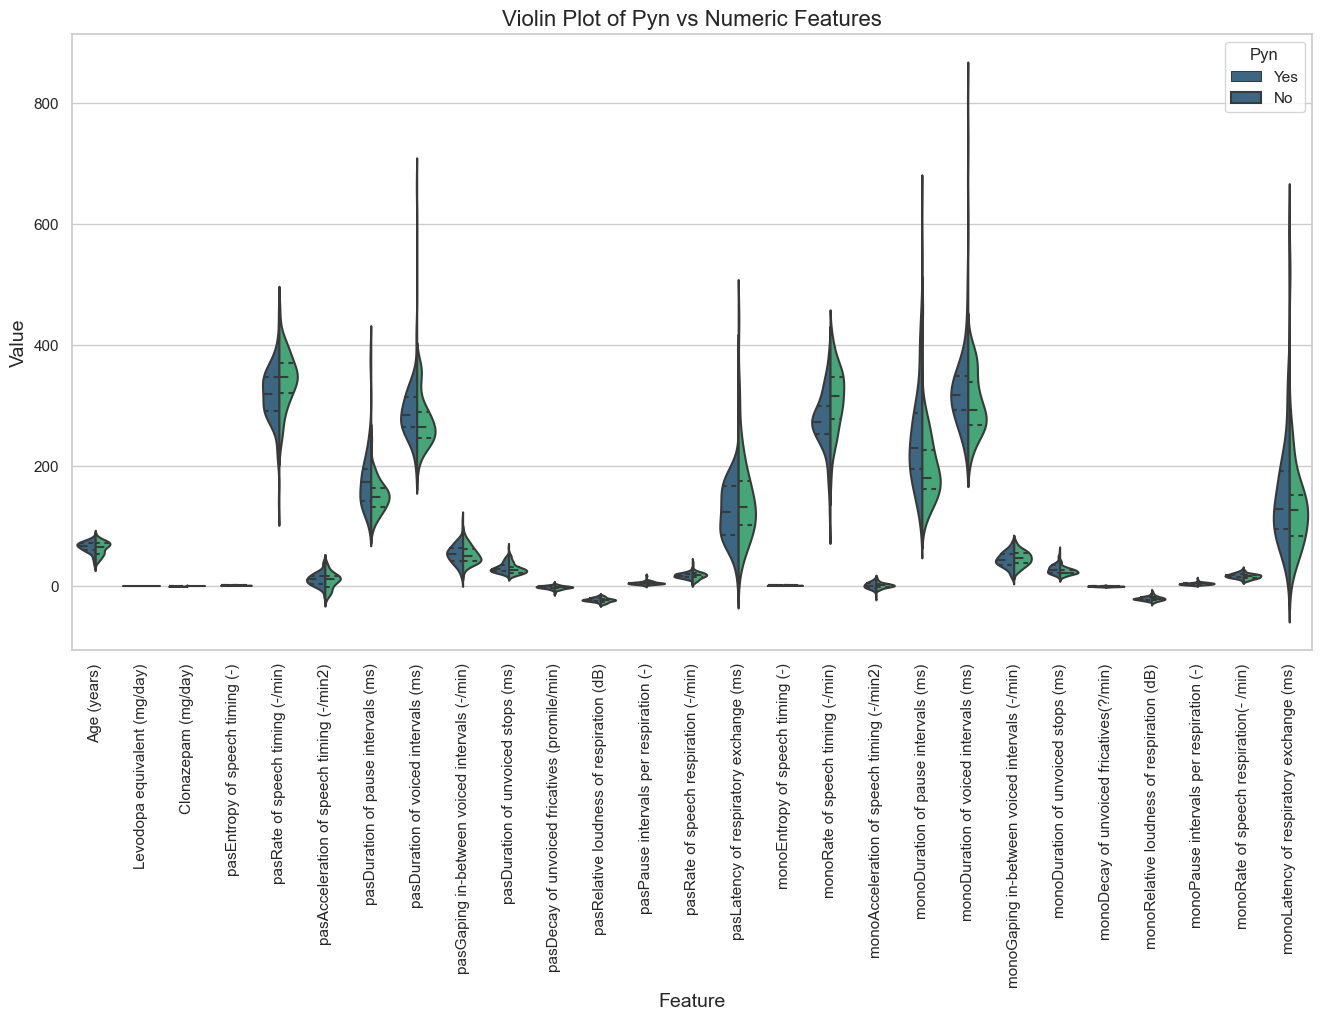

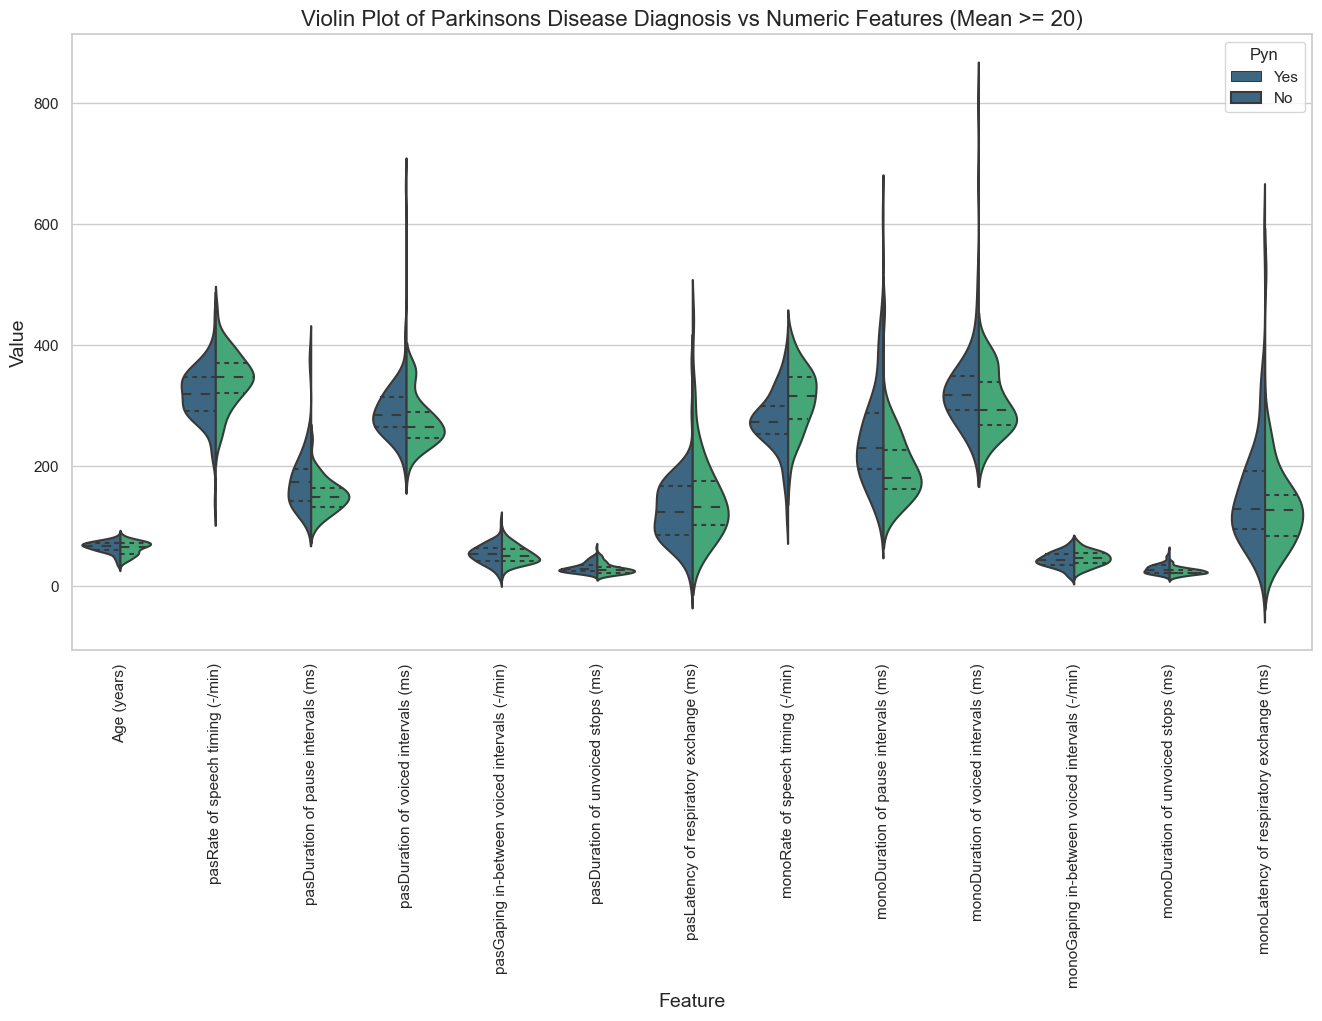

KeyError: 'value'

<Figure size 640x480 with 0 Axes>

In [337]:
#EDA


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame and 'Pyn' is the target variable
# Identify numeric features in the DataFrame
numeric_features = df.select_dtypes(include='number').columns.tolist()

# Filter the DataFrame to include only numeric columns
numeric_df = df[numeric_features + ['Pyn']]

# Create a single violin plot with 'Yes' on the left and 'No' on the right
plt.figure(figsize=(16, 8))
violin_plot = sns.violinplot(x='variable', y='value', hue='Pyn', data=pd.melt(numeric_df, id_vars='Pyn'), palette='viridis', split=True, inner='quartile')

# Rotate x-axis ticks by 90 degrees
violin_plot.set_xticklabels(violin_plot.get_xticklabels(), rotation=90)

plt.title("Violin Plot of Pyn vs Numeric Features", fontsize=16)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(title="Pyn", loc='upper right', labels=['Yes', 'No'])
plt.show()

#filter out features with mean values less than 20

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame and 'Pyn' is the target variable
# Identify numeric features in the DataFrame
numeric_features = df.select_dtypes(include='number').columns.tolist()

# Filter the DataFrame to include only numeric columns
numeric_df = df[numeric_features + ['Pyn']]

# Calculate mean values for each numeric feature
feature_means = numeric_df.drop('Pyn', axis=1).mean()

# Filter out features with mean values less than 20
selected_features = feature_means[feature_means >= 20].index.tolist()

# Update numeric_df with selected features
numeric_df_filtered = numeric_df[selected_features + ['Pyn']]

# Create a single violin plot with 'Yes' on the left and 'No' on the right
plt.figure(figsize=(16, 8))
violin_plot = sns.violinplot(x='variable', y='value', hue='Pyn', data=pd.melt(numeric_df_filtered, id_vars='Pyn'), palette='viridis', split=True, inner='quartile')
violin_plot.set_xticklabels(violin_plot.get_xticklabels(), rotation=90)
plt.title("Violin Plot of Parkinsons Disease Diagnosis vs Numeric Features", fontsize=16)
plt.savefig('Violin Plot of Parkinsons Disease Diagnosis vs Numeric Features', bbox_inches="tight", dpi=300)

# Rotate x-axis ticks by 90 degrees
violin_plot.set_xticklabels(violin_plot.get_xticklabels(), rotation=90)

plt.title("Violin Plot of Parkinsons Disease Diagnosis vs Numeric Features (Mean >= 20)", fontsize=16)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(title="Pyn", loc='upper right', labels=['Yes', 'No'])
violin_plot.set_xticklabels(violin_plot.get_xticklabels(), rotation=90)
plt.show()
plt.savefig('Violin Plot of Parkinsons Disease Diagnosis vs Numeric Features (Mean >= 20)', dpi=300)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame and 'Pyn' is the target variable
# Identify numeric features in the DataFrame
numeric_features = df.select_dtypes(include='number').columns.tolist()

# Filter the DataFrame to include only numeric columns
numeric_df = df[numeric_features + ['Pyn']]

# Calculate mean values for each numeric feature
feature_means = numeric_df.drop('Pyn', axis=1).mean()

# Filter out features with mean values less than 20
selected_features = feature_means[feature_means >= 20].index.tolist()

# Update numeric_df with selected features
numeric_df_filtered = numeric_df[selected_features + ['Pyn']]

# Normalize the y-axis to have a maximum of 1
max_value = numeric_df_filtered['value'].max()
numeric_df_filtered['value'] = numeric_df_filtered['value'] / max_value

# Create a single violin plot with 'Yes' on the left and 'No' on the right
plt.figure(figsize=(16, 8))
violin_plot = sns.violinplot(x='variable', y='value', hue='Pyn', data=pd.melt(numeric_df_filtered, id_vars='Pyn'), palette='viridis', split=True, inner='quartile')
violin_plot.set_xticklabels(violin_plot.get_xticklabels(), rotation=90)
plt.title("Violin Plot of Parkinsons Disease Diagnosis vs Numeric Features", fontsize=16)
plt.savefig('Violin Plot of Parkinsons Disease Diagnosis vs Numeric Features', bbox_inches="tight", dpi=300)

# Rotate x-axis ticks by 90 degrees
violin_plot.set_xticklabels(violin_plot.get_xticklabels(), rotation=90)

plt.title("Violin Plot of Parkinsons Disease Diagnosis vs Numeric Features (Mean >= 20)", fontsize=16)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Normalized Value", fontsize=14)  # Update ylabel to reflect normalization
plt.legend(title="Pyn", loc='upper right', labels=['Yes', 'No'])
violin_plot.set_xticklabels(violin_plot.get_xticklabels(), rotation=90)
plt.show()
plt.savefig('Violin Plot of Parkinsons Disease Diagnosis vs Numeric Features (Mean >= 20) - Normalized', dpi=300)


In [306]:
#Perform Spliting

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

#np.random.seed(0)

df = pd.read_csv('data/dataset.csv')

# let's separate the feature matrix X, and target variable y
y = df['Pyn'] 
X = df.loc[:, df.columns != 'Pyn'] # all other columns are features

#clean data

# Print the shape of the original data
print("Original Data Shape:", df.shape)

# Drop specified features
features_to_drop = ['Positive history of Parkinson disease in family', 'Antidepressant therapy',
                    'Antiparkinsonian medication', 'Antipsychotic medication', 'Benzodiazepine medication']
df_cleaned = df.drop(columns=features_to_drop, axis=1)

# Print the shape of the cleaned data
print("Cleaned Data Shape:", df_cleaned.shape)


random_state = 42

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)

print('training set:',X_train.shape, y_train.shape) # 60% of points are in train
print(X_other.shape, y_other.shape) # 40% of points are in other

print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
print('test set:',X_test.shape, y_test.shape) # 20% of points are in test


Original Data Shape: (130, 34)
Cleaned Data Shape: (130, 29)
training set: (78, 33) (78,)
(52, 33) (52,)
validation set: (26, 33) (26,)
test set: (26, 33) (26,)


In [305]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data
df = pd.read_csv('data/dataset.csv')

# Separate the feature matrix X and target variable y
y = df['Pyn']
X = df.drop(columns=['Pyn'])  # Drop the target variable

# Data cleaning
print("Original Data Shape:", df.shape)

# Drop specified features
features_to_drop = ['Positive history of Parkinson disease in family', 'Antidepressant therapy',
                    'Antiparkinsonian medication', 'Antipsychotic medication', 'Benzodiazepine medication']
df_cleaned = df.drop(columns=features_to_drop, axis=1)

print("Cleaned Data Shape:", df_cleaned.shape)

# Split the data
random_state = 42
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.6, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, train_size=0.5, random_state=random_state)

print('Training set:', X_train.shape, y_train.shape)
print('Other set:', X_other.shape, y_other.shape)
print('Validation set:', X_val.shape, y_val.shape)
print('Test set:', X_test.shape, y_test.shape)

# Preprocessing
minmax_ftrs = [
    'Age (years)', 'Levodopa equivalent (mg/day)', 'Clonazepam (mg/day)', 'pasEntropy of speech timing (-)',
    'monoEntropy of speech timing (-)', 'pasRate of speech timing (-/min)', 'monoRate of speech timing (-/min)',
    'pasAcceleration of speech timing (-/min2)', 'monoAcceleration of speech timing (-/min2)',
    'pasDuration of pause intervals (ms)', 'monoDuration of pause intervals (ms)',
    'pasDuration of voiced intervals (ms)', 'monoDuration of voiced intervals (ms)',
    'pasGaping in-between voiced intervals (-/min)', 'monoGaping in-between voiced intervals (-/min)',
    'pasDuration of unvoiced stops (ms)', 'monoDuration of unvoiced stops (ms)',
    'pasDecay of unvoiced fricatives (promile/min)', 'monoDecay of unvoiced fricatives(?/min)',
    'pasRelative loudness of respiration (dB)', 'monoRelative loudness of respiration (dB)',
    'pasPause intervals per respiration (-)', 'monoPause intervals per respiration (-)',
    'pasRate of speech respiration (-/min)', 'monoRate of speech respiration(- /min)',
    'pasLatency of respiratory exchange (ms)', 'monoLatency of respiratory exchange (ms)'
]

# Handle missing values before applying preprocessing
X_train = X_train.fillna(0)  # Replace missing values with 0
X_val = X_val.fillna(0)
X_test = X_test.fillna(0)

# Create a column transformer for encoding
preprocessor = ColumnTransformer(
    transformers=[('minmax', MinMaxScaler(), minmax_ftrs)]
)

# Create a pipeline for preprocessing
clf = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to the datasets
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

# Print the shapes of the datasets before and after preprocessing
print("Original Data Shapes:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)

print("Preprocessed Data Shapes:")
print("X_train_prep:", X_train_prep.shape)
print("X_val_prep:", X_val_prep.shape)
print("X_test_prep:", X_test_prep.shape)


Original Data Shape: (130, 34)
Cleaned Data Shape: (130, 29)
Training set: (78, 33) (78,)
Other set: (52, 33) (52,)
Validation set: (26, 33) (26,)
Test set: (26, 33) (26,)
Original Data Shapes:
X_train: (78, 33)
X_val: (26, 33)
X_test: (26, 33)
Preprocessed Data Shapes:
X_train_prep: (78, 27)
X_val_prep: (26, 27)
X_test_prep: (26, 27)


In [145]:
#Preprocessing

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

# Define the columns to be processed by different encoders
minmax_ftrs = [
    'Age (years)','Levodopa equivalent (mg/day)','Clonazepam (mg/day)','pasEntropy of speech timing (-)','monoEntropy of speech timing (-)',
    'pasRate of speech timing (-/min)', 'monoRate of speech timing (-/min)',
    'pasAcceleration of speech timing (-/min2)', 'monoAcceleration of speech timing (-/min2)',
    'pasDuration of pause intervals (ms)', 'monoDuration of pause intervals (ms)',
    'pasDuration of voiced intervals (ms)', 'monoDuration of voiced intervals (ms)',
    'pasGaping in-between voiced intervals (-/min)', 'monoGaping in-between voiced intervals (-/min)',
    'pasDuration of unvoiced stops (ms)', 'monoDuration of unvoiced stops (ms)',
    'pasDecay of unvoiced fricatives (promile/min)', 'monoDecay of unvoiced fricatives(?/min)',
    'pasRelative loudness of respiration (dB)', 'monoRelative loudness of respiration (dB)',
    'pasPause intervals per respiration (-)', 'monoPause intervals per respiration (-)',
    'pasRate of speech respiration (-/min)', 'monoRate of speech respiration(- /min)',
    'pasLatency of respiratory exchange (ms)', 'monoLatency of respiratory exchange (ms)'
]

# Create a column transformer for encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), minmax_ftrs)
    ])

# Create a pipeline for preprocessing
clf = Pipeline(steps=[('preprocessor', preprocessor)])

# Assuming you have defined X_train, X_val, and X_test elsewhere
# Apply preprocessing to the datasets
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

# Print the shapes of the datasets before and after preprocessing
print("Original Data Shapes:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)

print("Preprocessed Data Shapes:")
print("X_train_prep:", X_train_prep.shape)
print("X_val_prep:", X_val_prep.shape)
print("X_test_prep:", X_test_prep.shape)

# Print the names of the features before preprocessing
original_feature_names = X_train.columns.tolist()
print("Original Feature Names:", original_feature_names)

# Print the names of the features after preprocessing
feature_names_after_preprocessing = clf.named_steps['preprocessor'] \
    .named_transformers_['minmax'].get_feature_names_out(input_features=minmax_ftrs)

print("Feature Names After Preprocessing:", feature_names_after_preprocessing)

# Print the shapes of the datasets before and after preprocessing
print("Original Data Shapes:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)

print("Preprocessed Data Shapes:")
print("X_train_prep:", X_train_prep.shape)
print("X_val_prep:", X_val_prep.shape)
print("X_test_prep:", X_test_prep.shape)



Original Data Shapes:
X_train: (78, 33)
X_val: (26, 33)
X_test: (26, 33)
Preprocessed Data Shapes:
X_train_prep: (78, 27)
X_val_prep: (26, 27)
X_test_prep: (26, 27)
Original Feature Names: ['Age (years)', 'Gender', 'Positive history of Parkinson disease in family', 'Antidepressant therapy', 'Antiparkinsonian medication', 'Antipsychotic medication', 'Benzodiazepine medication', 'Levodopa equivalent (mg/day)', 'Clonazepam (mg/day)', 'pasEntropy of speech timing (-)', 'pasRate of speech timing (-/min)', 'pasAcceleration of speech timing (-/min2)', 'pasDuration of pause intervals (ms)', 'pasDuration of voiced intervals (ms)', 'pasGaping in-between voiced intervals (-/min)', 'pasDuration of unvoiced stops (ms)', 'pasDecay of unvoiced fricatives (promile/min)', 'pasRelative loudness of respiration (dB)', 'pasPause intervals per respiration (-)', 'pasRate of speech respiration (-/min)', 'pasLatency of respiratory exchange (ms)', 'monoEntropy of speech timing (-)', 'monoRate of speech timing (

In [309]:
#Perform Spliting

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

#np.random.seed(0)

df = pd.read_csv('data/dataset.csv')



# let's separate the feature matrix X, and target variable y
y = df['Pyn'] 
X = df.loc[:, df.columns != 'Pyn'] # all other columns are features

random_state = 42

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)

print('training set:',X_train.shape, y_train.shape) # 60% of points are in train
print(X_other.shape, y_other.shape) # 40% of points are in other

print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

#Print the first few rows of each set to check reproducibility
#print("Head of X_train:")
#print(X_train.head())

#print("\nHead of X_val:")
#print(X_val.head())

#print("\nHead of X_test:")
#print(X_test.head())


import pandas as pd

# Read the CSV file into a DataFrame
#df = pd.read_csv('data/dataset.csv')

# Display information about the DataFrame, including missing values
#df.info()


# Count missing values in each column
#missing_values = df.isnull().sum()

# Display the count of missing values
#print("Missing Values:")
#print(missing_values)



#Data cleaning

print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)


# Replace 0 with 'missing' in the specified column
column_name = 'Positive history of Parkinson disease in family'
df[column_name] = df[column_name].replace(0, 'missing')

# Print the DataFrame with 0 replaced by 'missing'
#print(df)

# Display a single column
column_name = 'Positive history of Parkinson disease in family'  # Replace with the name of the column you want to display
single_column = df[column_name]

# Print the single column
#print(single_column)

#Preprocessing

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

# Define the columns to be processed by different encoders
onehot_ftrs = ['Gender', 'Positive history of Parkinson disease in family','Antidepressant therapy','Antiparkinsonian medication','Antipsychotic medication','Benzodiazepine medication']
minmax_ftrs = [
    'Age (years)','Levodopa equivalent (mg/day)','Clonazepam (mg/day)','pasEntropy of speech timing (-)','monoEntropy of speech timing (-)',
    'pasRate of speech timing (-/min)', 'monoRate of speech timing (-/min)',
    'pasAcceleration of speech timing (-/min2)', 'monoAcceleration of speech timing (-/min2)',
    'pasDuration of pause intervals (ms)', 'monoDuration of pause intervals (ms)',
    'pasDuration of voiced intervals (ms)', 'monoDuration of voiced intervals (ms)',
    'pasGaping in-between voiced intervals (-/min)', 'monoGaping in-between voiced intervals (-/min)',
    'pasDuration of unvoiced stops (ms)', 'monoDuration of unvoiced stops (ms)',
    'pasDecay of unvoiced fricatives (promile/min)', 'monoDecay of unvoiced fricatives(?/min)',
    'pasRelative loudness of respiration (dB)', 'monoRelative loudness of respiration (dB)',
    'pasPause intervals per respiration (-)', 'monoPause intervals per respiration (-)',
    'pasRate of speech respiration (-/min)', 'monoRate of speech respiration(- /min)',
    'pasLatency of respiratory exchange (ms)', 'monoLatency of respiratory exchange (ms)'
]

# Create a column transformer for encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=True, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)
    ])

# Create a pipeline for preprocessing
clf = Pipeline(steps=[('preprocessor', preprocessor)])

# Assuming you have defined X_train, X_val, and X_test elsewhere
# Apply preprocessing to the datasets
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

# Print the shapes of the datasets before and after preprocessing
print("Original Data Shapes:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)

print("Preprocessed Data Shapes:")
print("X_train_prep:", X_train_prep.shape)
print("X_val_prep:", X_val_prep.shape)
print("X_test_prep:", X_test_prep.shape)



training set: (78, 33) (78,)
(52, 33) (52,)
validation set: (26, 33) (26,)
test set: (26, 33) (26,)
data dimensions: (130, 34)
fraction of missing values in features:
Positive history of Parkinson disease in family    0.384615
dtype: float64
data types of the features with missing values:
Positive history of Parkinson disease in family    object
dtype: object
fraction of points with missing values: 0.38461538461538464
Original Data Shapes:
X_train: (78, 33)
X_val: (26, 33)
X_test: (26, 33)
Preprocessed Data Shapes:
X_train_prep: (78, 40)
X_val_prep: (26, 40)
X_test_prep: (26, 40)


In [150]:


# Import necessary libraries for xgboost
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Parameters to try
param_grid = {
    "learning_rate": [0.03],
    "n_estimators": [10000],
    "seed": [0],
    "missing": [np.nan],
    "colsample_bytree": [0.9],
    "subsample": [0.66]
}

# Create xgboost model and set parameters
XGB = xgboost.XGBRegressor(early_stopping_rounds=50)
XGB.set_params(**ParameterGrid(param_grid)[0])

# Fit model to the training data
XGB.fit(X_train_prep, y_train, eval_set=[(X_val_prep, y_val)], verbose=False)

# Get feature importances and indices
feature_importances = XGB.feature_importances_
feature_indices = np.argsort(feature_importances)[::-1]

# Print the top 10 important numerical features and their indices
top_features = 10
print("Top 10 Important Numerical Features:")
for i in range(top_features):
    print(f"{X.columns[feature_indices[i]]}: {feature_importances[feature_indices[i]]}")

# Plot the top 10 features based on permutation importance
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Calculate permutation importance on the validation set
perm_importance = permutation_importance(XGB, X_val_prep, y_val, n_repeats=30, random_state=42)

# Feature importances and indices
perm_feature_importances = perm_importance.importances_mean
perm_feature_indices = np.argsort(perm_feature_importances)[::-1]

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.bar(range(top_features), perm_feature_importances[perm_feature_indices][:top_features], align="center")
plt.xticks(range(top_features), X.columns[perm_feature_indices][:top_features], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Permutation Importance")
plt.title("Top 10 Permutation Importances")
plt.show()



Top 10 Important Numerical Features:
Antiparkinsonian medication: 0.836318850517273
Positive history of Parkinson disease in family: 0.15116354823112488
Antidepressant therapy: 0.010472280904650688


IndexError: index 37 is out of bounds for axis 0 with size 33

In [339]:
# your code here

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Calculate permutation importance on test set
perm_importance = permutation_importance(XGB, df_test, y_test, n_repeats=30, random_state=42)

# feature importances and indices
feature_importances = perm_importance.importances_mean
feature_indices = np.argsort(feature_importances)[::-1]

# Plot the top 10 features
top_features = 10
plt.figure(figsize=(10, 6))
plt.bar(range(top_features), feature_importances[feature_indices][:top_features], align="center")
plt.xticks(range(top_features), df_test.columns[feature_indices][:top_features], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Permutation Importance")
plt.title("Top 10 Permutation Importances")
plt.show()

NameError: name 'df_test' is not defined

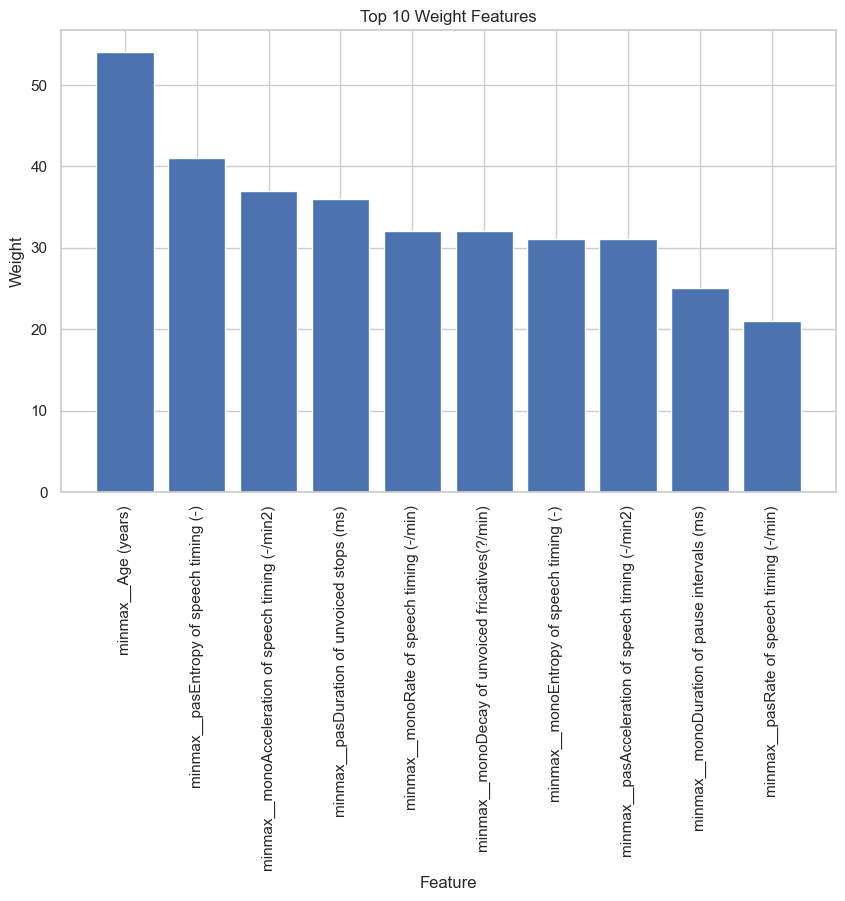

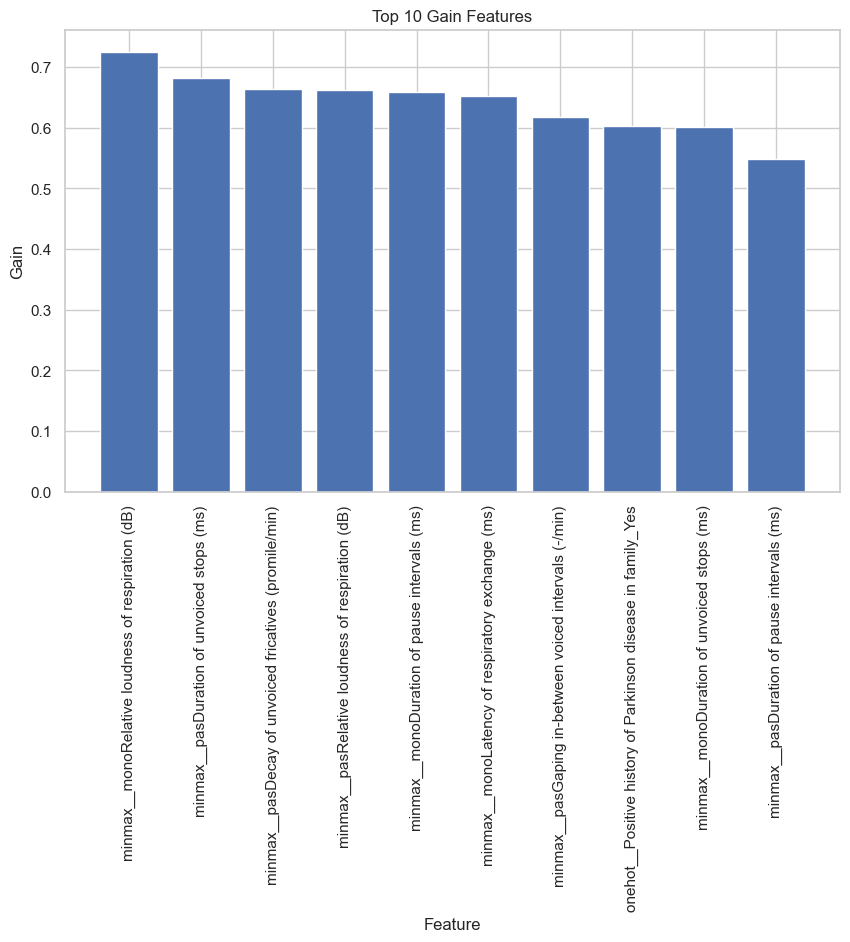

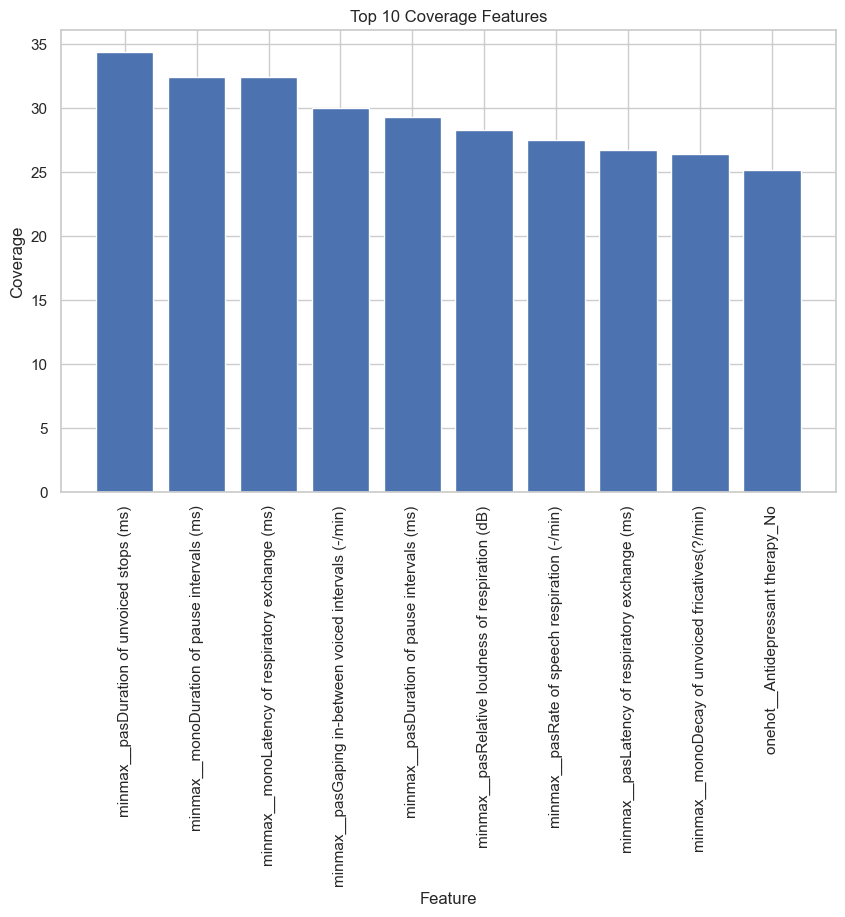

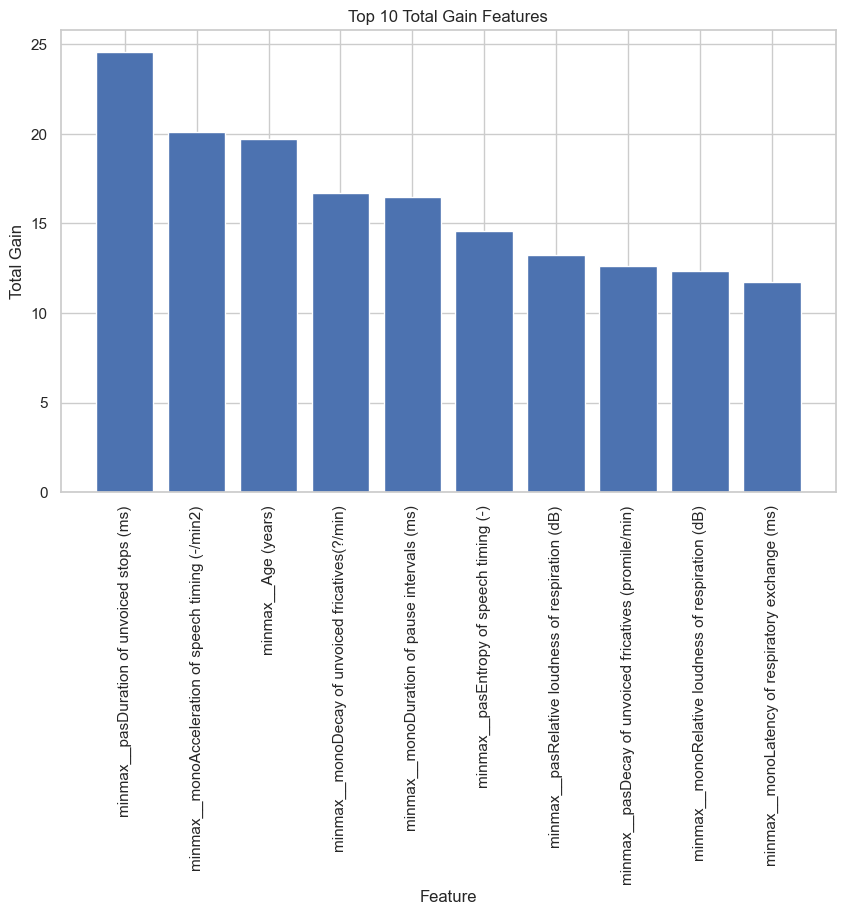

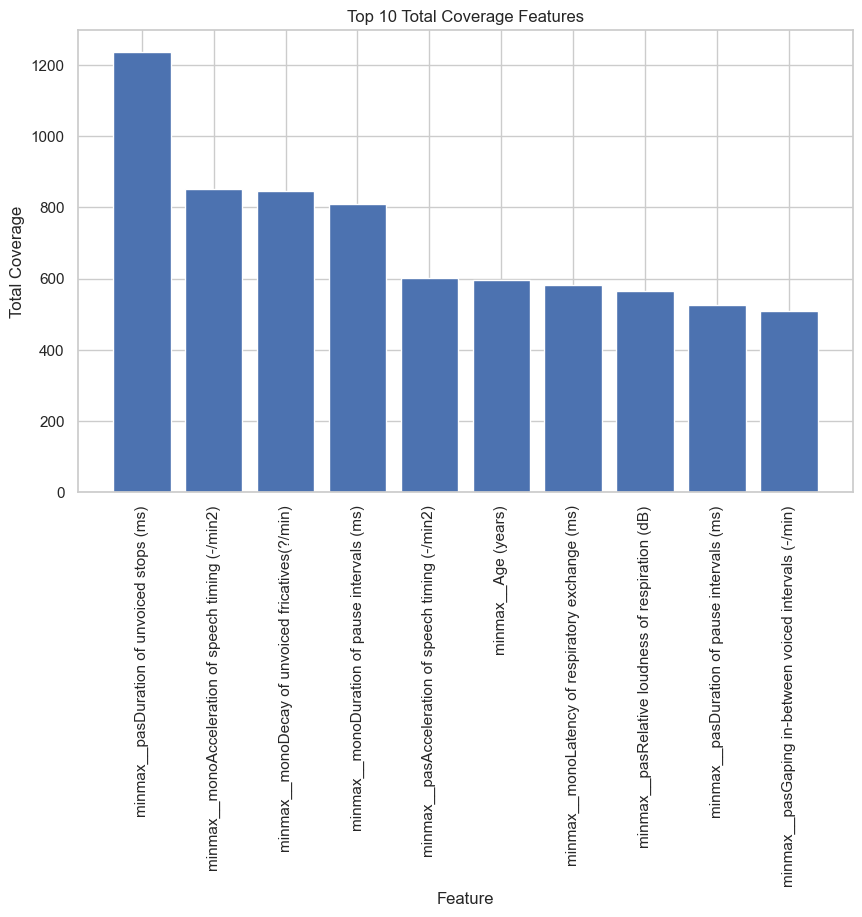

In [227]:
# your code here

import xgboost
import matplotlib.pyplot as plt

# Fit the XGBoost model
XGB.fit(df_train, y_train, eval_set=[(df_CV, y_CV)], verbose=False) #can also set verbose=True to understand how the training is progressing

# Feature importance metrics
weight_importance = XGB.get_booster().get_score(importance_type='weight')
gain_importance = XGB.get_booster().get_score(importance_type='gain')
coverage_importance = XGB.get_booster().get_score(importance_type='cover')
total_gain_importance = XGB.get_booster().get_score(importance_type='total_gain')
total_coverage_importance = XGB.get_booster().get_score(importance_type='total_cover')

# Function to plot feature importance
def plot_feature_importance(importance, title):
    features, values = zip(*importance.items())
    feature_indices = np.argsort(values)[::-1][:10]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(10), np.array(values)[feature_indices], align="center")
    plt.xticks(range(10), np.array(features)[feature_indices], rotation=90)
    plt.xlabel("Feature")
    plt.ylabel(title)
    plt.title(f"Top 10 {title} Features")
    plt.show()

# Plot feature importance for each metric
plot_feature_importance(weight_importance, "Weight")
plot_feature_importance(gain_importance, "Gain")
plot_feature_importance(coverage_importance, "Coverage")
plot_feature_importance(total_gain_importance, "Total Gain")
plot_feature_importance(total_coverage_importance, "Total Coverage")

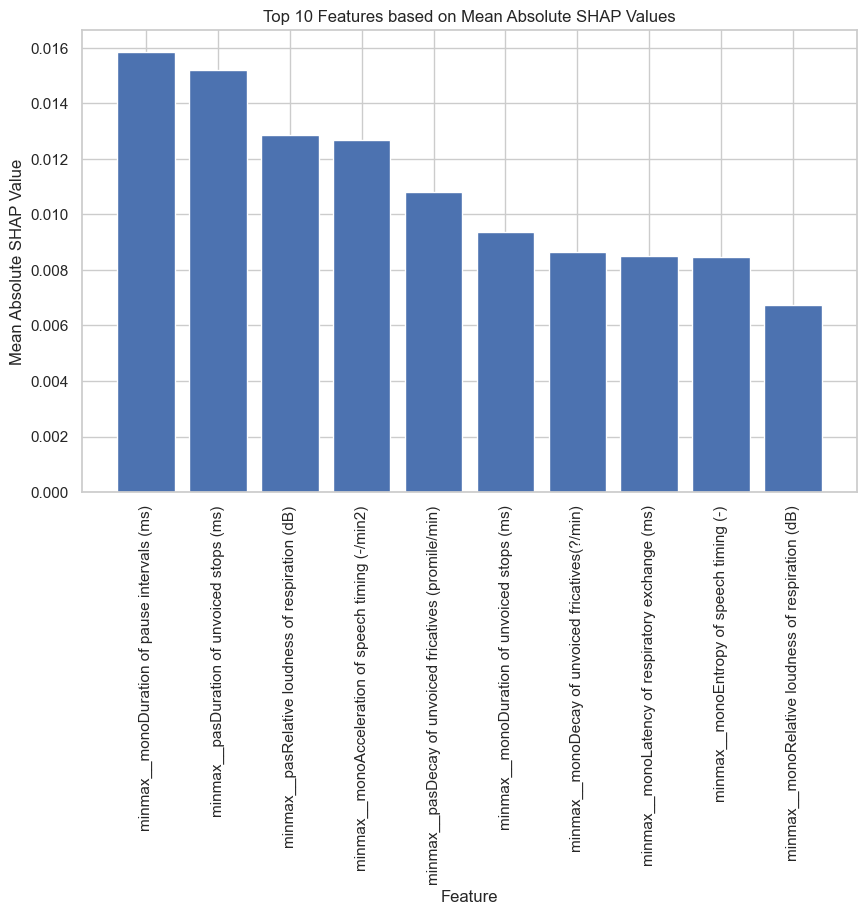

In [228]:
import shap

# Calculate SHAP values for the test set
explainer = shap.Explainer(XGB)
shap_values = explainer.shap_values(df_test)

# Calculate global feature importance values
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
feature_indices_shap = np.argsort(mean_abs_shap)[::-1][:10]

# Plot the top 10 features based on mean absolute SHAP values
plt.figure(figsize=(10, 6))
plt.bar(range(10), mean_abs_shap[feature_indices_shap], align="center")
plt.xticks(range(10), df_test.columns[feature_indices_shap], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Mean Absolute SHAP Value")
plt.title("Top 10 Features based on Mean Absolute SHAP Values")
plt.show()

In [247]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

# Set a seed for reproducibility
random_state = 42

# Read your dataset
df = pd.read_csv('data/dataset.csv')

# Separate the feature matrix X and target variable y
y = df['Pyn']
X = df.loc[:, df.columns != 'Pyn']

# let's split to train, CV, and test
X_other, X_test, y_other, y_test = train_test_split(df, y, test_size=0.2, random_state=0)
X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=0)

print(f'train size: {X_train.shape}')
print(f'validation size: {X_CV.shape}')
print(f'test size: {X_test.shape}')

# Print the shapes of the datasets before and after preprocessing
print("Original Data Shapes:")
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)

print("Preprocessed Data Shapes:")
print("X_train_prep:", X_train_prep.shape)
print("X_val_prep:", X_val_prep.shape)
print("X_test_prep:", X_test_prep.shape)

# Define the columns to be processed by different encoders
onehot_ftrs = ['Gender', 'Positive history of Parkinson disease in family', 'Antidepressant therapy',
               'Antiparkinsonian medication', 'Antipsychotic medication', 'Benzodiazepine medication']
minmax_ftrs = [
    'Age (years)', 'Levodopa equivalent (mg/day)', 'Clonazepam (mg/day)', 'pasEntropy of speech timing (-)',
    'monoEntropy of speech timing (-)',
    'pasRate of speech timing (-/min)', 'monoRate of speech timing (-/min)',
    'pasAcceleration of speech timing (-/min2)', 'monoAcceleration of speech timing (-/min2)',
    'pasDuration of pause intervals (ms)', 'monoDuration of pause intervals (ms)',
    'pasDuration of voiced intervals (ms)', 'monoDuration of voiced intervals (ms)',
    'pasGaping in-between voiced intervals (-/min)', 'monoGaping in-between voiced intervals (-/min)',
    'pasDuration of unvoiced stops (ms)', 'monoDuration of unvoiced stops (ms)',
    'pasDecay of unvoiced fricatives (promile/min)', 'monoDecay of unvoiced fricatives(?/min)',
    'pasRelative loudness of respiration (dB)', 'monoRelative loudness of respiration (dB)',
    'pasPause intervals per respiration (-)', 'monoPause intervals per respiration (-)',
    'pasRate of speech respiration (-/min)', 'monoRate of speech respiration(- /min)',
    'pasLatency of respiratory exchange (ms)', 'monoLatency of respiratory exchange (ms)'
]

# Create a column transformer for encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=True, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)
    ])


train size: (78, 34)
validation size: (26, 34)
test size: (26, 34)
Original Data Shapes:
X_train: (78, 34)
X_val: (26, 33)
X_test: (26, 34)
Preprocessed Data Shapes:
X_train_prep: (78, 40)
X_val_prep: (26, 40)
X_test_prep: (26, 40)


In [175]:
# Read in the data
import pandas as pd
# Scale the data
from sklearn.preprocessing import StandardScaler
# Pipeline, Gridsearch, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data/dataset.csv')
df_encoded = pd.get_dummies(df, columns=['Gender', 'Positive history of Parkinson disease in family', 'Antidepressant therapy',
               'Antiparkinsonian medication', 'Antipsychotic medication', 'Benzodiazepine medication'], drop_first=True)
#print(df_encoded)
# Set variables for the targets and features
y = df_encoded['Pyn']
X = df_encoded.drop('Pyn', axis=1)
random_states = [21, 42, 84, 168, 336]

logistic_regression_pipeline = Pipeline([('scl', StandardScaler()), ('LR', LogisticRegression(random_state=42))])
decision_tree_pipeline = Pipeline([('scl', StandardScaler()), ('DT',DecisionTreeClassifier(random_state=42))])
knn_pipeline = Pipeline([('scl', StandardScaler()), ('KNN', KNeighborsClassifier())])
svm_pipeline = Pipeline([('scl', StandardScaler()), ('SVM', svm.SVC(random_state=42))])
xgb_pipeline = Pipeline([('scl', StandardScaler()), ('XGB', XGBClassifier(random_state=42, use_label_encoder=False))])

param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]
logistic_regression_grid_params = [{'LR__penalty': ['l1', 'l2'], 'LR__C': param_range_fl, 'LR__solver': ['liblinear']}]
decision_tree_grid_params = [{'DT__criterion': ['gini', 'entropy'], 'DT__min_samples_leaf': param_range, 'DT__max_depth': param_range, 'DT__min_samples_split': param_range[1:]}]
knn_grid_params = [{'KNN__n_neighbors': param_range, 'KNN__weights': ['uniform', 'distance'], 'KNN__metric': ['euclidean', 'manhattan']}]
svm_grid_params = [{'SVM__kernel': ['linear', 'rbf'], 'SVM__C': param_range}]
xgb_grid_params = [{'XGB__learning_rate': learning_rates, 'XGB__max_depth': param_range, 'XGB__min_child_weight': param_range[:2], 'XGB__subsample': param_range_fl, 'XGB__n_estimators': n_estimators}]
# Apply 10-fold cross-validation to all models
kf = KFold(n_splits=10, shuffle=True)

logistic_regression_grid_search = GridSearchCV(estimator=logistic_regression_pipeline, param_grid=logistic_regression_grid_params, scoring='accuracy', cv=kf)
dtecision_tree_grid_search = GridSearchCV(estimator=decision_tree_pipeline, param_grid=decision_tree_grid_params, scoring='accuracy', cv=kf)
knn_grid_search = GridSearchCV(estimator=knn_pipeline, param_grid=knn_grid_params, scoring='accuracy', cv=kf)
svm_grid_search = GridSearchCV(estimator=svm_pipeline, param_grid=svm_grid_params, scoring='accuracy', cv=kf)
xgb_grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=xgb_grid_params,scoring='accuracy', cv=kf)

grid_searches = [logistic_regression_grid_search, dtecision_tree_grid_search, knn_grid_search, svm_grid_search, xgb_grid_search]

grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 2: 'K-Nearest Neighbors', 3: 'Support Vector Machines', 4: 'XGBoost'}


for i, model in enumerate(grid_searches):
    for random_state in random_states:
        # Split the data into training test sets
        X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)
        model.fit(X_train,y_train)            
        
        # Print the best parameters and corresponding validation score
        print(f"\nRandom State: {random_state}")
        print(f"Best {grid_dict[i]} parameters: {model.best_params_}")
        print(f"Validation score: {model.best_score_:.4f}")
        print(f"Test score: {model.score(X_test, y_test):.4f}")


Random State: 21
Best Logistic Regression parameters: {'LR__C': 0.1, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Validation score: 0.7345
Test score: 0.6923

Random State: 42
Best Logistic Regression parameters: {'LR__C': 0.1, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Validation score: 0.7291
Test score: 0.6923

Random State: 84
Best Logistic Regression parameters: {'LR__C': 0.1, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Validation score: 0.7291
Test score: 0.6923

Random State: 168
Best Logistic Regression parameters: {'LR__C': 0.1, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Validation score: 0.6927
Test score: 0.6923

Random State: 336
Best Logistic Regression parameters: {'LR__C': 0.5, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Validation score: 0.7082
Test score: 0.6538


KeyboardInterrupt: 


Random State: 21
Best Logistic Regression parameters: {'LR__C': 0.1, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Validation score: 0.6554
Test score: 0.7308
Baseline score: 0.4231

Random State: 42
Best Logistic Regression parameters: {'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Validation score: 0.8179
Test score: 0.6538
Baseline score: 0.4615

Random State: 84
Best Logistic Regression parameters: {'LR__C': 0.5, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Validation score: 0.7286
Test score: 0.6154
Baseline score: 0.5000

Random State: 168
Best Logistic Regression parameters: {'LR__C': 0.1, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Validation score: 0.7071
Test score: 0.7308
Baseline score: 0.4615

Random State: 336
Best Logistic Regression parameters: {'LR__C': 0.1, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Validation score: 0.6036
Test score: 0.6538
Baseline score: 0.5385

Random State: 21
Best Decision Trees parameters: {'DT__criterion': 'gini

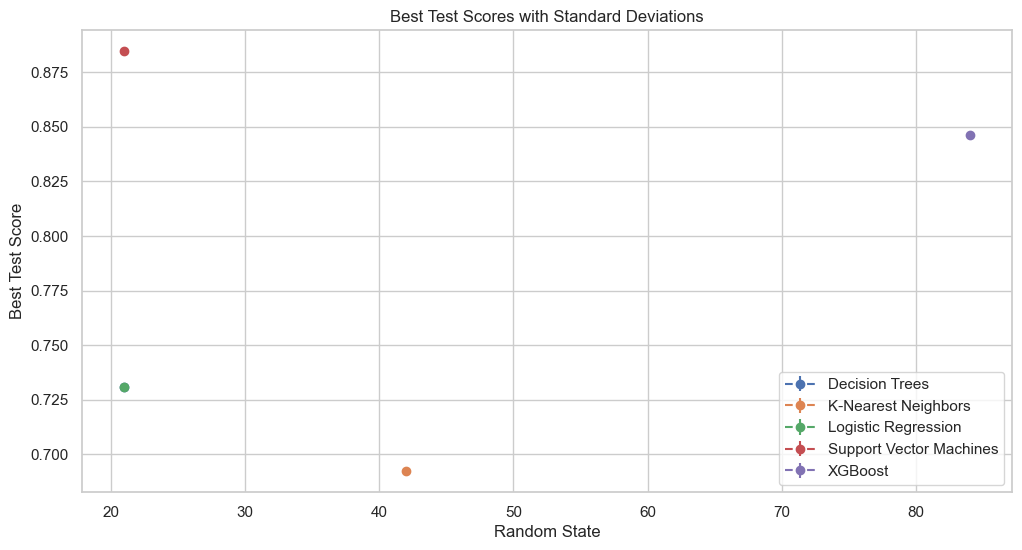

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Read in the data
df = pd.read_csv('data/dataset.csv')
df_encoded = pd.get_dummies(df, columns=['Gender', 'Positive history of Parkinson disease in family', 'Antidepressant therapy',
                                          'Antiparkinsonian medication', 'Antipsychotic medication', 'Benzodiazepine medication'],
                            drop_first=True)

# Set variables for the targets and features
y = df_encoded['Pyn']
X = df_encoded.drop('Pyn', axis=1)
random_states = [21, 42, 84, 168, 336]

# Dictionary to store results
results = {'Model': [], 'Random State': [], 'Best Params': [], 'Validation Score': [], 'Test Score': []}

# Model parameters
logistic_regression_grid_params = [{'LR__penalty': ['l1', 'l2'], 'LR__C': [100, 10, 1.0, 0.1, 0.01, 0.001], 'LR__solver': ['liblinear']}]
decision_tree_grid_params = [{'DT__criterion': ['gini', 'entropy'], 'DT__min_samples_leaf': [1, 2, 3, 4, 5, 6],
                              'DT__max_depth': [3, 5, 7, 10, 13], 'DT__min_samples_split': [2, 3, 4, 5]}]
knn_grid_params = [{'KNN__n_neighbors': [1, 3, 5, 7, 10, 20, 50], 'KNN__weights': ['uniform', 'distance'],
                    'KNN__metric': ['euclidean', 'manhattan']}]
svm_grid_params = [{'SVM__kernel': ['linear', 'rbf'], 'SVM__C': [1e-1, 1e0, 1e1, 1e2], 'SVM__gamma': [1e-3, 1e-1, 1e3]}]
xgb_grid_params = [{'XGB__learning_rate': [0.1, 0.2, 0.3], 'XGB__max_depth': [1, 3, 5, 10, 50],
                    'XGB__min_child_weight': [1, 2, 3], 'XGB__subsample': [1.0, 0.8, 0.6],
                    'XGB__n_estimators': [50, 100, 150], 'XGB__reg_alpha': [1e-2, 1e-1, 1e0, 1e1, 1e2]}]

# Apply 10-fold cross-validation to all models
kf = KFold(n_splits=10, shuffle=True)

for i, model in enumerate(grid_searches):
    for random_state in random_states:
        # Split the data into training, validation, and test sets (6:2:2)
        X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.6, random_state=random_state)
        X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=random_state)
        
        # Calculate baseline score
        baseline_preds = np.random.choice([0, 1], size=len(y_test))
        baseline_score = accuracy_score(y_test, baseline_preds)

        # Fit the model
        model.fit(X_train, y_train)

        # Save results
        results['Model'].append(grid_dict[i])
        results['Random State'].append(random_state)
        results['Best Params'].append(model.best_params_)
        results['Validation Score'].append(model.best_score_)
        results['Test Score'].append(model.score(X_test, y_test))

        # Print the results
        print(f"\nRandom State: {random_state}")
        print(f"Best {grid_dict[i]} parameters: {model.best_params_}")
        print(f"Validation score: {model.best_score_:.4f}")
        print(f"Test score: {model.score(X_test, y_test):.4f}")
        print(f"Baseline score: {baseline_score:.4f}")

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Extract the rows with the best test scores for each model
best_scores_df = results_df.loc[results_df.groupby('Model')['Test Score'].idxmax()]

# Print means and standard deviations of the best test scores
print("\nBest Test Scores - Means:")
print(best_scores_df.groupby('Model')['Test Score'].mean())
print("\nBest Test Scores - Standard Deviations:")
print(best_scores_df.groupby('Model')['Test Score'].std())

# Plot means and standard deviations of the best test scores
plt.figure(figsize=(12, 6))
for model, group in best_scores_df.groupby('Model'):
    plt.errorbar(group['Random State'], group['Test Score'], yerr=group['Test Score'].std(), label=model, linestyle='--', marker='o')

plt.title('Best Test Scores with Standard Deviations')
plt.xlabel('Random State')
plt.ylabel('Best Test Score')
plt.legend()
plt.show()


In [211]:

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Extract the rows with the best test scores for each model
best_scores_df = results_df.loc[results_df.groupby('Model')['Test Score'].idxmax()]

# Print means of the best test scores
print("\nBest Test Scores - Means:")
print(best_scores_df.groupby('Model')['Test Score'].mean())

# Plot confusion matrix for each of the best test scores
for index, row in best_scores_df.iterrows():
    model_name = row['Model']
    model_index = results_df[results_df['Model'] == model_name]['Test Score'].idxmax()
    best_model = grid_searches[model_index]

    # Fit the best model on the entire dataset
    best_model.fit(X, y)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    disp = plot_confusion_matrix(best_model, X_test, y_test, cmap=plt.cm.Blues, values_format='d')
    plt.title(f'Confusion Matrix - {model_name}')

    plt.show()

# Combine all the test scores from random states and calculate mean test score for each ML algorithm
all_test_scores = results_df.groupby('Model')['Test Score'].apply(list)
mean_test_scores = all_test_scores.apply(np.mean)
std_test_scores = all_test_scores.apply(np.std)

# Print mean test scores and standard deviations for each ML algorithm
print("\nAll Test Scores - Means:")
print(mean_test_scores)
print("\nAll Test Scores - Standard Deviations:")
print(std_test_scores)

# Compare ML algorithms in a plot showing mean test scores and standard deviations
plt.figure(figsize=(10, 6))
plt.bar(mean_test_scores.index, mean_test_scores, yerr=std_test_scores, capsize=5, color='skyblue')
plt.title('Mean Test Scores of Machine Learning Algorithms')
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Mean Test Score')
plt.show()

# Plot confusion matrix for the best test score machine learning algorithm
best_algorithm = best_scores_df.iloc[0]['Model']
best_model_index = results_df[results_df['Model'] == best_algorithm]['Test Score'].idxmax()
best_model = grid_searches[best_model_index]

# Fit the best model on the entire dataset
best_model.fit(X, y)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = plot_confusion_matrix(best_model, X_test, y_test, cmap=plt.cm.Blues, values_format='d')
plt.title(f'Confusion Matrix - {best_algorithm}')



Best Test Scores - Means:
Model
Decision Trees             0.730769
K-Nearest Neighbors        0.692308
Logistic Regression        0.730769
Support Vector Machines    0.884615
XGBoost                    0.846154
Name: Test Score, dtype: float64


IndexError: list index out of range


Best Test Scores - Means:
Model
Decision Trees             0.730769
K-Nearest Neighbors        0.692308
Logistic Regression        0.730769
Support Vector Machines    0.884615
XGBoost                    0.846154
Name: Test Score, dtype: float64
Model index 5 is out of range.
Model index 11 is out of range.


<Figure size 800x600 with 0 Axes>

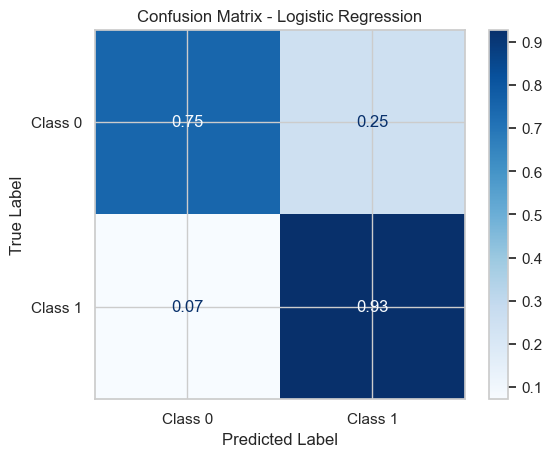

Model index 15 is out of range.
Model index 22 is out of range.

All Test Scores - Means:
Model
Decision Trees             0.646154
K-Nearest Neighbors        0.607692
Logistic Regression        0.676923
Support Vector Machines    0.738462
XGBoost                    0.700000
Name: Test Score, dtype: float64

All Test Scores - Standard Deviations:
Model
Decision Trees             0.074580
K-Nearest Neighbors        0.078446
Logistic Regression        0.046154
Support Vector Machines    0.109868
XGBoost                    0.107141
Name: Test Score, dtype: float64


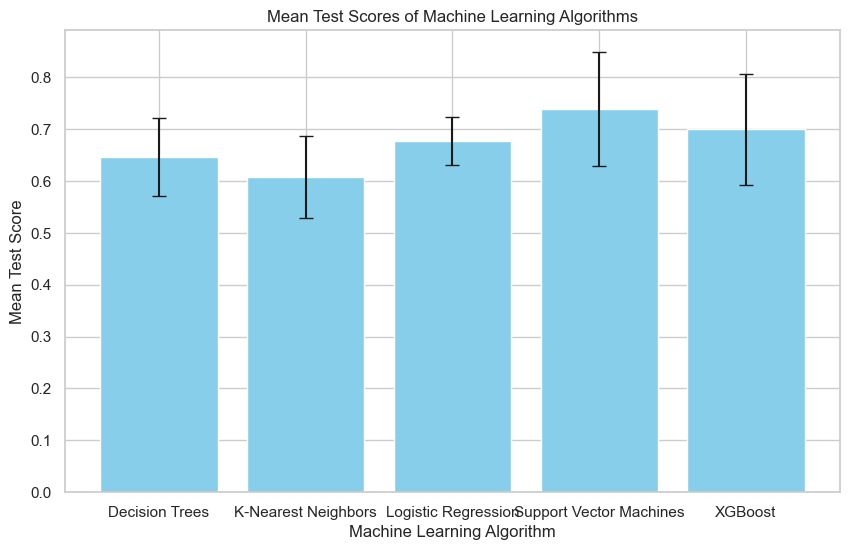

IndexError: list index out of range

In [220]:
# Continue from the previous code

# Print means of the best test scores
print("\nBest Test Scores - Means:")
print(best_scores_df.groupby('Model')['Test Score'].mean())

# Plot confusion matrix for each of the best test scores
for index, row in best_scores_df.iterrows():
    model_name = row['Model']
    
    # Check if the model exists in grid_searches
    if model_name not in grid_dict.values():
        print(f"Model {model_name} not found in grid_searches.")
        continue
    
    model_index = results_df[results_df['Model'] == model_name]['Test Score'].idxmax()
    
    # Check if the model index is out of range
    if model_index >= len(grid_searches):
        print(f"Model index {model_index} is out of range.")
        continue
    
    best_model = grid_searches[model_index]

    # Fit the best model on the entire dataset
    best_model.fit(X, y)

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap='Blues', values_format='.2f')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Combine all the test scores from random states and calculate mean test score for each ML algorithm
all_test_scores = results_df.groupby('Model')['Test Score'].apply(list)
mean_test_scores = all_test_scores.apply(np.mean)
std_test_scores = all_test_scores.apply(np.std)

# Print mean test scores and standard deviations for each ML algorithm
print("\nAll Test Scores - Means:")
print(mean_test_scores)
print("\nAll Test Scores - Standard Deviations:")
print(std_test_scores)

# Compare ML algorithms in a plot showing mean test scores and standard deviations
plt.figure(figsize=(10, 6))
plt.bar(mean_test_scores.index, mean_test_scores, yerr=std_test_scores, capsize=5, color='skyblue')
plt.title('Mean Test Scores of Machine Learning Algorithms')
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Mean Test Score')
plt.show()

# Plot confusion matrix for the best test score machine learning algorithm
best_algorithm = best_scores_df.iloc[0]['Model']
best_model_index = results_df[results_df['Model'] == best_algorithm]['Test Score'].idxmax()
best_model = grid_searches[best_model_index]

# Fit the best model on the entire dataset
best_model.fit(X, y)

# Make predictions
best_test_preds = best_model.predict(X_test)

# Calculate confusion matrix
best_conf_matrix = confusion_matrix(y_test, best_test_preds, normalize='true')

# Plot confusion matrix for the best test score machine learning algorithm
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=best_conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='.2f')
plt.title(f'Confusion Matrix - {best_algorithm}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



Best Test Scores - Means:
Model
Decision Trees             0.730769
K-Nearest Neighbors        0.692308
Logistic Regression        0.730769
Support Vector Machines    0.884615
XGBoost                    0.846154
Name: Test Score, dtype: float64
Model index 5 is out of range.
Model index 11 is out of range.


<Figure size 800x600 with 0 Axes>

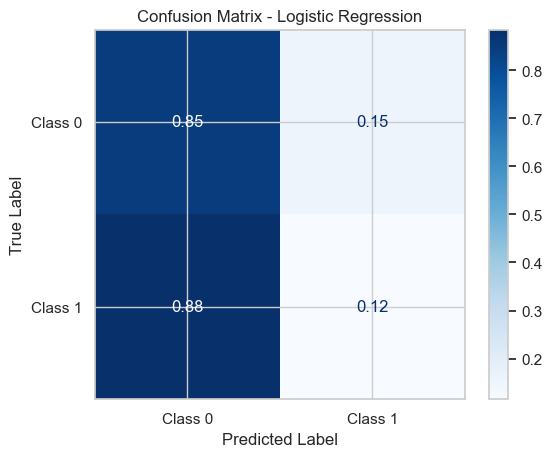

Model index 15 is out of range.
Model index 22 is out of range.

All Test Scores - Means:
Model
Decision Trees             0.646154
K-Nearest Neighbors        0.607692
Logistic Regression        0.676923
Support Vector Machines    0.738462
XGBoost                    0.700000
Name: Test Score, dtype: float64

All Test Scores - Standard Deviations:
Model
Decision Trees             0.074580
K-Nearest Neighbors        0.078446
Logistic Regression        0.046154
Support Vector Machines    0.109868
XGBoost                    0.107141
Name: Test Score, dtype: float64


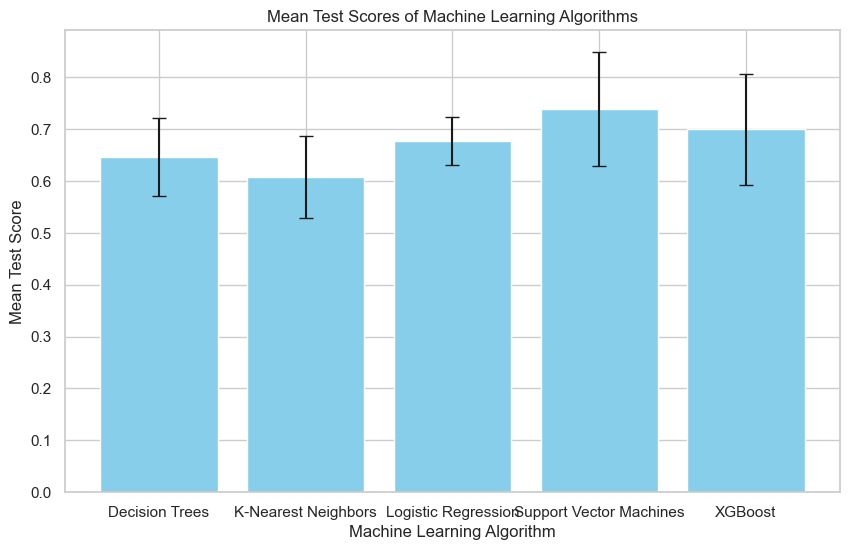

IndexError: list index out of range

In [234]:
# Continue from the previous code

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Print means of the best test scores
print("\nBest Test Scores - Means:")
print(best_scores_df.groupby('Model')['Test Score'].mean())

# Plot confusion matrix for each of the best test scores
for index, row in best_scores_df.iterrows():
    model_name = row['Model']
    
    # Check if the model exists in grid_searches
    if model_name not in grid_dict.values():
        print(f"Model {model_name} not found in grid_searches.")
        continue
    
    model_index = results_df[results_df['Model'] == model_name]['Test Score'].idxmax()
    
    # Check if the model index is out of range
    if model_index >= len(grid_searches):
        print(f"Model index {model_index} is out of range.")
        continue
    
    best_model = grid_searches[model_index]

    # Fit the best model on the entire dataset
    best_model.fit(X, y)

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 1'])
    disp.plot(cmap='Blues', values_format='.2f')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Combine all the test scores from random states and calculate mean test score for each ML algorithm
all_test_scores = results_df.groupby('Model')['Test Score'].apply(list)
mean_test_scores = all_test_scores.apply(np.mean)
std_test_scores = all_test_scores.apply(np.std)

# Print mean test scores and standard deviations for each ML algorithm
print("\nAll Test Scores - Means:")
print(mean_test_scores)
print("\nAll Test Scores - Standard Deviations:")
print(std_test_scores)

# Compare ML algorithms in a plot showing mean test scores and standard deviations
plt.figure(figsize=(10, 6))
plt.bar(mean_test_scores.index, mean_test_scores, yerr=std_test_scores, capsize=5, color='skyblue')
plt.title('Mean Test Scores of Machine Learning Algorithms')
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Mean Test Score')
plt.show()

# Plot confusion matrix for the best test score machine learning algorithm
best_algorithm = best_scores_df.iloc[0]['Model']
best_model_index = results_df[results_df['Model'] == best_algorithm]['Test Score'].idxmax()
best_model = grid_searches[best_model_index]

# Fit the best model on the entire dataset
best_model.fit(X, y)

# Make predictions
best_test_preds = best_model.predict(X_test)

# Calculate confusion matrix
best_conf_matrix = confusion_matrix(y_test, best_test_preds, normalize='true')

# Plot confusion matrix for the best test score machine learning algorithm
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=best_conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='.2f')
plt.title(f'Confusion Matrix - {best_algorithm}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.38461538461538464
Precision: 1.0
Recall: 0.07692307692307693
F1 Score: 0.14285714285714288


<Figure size 800x600 with 0 Axes>

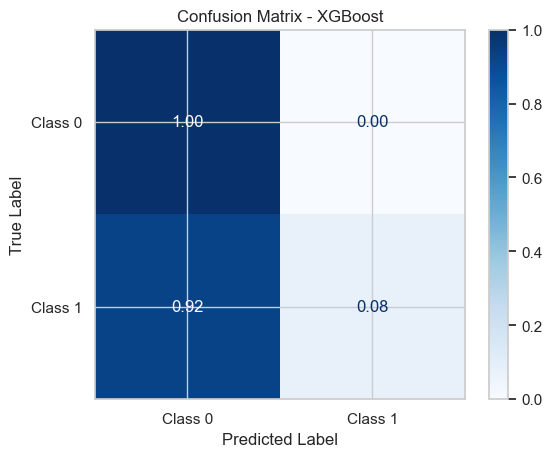

In [233]:
# ... (previous code)

# Make predictions
y_pred = best_model.predict(X_test)

# Print some metrics to evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='.2f')
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ... (remaining code)


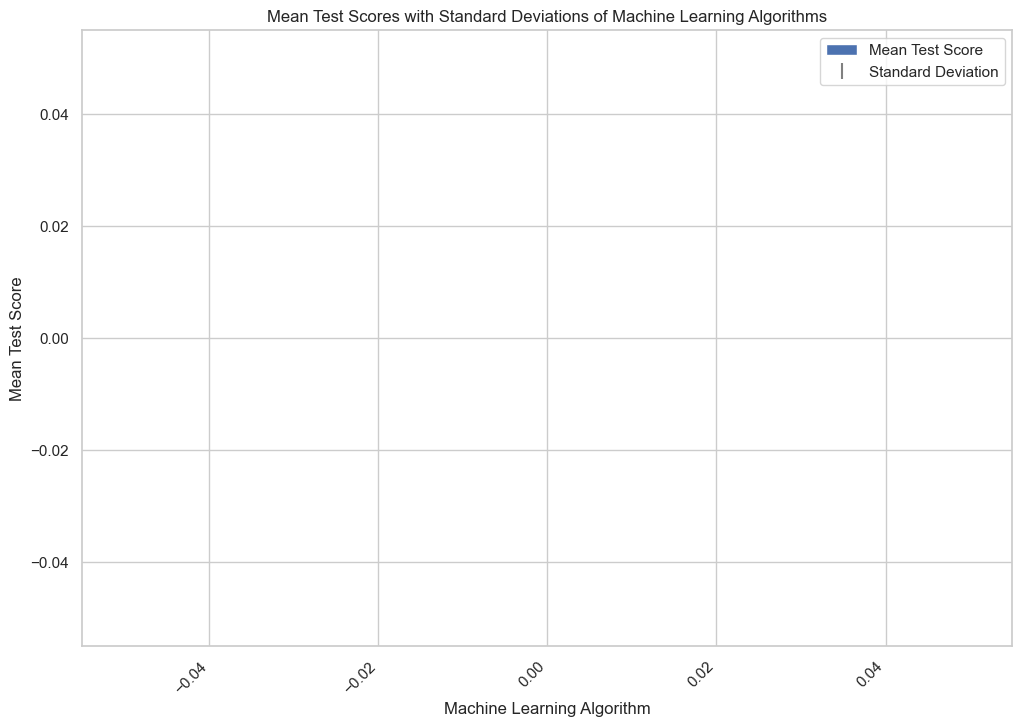

<Figure size 640x480 with 0 Axes>

In [183]:
import seaborn as sns

# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Compare ML algorithms in a bar plot showing mean test scores and standard deviations
plt.figure(figsize=(12, 8))
bar_width = 0.4

# Plot bars for mean test scores
plt.bar(mean_test_scores.index, mean_test_scores, width=bar_width, color='tan', label='Mean Test Score')

# Plot error bars for standard deviations
plt.errorbar(mean_test_scores.index, mean_test_scores, yerr=std_test_scores, fmt='none', ecolor='gray', capsize=5, label='Standard Deviation')

# Add labels and title
plt.title('Mean Test Scores with Standard Deviations of Machine Learning Algorithms')
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Mean Test Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add legend
plt.legend()

# Show the plot
plt.show()

# Save the heatmap as a PDF with 300 DPI
plt.savefig('Mean Test Scores with Standard Deviations of Machine Learning Algorithms.pdf', dpi=300)


TypeError: Parameter grid for parameter 'model' needs to be a list or a numpy array, but got 'LR' (of type str) instead. Single values need to be wrapped in a list with one element.

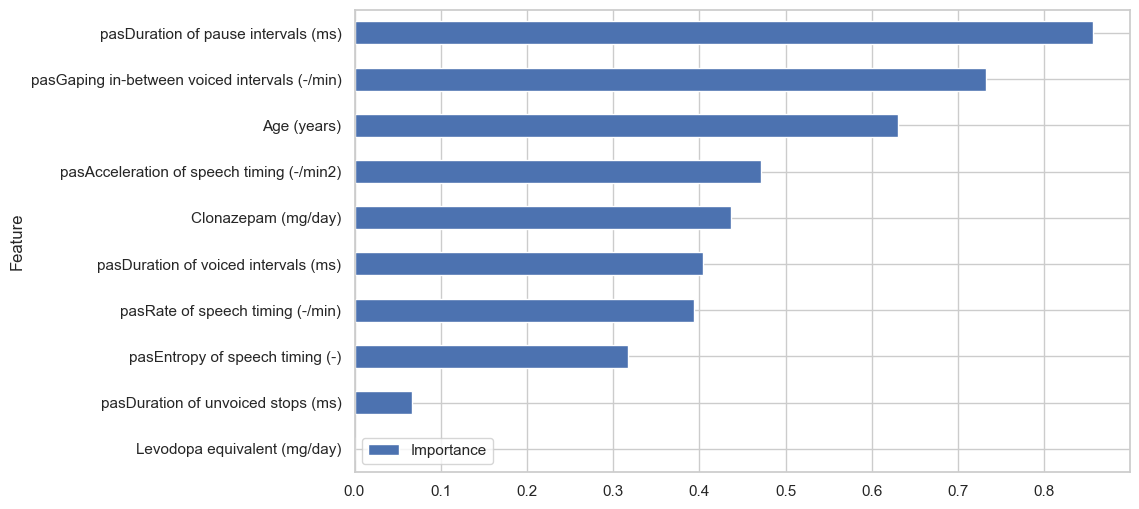

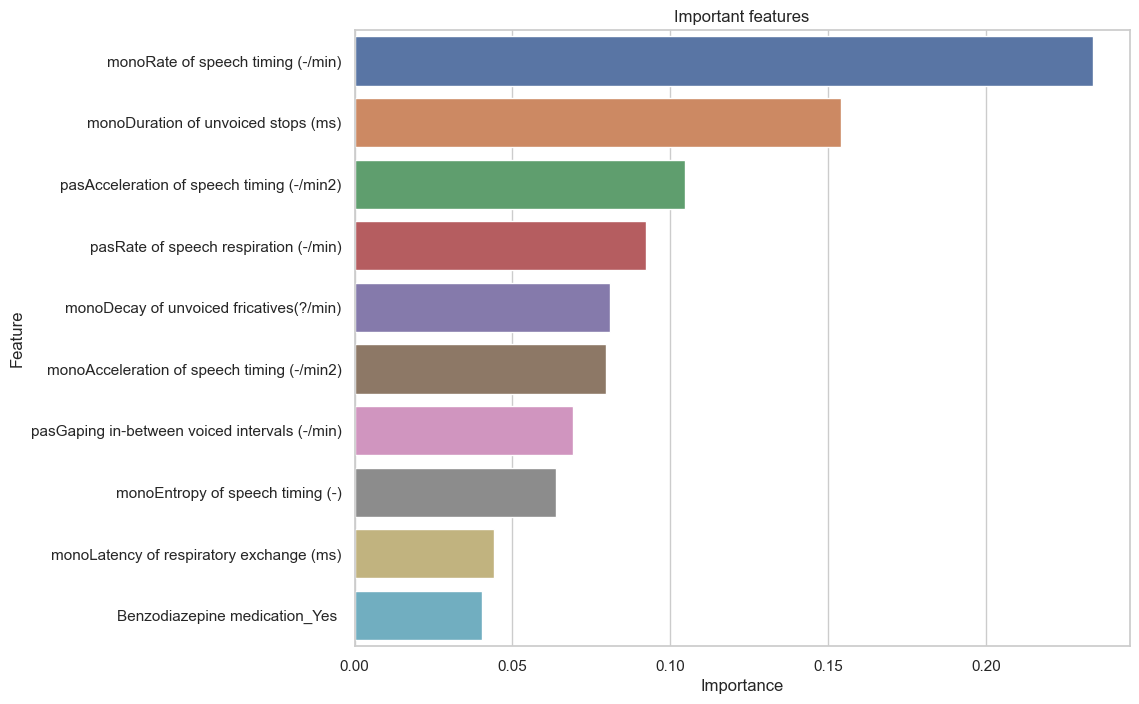

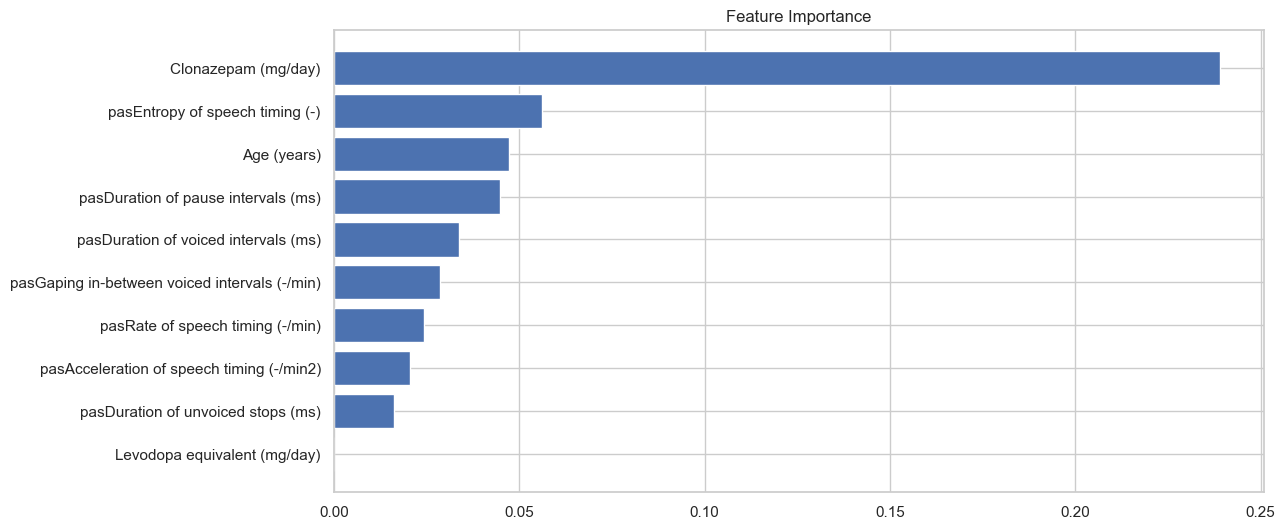

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import MultiIndex
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, pair_confusion_matrix
import seaborn as sns
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

# Read in the data
df = pd.read_csv('data/dataset.csv')
df_encoded = pd.get_dummies(df, columns=['Gender', 'Positive history of Parkinson disease in family', 'Antidepressant therapy',
                                          'Antiparkinsonian medication', 'Antipsychotic medication', 'Benzodiazepine medication'],
                            drop_first=True)

y = df_encoded['Pyn']
X = df_encoded.drop('Pyn', axis=1)
#logistic regression feature importance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)}).head(10)
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.show()


#decision tree
hps = {
    'max_depth': 3,
    'min_samples_split': 4
}
# Loading the tree object 
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
# Predicting the test set
y_pred = tree.predict(X_test)
feat_dict= {}
for col, val in sorted(zip(X.columns, tree.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val
  
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()}).head(10)
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
sns.barplot(y=idx,x=values).set(title='Important features')
plt.show()

#XGB 
model = XGBClassifier()
model.fit(X, y)
feature_importance = model.feature_importances_[:10]
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()



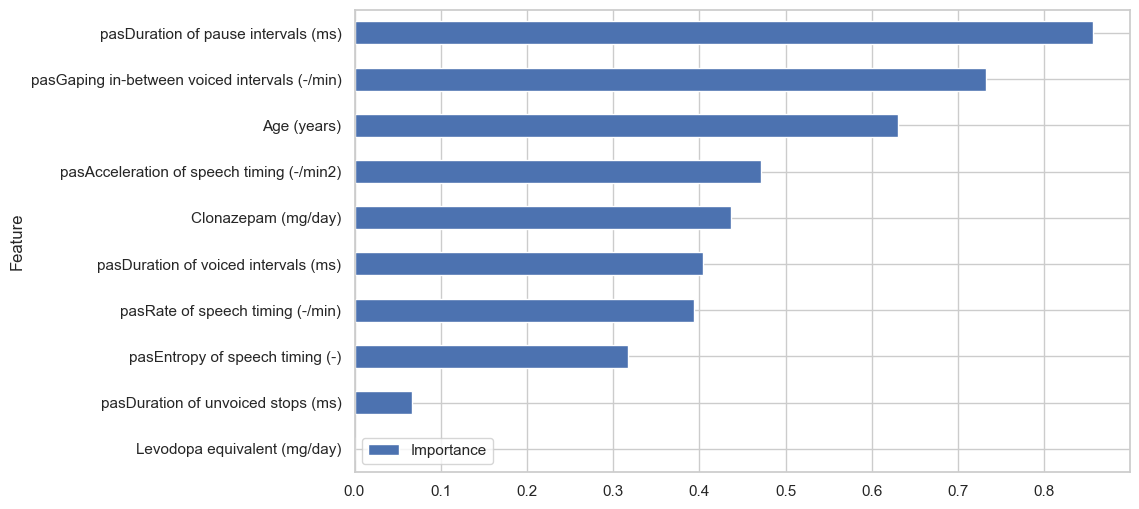

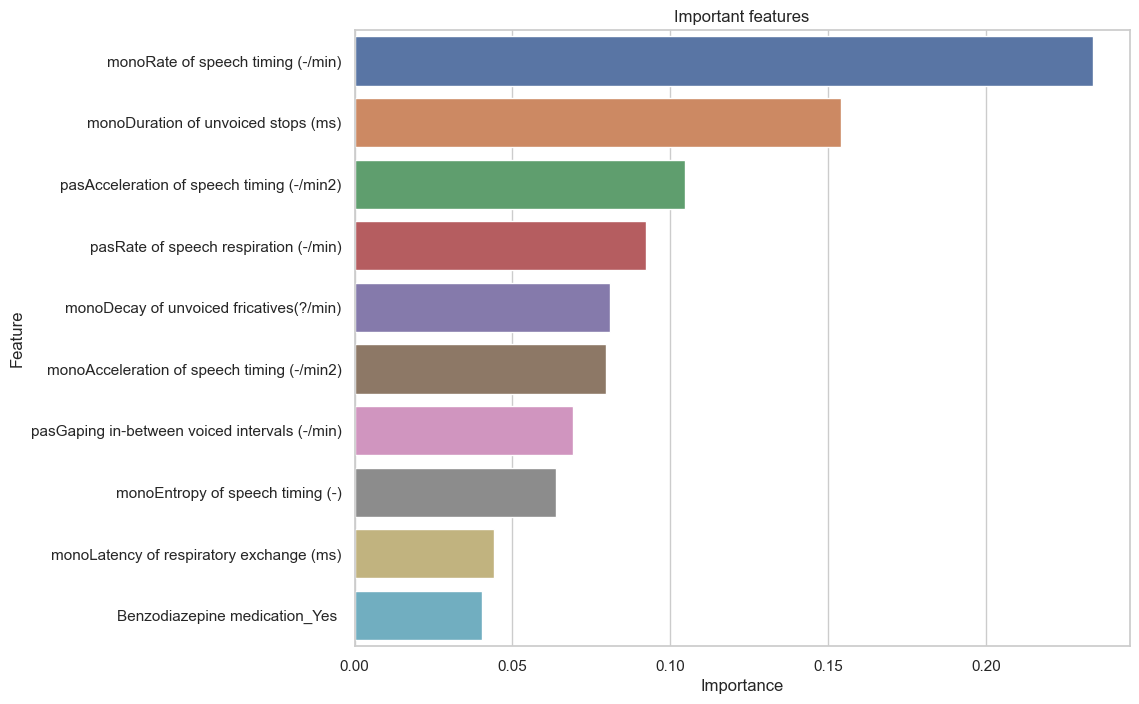

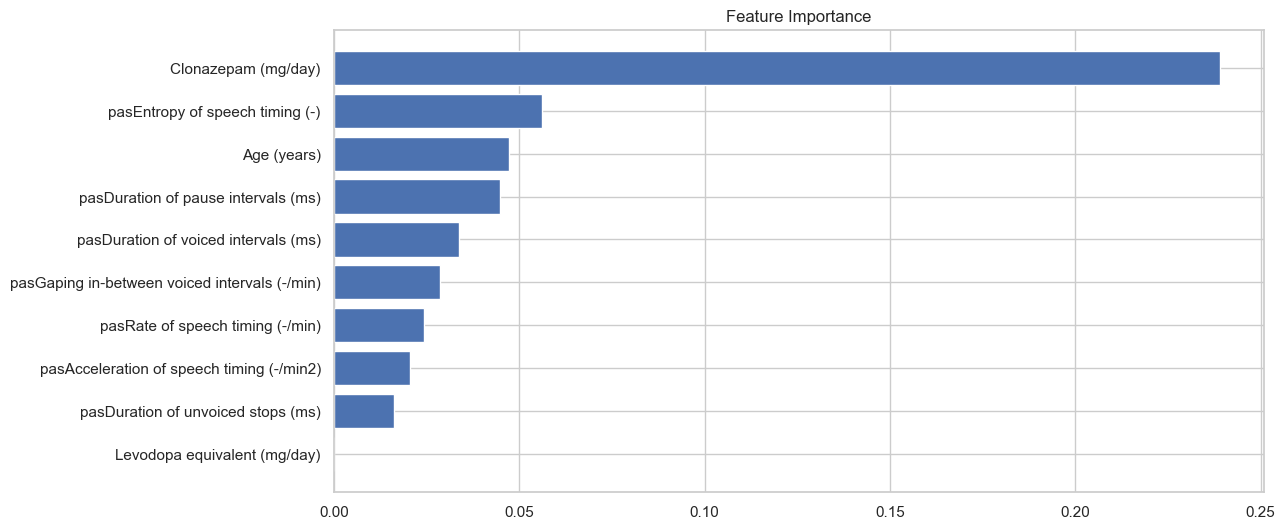

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import MultiIndex
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Read in the data
df = pd.read_csv('data/dataset.csv')
df_encoded = pd.get_dummies(df, columns=['Gender', 'Positive history of Parkinson disease in family', 'Antidepressant therapy',
                                          'Antiparkinsonian medication', 'Antipsychotic medication', 'Benzodiazepine medication'],
                            drop_first=True)

y = df_encoded['Pyn']
X = df_encoded.drop('Pyn', axis=1)

# Logistic regression feature importance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)}).head(10)
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.savefig('logistic_regression_feature_importance.png', dpi=300)  # Save the figure

# Decision tree
hps = {
    'max_depth': 3,
    'min_samples_split': 4
}
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
feat_dict = {}
for col, val in sorted(zip(X.columns, tree.feature_importances_), key=lambda x: x[1], reverse=True):
    feat_dict[col] = val

feat_df = pd.DataFrame({'Feature': feat_dict.keys(), 'Importance': feat_dict.values()}).head(10)
values = feat_df.Importance
idx = feat_df.Feature
plt.figure(figsize=(10, 8))
sns.barplot(y=idx, x=values).set(title='Important features')
plt.savefig('decision_tree_feature_importance.png', dpi=300)  # Save the figure

# XGB
model = XGBClassifier()
model.fit(X, y)
feature_importance = model.feature_importances_[:10]
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')
plt.savefig('xgb_feature_importance.png', dpi=300)  # Save the figure

plt.show()


<Figure size 1000x600 with 0 Axes>

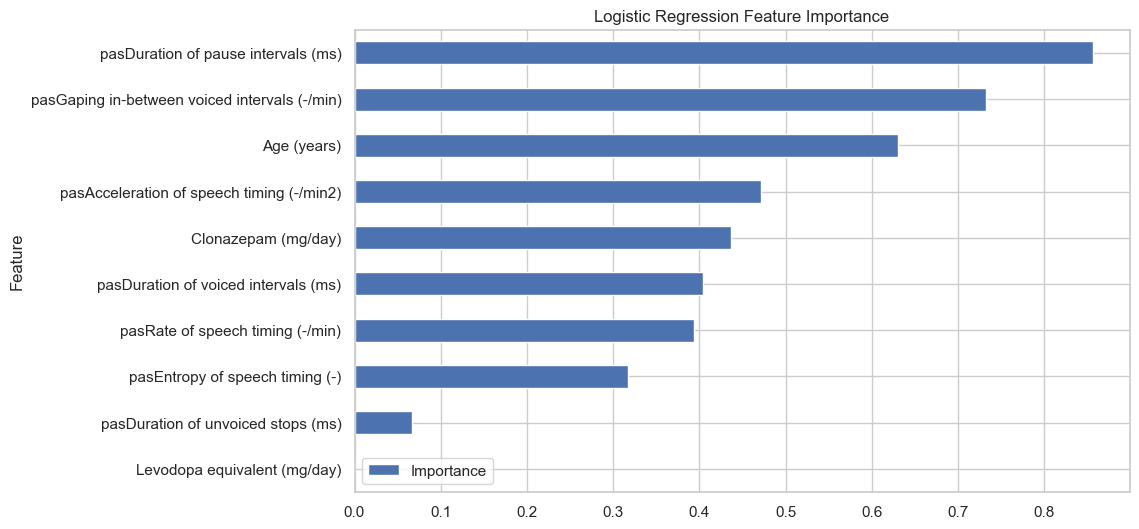

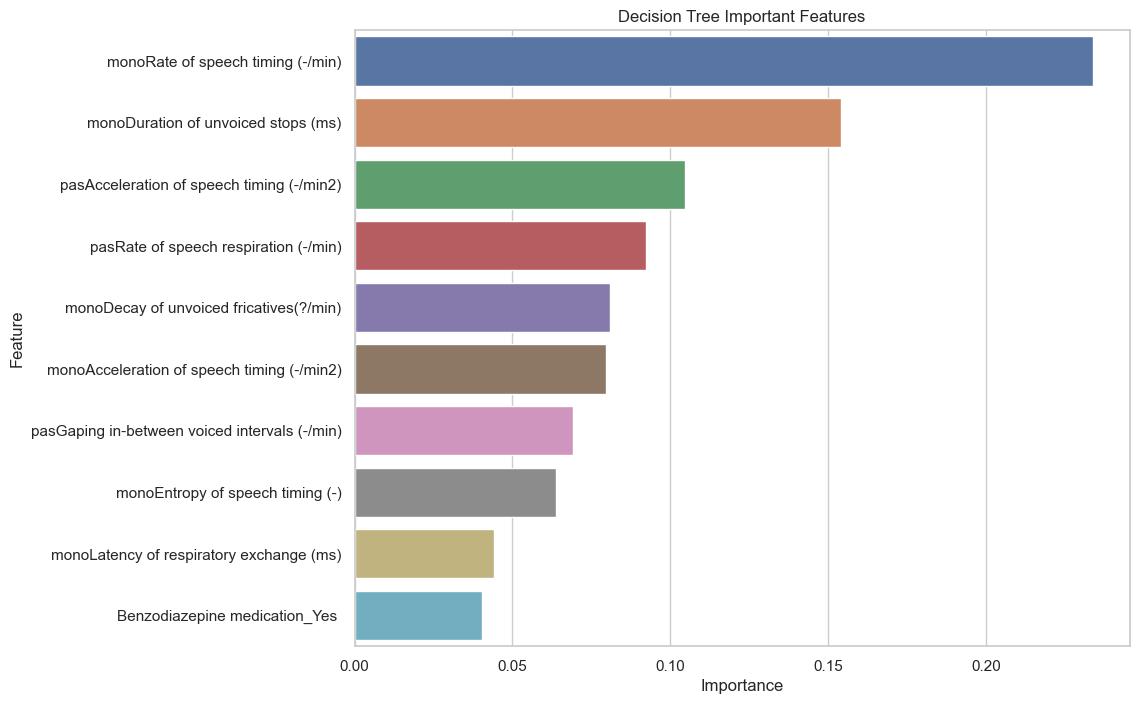

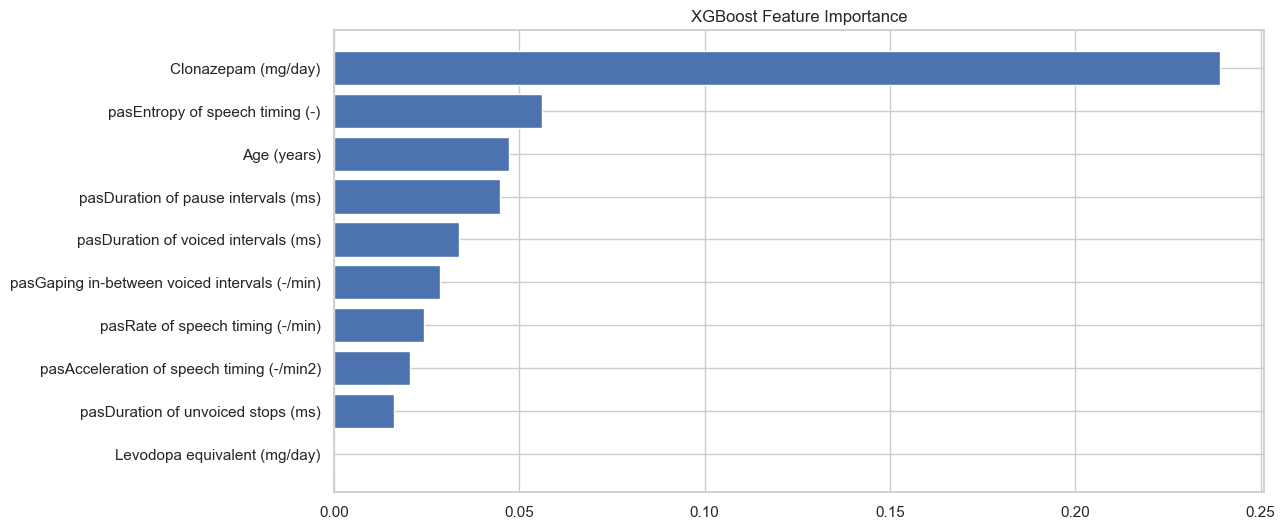

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import MultiIndex
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, pair_confusion_matrix
import seaborn as sns
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

# Read in the data
df = pd.read_csv('data/dataset.csv')
df_encoded = pd.get_dummies(df, columns=['Gender', 'Positive history of Parkinson disease in family', 'Antidepressant therapy',
                                          'Antiparkinsonian medication', 'Antipsychotic medication', 'Benzodiazepine medication'],
                            drop_first=True)

y = df_encoded['Pyn']
X = df_encoded.drop('Pyn', axis=1)

# Logistic regression feature importance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)}).head(10)
feature_importance = feature_importance.sort_values('Importance', ascending=True)
plt.figure(figsize=(10, 6))
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Logistic Regression Feature Importance')
plt.savefig('logistic_regression_feature_importance.png', bbox_inches="tight", dpi=300)
plt.show()

# Decision tree
hps = {
    'max_depth': 3,
    'min_samples_split': 4
}
# Loading the tree object
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
# Predicting the test set
y_pred = tree.predict(X_test)
feat_dict = {}
for col, val in sorted(zip(X.columns, tree.feature_importances_), key=lambda x: x[1], reverse=True):
    feat_dict[col] = val

feat_df = pd.DataFrame({'Feature': feat_dict.keys(), 'Importance': feat_dict.values()}).head(10)
values = feat_df.Importance
idx = feat_df.Feature
plt.figure(figsize=(10, 8))
sns.barplot(y=idx, x=values).set(title='Decision Tree Important Features')
plt.savefig('decision_tree_feature_importance.png', bbox_inches="tight", dpi=300)
plt.show()

# XGB
model = XGBClassifier()
model.fit(X, y)
feature_importance = model.feature_importances_[:10]
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('XGBoost Feature Importance')
plt.savefig('xgboost_feature_importance.png', bbox_inches="tight", dpi=300)
plt.show()


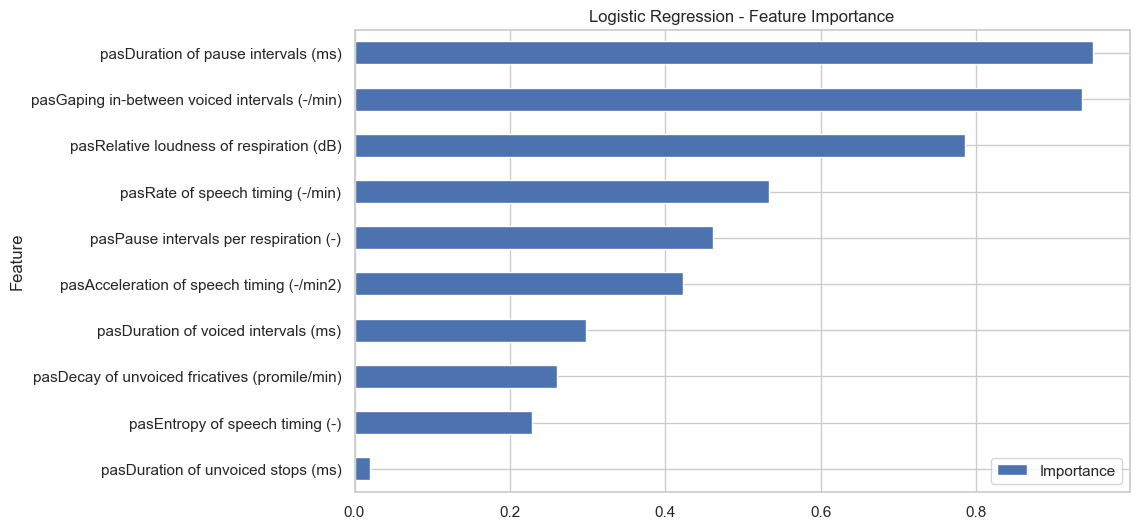

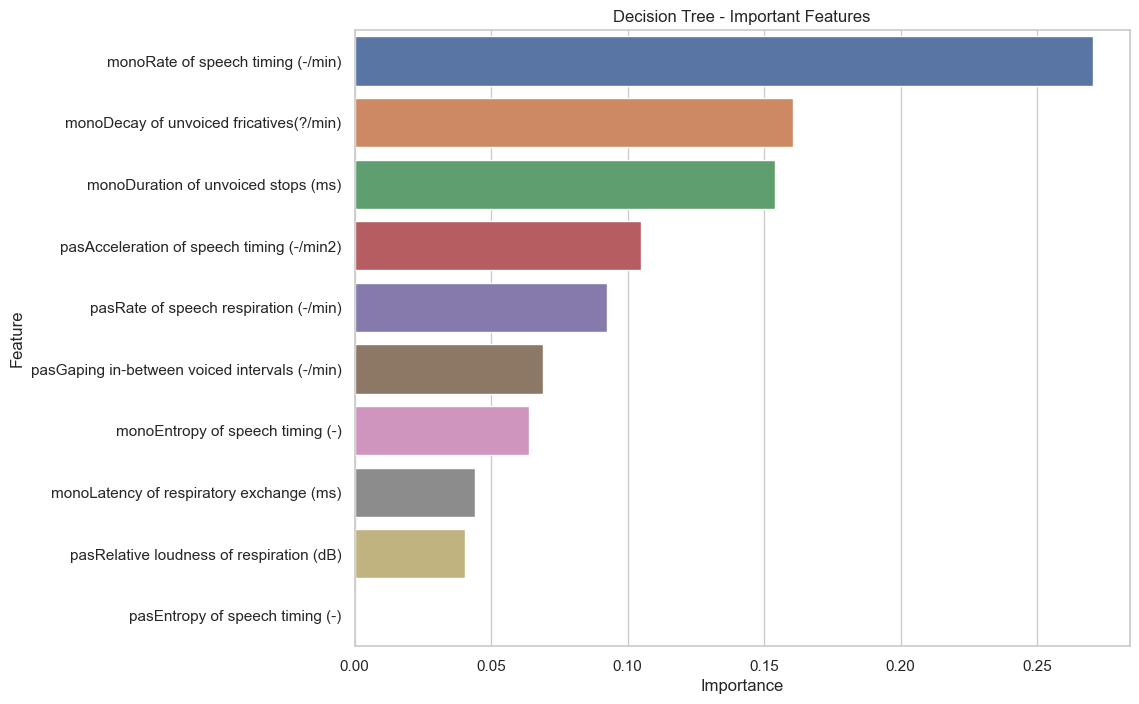

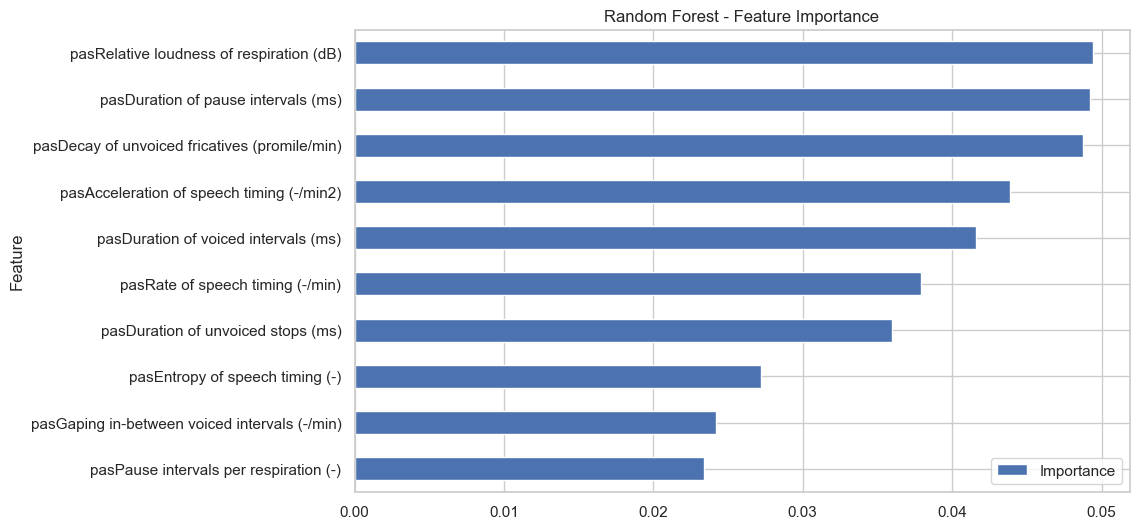

ValueError: All arrays must be of the same length

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import MultiIndex
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import seaborn as sns

# Read in the data
df = pd.read_csv('data/dataset.csv')
df_encoded = pd.get_dummies(df, columns=['Gender', 'Positive history of Parkinson disease in family', 'Antidepressant therapy',
                                          'Antiparkinsonian medication', 'Antipsychotic medication', 'Benzodiazepine medication'],
                            drop_first=True)

# Drop specified features
features_to_drop = ['Age (years)', 'Levodopa equivalent (mg/day)', 'Clonazepam (mg/day)']

y = df_encoded['Pyn']
X = df_encoded.drop(['Pyn'] + features_to_drop, axis=1)

# Logistic Regression feature importance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)}).head(10)
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Logistic Regression - Feature Importance')
plt.show()

# Decision Tree
hps = {
    'max_depth': 3,
    'min_samples_split': 4
}
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
feat_dict = {}
for col, val in sorted(zip(X.columns, tree.feature_importances_), key=lambda x: x[1], reverse=True):
    feat_dict[col] = val

feat_df = pd.DataFrame({'Feature': feat_dict.keys(), 'Importance': feat_dict.values()}).head(10)
values = feat_df.Importance
idx = feat_df.Feature
plt.figure(figsize=(10, 8))
sns.barplot(y=idx, x=values).set(title='Decision Tree - Important Features')
plt.show()

# Random Forest
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
feat_importances = forest.feature_importances_
feat_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feat_importances}).head(10)
feat_df_rf = feat_df_rf.sort_values('Importance', ascending=True)
feat_df_rf.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Random Forest - Feature Importance')
plt.show()

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_feat_importances = np.array([1 / x for x in knn.kneighbors(X_test, 3)[0].min(axis=1)])
knn_feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': knn_feat_importances}).head(10)
knn_feat_df = knn_feat_df.sort_values('Importance', ascending=True)
knn_feat_df.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('K-Nearest Neighbors - Feature Importance')
plt.show()

# Support Vector Machine
svm = SVC(kernel='linear', C=1e-1, gamma=1e-3)
svm.fit(X_train, y_train)
svm_coefficients = svm.coef_[0]
svm_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(svm_coefficients)}).head(10)
svm_feature_importance = svm_feature_importance.sort_values('Importance', ascending=True)
svm_feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Support Vector Machine - Feature Importance')
plt.show()

# XGBoost
model_xgb = XGBClassifier()
model_xgb.fit(X, y)
feature_importance_xgb = model_xgb.feature_importances_[:10]
sorted_idx_xgb = np.argsort(feature_importance_xgb)
fig_xgb = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx_xgb)), feature_importance_xgb[sorted_idx_xgb], align='center')
plt.yticks(range(len(sorted_idx_xgb)), np.array(X.columns)[sorted_idx_xgb])
plt.title('XGBoost - Feature Importance')
plt.show()


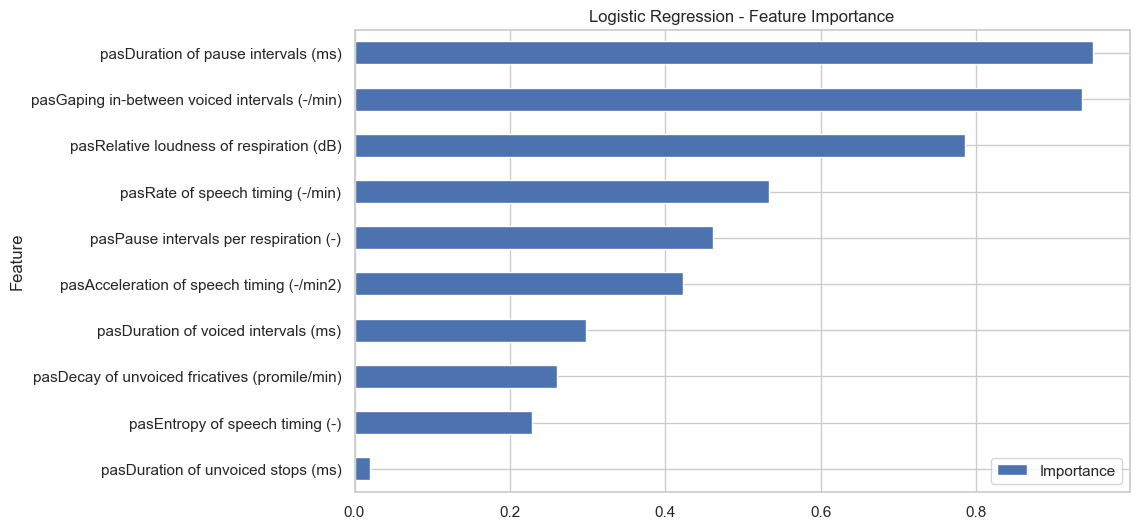

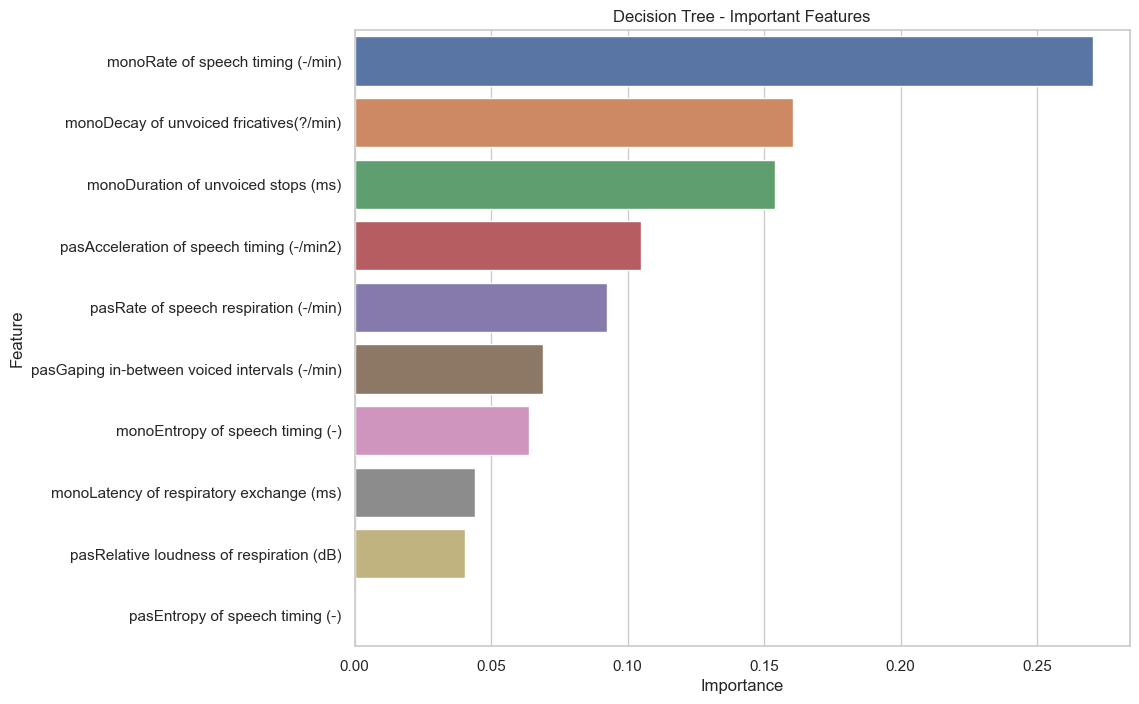

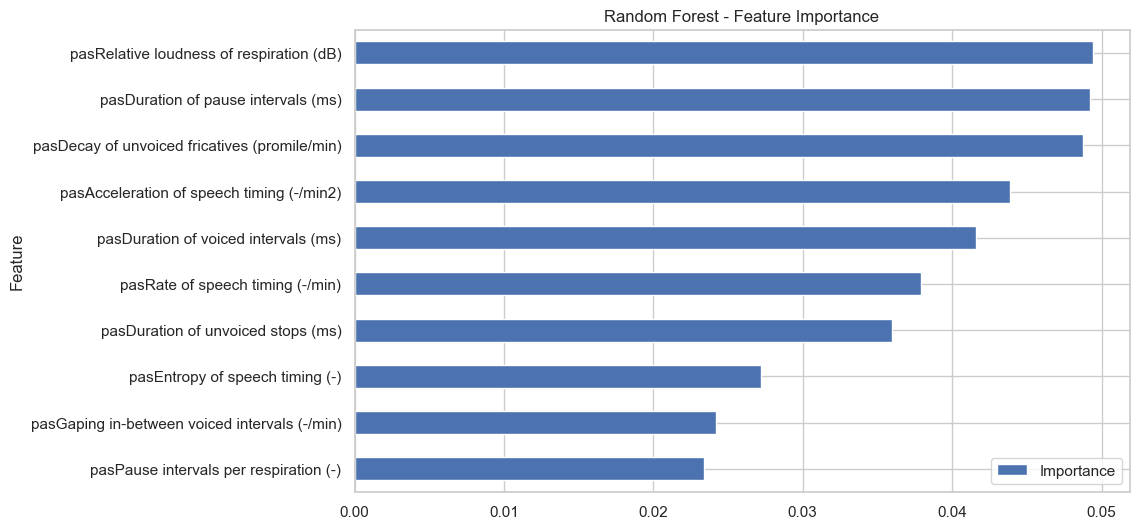

ValueError: All arrays must be of the same length

In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import MultiIndex
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import seaborn as sns

# Read in the data
df = pd.read_csv('data/dataset.csv')
df_encoded = pd.get_dummies(df, columns=['Gender', 'Positive history of Parkinson disease in family', 'Antidepressant therapy',
                                          'Antiparkinsonian medication', 'Antipsychotic medication', 'Benzodiazepine medication'],
                            drop_first=True)

# Drop specified features
features_to_drop = ['Age (years)', 'Levodopa equivalent (mg/day)', 'Clonazepam (mg/day)']

y = df_encoded['Pyn']
X = df_encoded.drop(['Pyn'] + features_to_drop, axis=1)

# Logistic Regression feature importance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)}).head(10)
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Logistic Regression - Feature Importance')
plt.savefig('logistic_regression_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Decision Tree
hps = {
    'max_depth': 3,
    'min_samples_split': 4
}
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
feat_dict = {}
for col, val in sorted(zip(X.columns, tree.feature_importances_), key=lambda x: x[1], reverse=True):
    feat_dict[col] = val

feat_df = pd.DataFrame({'Feature': feat_dict.keys(), 'Importance': feat_dict.values()}).head(10)
values = feat_df.Importance
idx = feat_df.Feature
plt.figure(figsize=(10, 8))
sns.barplot(y=idx, x=values).set(title='Decision Tree - Important Features')
plt.savefig('decision_tree_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Random Forest
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
feat_importances = forest.feature_importances_
feat_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feat_importances}).head(10)
feat_df_rf = feat_df_rf.sort_values('Importance', ascending=True)
feat_df_rf.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Random Forest - Feature Importance')
plt.savefig('random_forest_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_feat_importances = np.array([1 / x for x in knn.kneighbors(X_test, 3)[0].min(axis=1)])
knn_feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': knn_feat_importances}).head(10)
knn_feat_df = knn_feat_df.sort_values('Importance', ascending=True)
knn_feat_df.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('K-Nearest Neighbors - Feature Importance')
plt.savefig('knn_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Support Vector Machine
svm = SVC(kernel='linear', C=1e-1, gamma=1e-3)
svm.fit(X_train, y_train)
svm_coefficients = svm.coef_[0]
svm_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(svm_coefficients)}).head(10)
svm_feature_importance = svm_feature_importance.sort_values('Importance', ascending=True)
svm_feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Support Vector Machine - Feature Importance')
plt.savefig('svm_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# XGBoost
model_xgb = XGBClassifier()
model_xgb.fit(X, y)
feature_importance_xgb = model_xgb.feature_importances_[:10]
sorted_idx_xgb = np.argsort(feature_importance_xgb)
fig_xgb = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx_xgb)), feature_importance_xgb[sorted_idx_xgb], align='center')
plt.yticks(range(len(sorted_idx_xgb)), np.array(X.columns)[sorted_idx_xgb])
plt.title('XGBoost - Feature Importance')
plt.savefig('xgboost_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


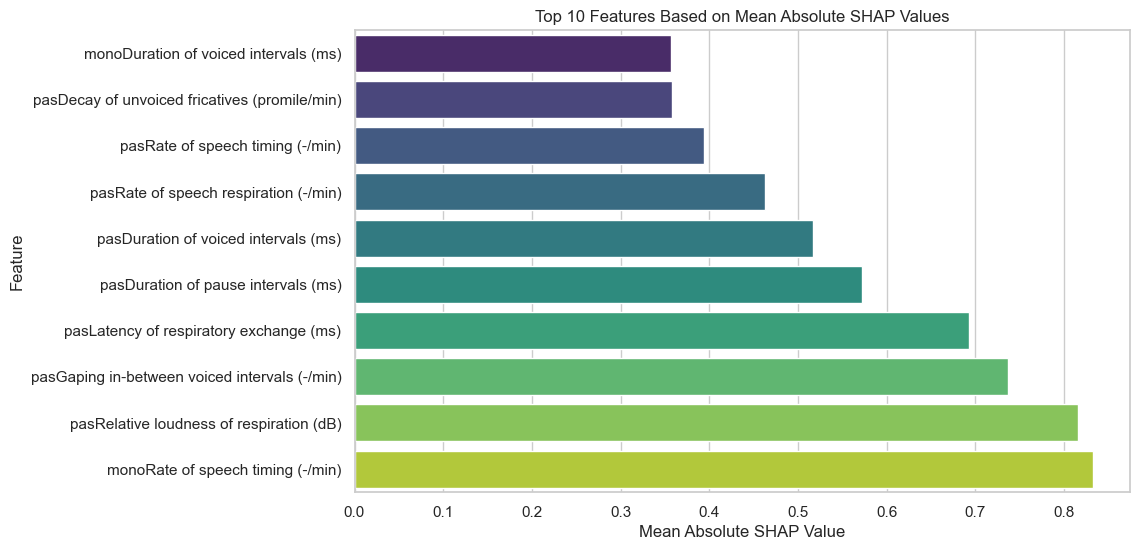

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [384]:
import shap

# ... (previous code remains unchanged)

# XGBoost
model_xgb = XGBClassifier()
model_xgb.fit(X, y)

# Calculate SHAP values for the test set
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test)

# Calculate global feature importance values
global_importance = np.abs(shap_values).mean(axis=0)

# Plot the top 10 features based on mean absolute SHAP values
top_features_idx = np.argsort(global_importance)[-10:]
top_features = X.columns[top_features_idx]
top_features_values = global_importance[top_features_idx]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features_values, y=top_features, palette='viridis')
plt.title('Top 10 Features Based on Mean Absolute SHAP Values')
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.savefig('top_features_shap_values.png', dpi=300, bbox_inches='tight')
plt.show()

# Indices of data points to visualize
data_point_indices = [0, 100, 200]

# Create force plots for the specified data points - 0, 100, 200
for idx in data_point_indices:
    # Generate a force plot for the data point
    shap.force_plot(explainer.expected_value, shap_values[idx, :], X_test.iloc[idx, :],
                    matplotlib=True, show=False)
    plt.savefig(f'force_plot_data_point_{idx}.png', dpi=300, bbox_inches='tight')
    plt.show()


In [390]:
# ... (previous code remains unchanged)

# Indices of data points to visualize
data_point_indices = [0, 100, 200]

# Create force plots for the specified data points - 0, 100, 200
for idx in data_point_indices:
    # Generate a force plot for the data point
    shap.force_plot(explainer.expected_value, shap_values[idx, :], X_test.iloc[idx, :],
                    matplotlib=True, show=False)
    plt.savefig(f'force_plot_data_point_{idx}.png', dpi=300, bbox_inches='tight')
    plt.close()  # Close the figure to avoid duplicate plots in the next iteration


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

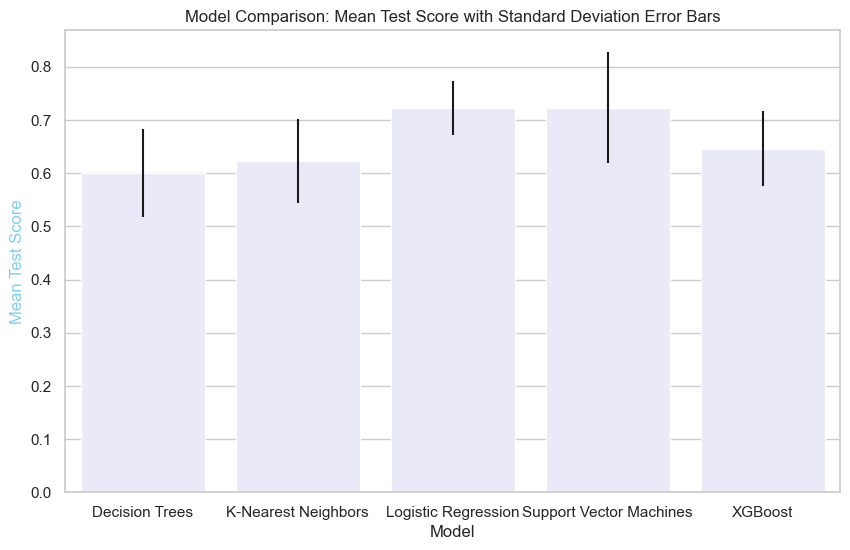

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Test Scores - Means
means = {
    'Decision Trees': 0.600000,
    'K-Nearest Neighbors': 0.623077,
    'Logistic Regression': 0.723077,
    'Support Vector Machines': 0.723077,
    'XGBoost': 0.646154
}

# Test Scores - Standard Deviations
std_devs = {
    'Decision Trees': 0.082849,
    'K-Nearest Neighbors': 0.078446,
    'Logistic Regression': 0.051025,
    'Support Vector Machines': 0.104344,
    'XGBoost': 0.070501
}

# Create a DataFrame for easy plotting
df = pd.DataFrame(list(means.items()), columns=['Model', 'Mean Test Score'])
df['Standard Deviation'] = std_devs.values()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot means with error bars for standard deviation
sns.barplot(x='Model', y='Mean Test Score', data=df, ax=ax, color='skyblue', label='Mean Test Score', yerr=df['Standard Deviation'])

# Customize the plot
ax.set_ylabel('Mean Test Score', color='skyblue')

# Show the plot
plt.title('Model Comparison: Mean Test Score with Standard Deviation Error Bars')
plt.show()


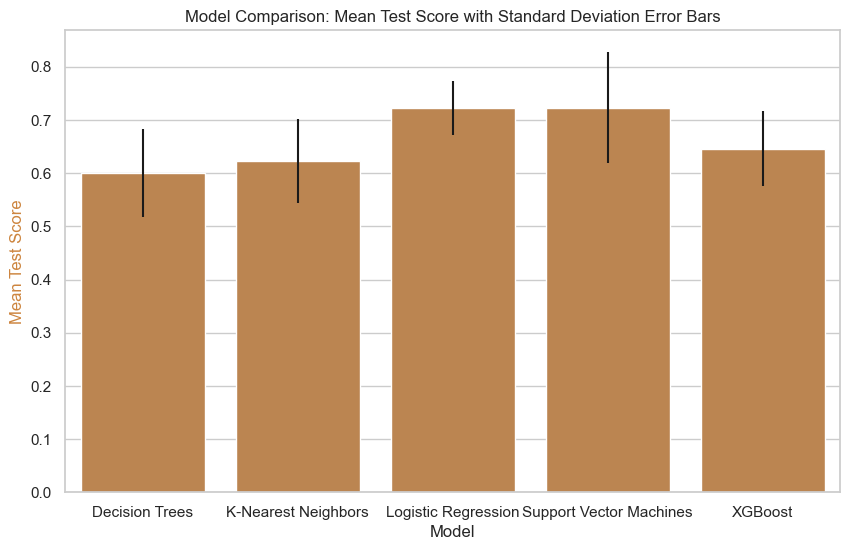

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Test Scores - Means
means = {
    'Decision Trees': 0.600000,
    'K-Nearest Neighbors': 0.623077,
    'Logistic Regression': 0.723077,
    'Support Vector Machines': 0.723077,
    'XGBoost': 0.646154
}

# Test Scores - Standard Deviations
std_devs = {
    'Decision Trees': 0.082849,
    'K-Nearest Neighbors': 0.078446,
    'Logistic Regression': 0.051025,
    'Support Vector Machines': 0.104344,
    'XGBoost': 0.070501
}

# Create a DataFrame for easy plotting
df = pd.DataFrame(list(means.items()), columns=['Model', 'Mean Test Score'])
df['Standard Deviation'] = std_devs.values()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot means with error bars for standard deviation
sns.barplot(x='Model', y='Mean Test Score', data=df, ax=ax, color='peru', label='Mean Test Score', yerr=df['Standard Deviation'])

# Customize the plot
ax.set_ylabel('Mean Test Score', color='peru')

# Show the plot
plt.title('Model Comparison: Mean Test Score with Standard Deviation Error Bars')

# Save the plot with DPI of 300 or above
plt.savefig('model_comparison_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

# Read in the data
df = pd.read_csv('data/dataset.csv')

df_encoded = pd.get_dummies(df, columns=['Gender', 'Positive history of Parkinson disease in family', 'Antidepressant therapy',
                                          'Antiparkinsonian medication', 'Antipsychotic medication', 'Benzodiazepine medication'],
                            drop_first=True)

# Split the data into features (X) and target variable (y)
X = df.drop('Pyn', axis=1)
y = df['Pyn']

# Assuming X and y are your features and labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Split the remaining data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

# Create transformers
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Initialize the XGBoost classifier with a specific random state
xgb_model = XGBClassifier(random_state=42)

# Define hyperparameters for tuning
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Implement randomized search for hyperparameter tuning with early stopping
random_search = RandomizedSearchCV(xgb_model,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   cv=5,
                                   verbose=1,
                                   random_state=42)

# Create and fit the full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', random_search)])

# Fit the model on the training data with early stopping
pipeline.fit(X_train, y_train)

# Train the model on five different random states
random_states = [1, 10, 20, 42, 100]
best_models = []
test_sets = []

for random_state in random_states:
    # Split the data with the same random state for consistency
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    # Save best models
    best_models.append(pipeline.named_steps['classifier'].best_estimator_)
    # Save test sets
    test_set_df = pd.concat([X_test, y_test], axis=1)
    test_sets.append(test_set_df)

# Initialize the master_df as an empty DataFrame
master_df = pd.DataFrame()

# Iterate over the best models and their corresponding test sets
for best_model, test_set in zip(best_models, test_sets):
    if 'Pyn' in test_set.columns:
        droped_test_data = test_set.drop('Pyn', axis=1)
        test_set_preprocessed = pipeline.named_steps['preprocessor'].transform(droped_test_data)
        merged_columns = [j for i in [pipeline.named_steps['preprocessor'].transformers_[0][2],
                                      pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()]
                          for j in i]
        test_set_preprocessed_df = pd.DataFrame(test_set_preprocessed, columns=merged_columns)
        test_set_preprocessed_df['Pyn'] = test_set['Pyn']
        test_preds = best_model.predict(test_set_preprocessed_df.drop('Pyn', axis=1))
        results_df = pd.concat([test_set, pd.Series(test_set_preprocessed_df['Pyn'], name='True_Label'),
                                pd.Series(test_preds, name='Predicted_Label')], axis=1)
        # Append the results to the master dataframe
        master_df = pd.concat([master_df, results_df], axis=0)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


ValueError: Feature shape mismatch, expected: 39, got 40


Random State: 21
Best Logistic Regression parameters: {'LR__C': 1.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Validation score: 0.6179
Test score: 0.6923
Baseline score: 0.8077

Random State: 42
Best Logistic Regression parameters: {'LR__C': 0.1, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Validation score: 0.7339
Test score: 0.6538
Baseline score: 0.4615

Random State: 84
Best Logistic Regression parameters: {'LR__C': 0.5, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Validation score: 0.7196
Test score: 0.7692
Baseline score: 0.5000

Random State: 168
Best Logistic Regression parameters: {'LR__C': 0.5, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Validation score: 0.6571
Test score: 0.7308
Baseline score: 0.5000

Random State: 336
Best Logistic Regression parameters: {'LR__C': 0.1, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
Validation score: 0.5911
Test score: 0.6538
Baseline score: 0.5769

Random State: 21
Best Decision Trees parameters: {'DT__criterion': 'gini

ValueError: Invalid parameter 'logisticregression' for estimator Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('logisticregression',
                                  LogisticRegression())]))]). Valid parameters are: ['memory', 'steps', 'verbose'].

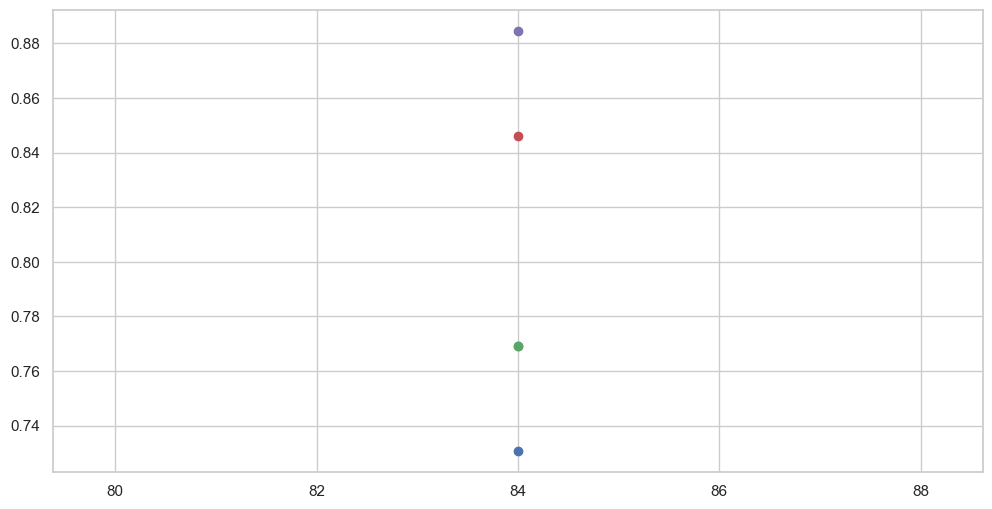

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Read in the data
df = pd.read_csv('data/dataset.csv')

# Set variables for the targets and features
y = df_encoded['Pyn']
X = df_encoded.drop('Pyn', axis=1)

# Assuming X and y are your features and labels
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Split the remaining data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)



df_encoded = pd.get_dummies(df, columns=['Gender', 'Positive history of Parkinson disease in family', 'Antidepressant therapy',
                                          'Antiparkinsonian medication', 'Antipsychotic medication', 'Benzodiazepine medication'],
                            drop_first=True)


random_states = [21, 42, 84, 168, 336]

# Dictionary to store results
results = {'Model': [], 'Random State': [], 'Best Params': [], 'Validation Score': [], 'Test Score': []}

# Model parameters
logistic_regression_grid_params = [{'LR__penalty': ['l1', 'l2'], 'LR__C': [100, 10, 1.0, 0.1, 0.01, 0.001], 'LR__solver': ['liblinear']}]
decision_tree_grid_params = [{'DT__criterion': ['gini', 'entropy'], 'DT__min_samples_leaf': [1, 2, 3, 4, 5, 6],
                              'DT__max_depth': [3, 5, 7, 10, 13], 'DT__min_samples_split': [2, 3, 4, 5]}]
knn_grid_params = [{'KNN__n_neighbors': [1, 3, 5, 7, 10, 20, 50], 'KNN__weights': ['uniform', 'distance'],
                    'KNN__metric': ['euclidean', 'manhattan']}]
svm_grid_params = [{'SVM__kernel': ['linear', 'rbf'], 'SVM__C': [1e-1, 1e0, 1e1, 1e2], 'SVM__gamma': [1e-3, 1e-1, 1e3]}]
xgb_grid_params = [{'XGB__learning_rate': [0.1, 0.2, 0.3], 'XGB__max_depth': [1, 3, 5, 10, 50],
                    'XGB__min_child_weight': [1, 2, 3], 'XGB__subsample': [1.0, 0.8, 0.6],
                    'XGB__n_estimators': [50, 100, 150], 'XGB__reg_alpha': [1e-2, 1e-1, 1e0, 1e1, 1e2]}]

# Apply 10-fold cross-validation to all models
kf = KFold(n_splits=10, shuffle=True)

for i, model in enumerate(grid_searches):
    for random_state in random_states:
        # Split the data into training, validation, and test sets (6:2:2)
        X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.6, random_state=random_state)
        X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=random_state)
        
        # Calculate baseline score
        baseline_preds = np.random.choice([0, 1], size=len(y_test))
        baseline_score = accuracy_score(y_test, baseline_preds)

        # Fit the model
        model.fit(X_train, y_train)

        # Save results
        results['Model'].append(grid_dict[i])
        results['Random State'].append(random_state)
        results['Best Params'].append(model.best_params_)
        results['Validation Score'].append(model.best_score_)
        results['Test Score'].append(model.score(X_test, y_test))

        # Print the results
        print(f"\nRandom State: {random_state}")
        print(f"Best {grid_dict[i]} parameters: {model.best_params_}")
        print(f"Validation score: {model.best_score_:.4f}")
        print(f"Test score: {model.score(X_test, y_test):.4f}")
        print(f"Baseline score: {baseline_score:.4f}")

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Extract the rows with the best test scores for each model
best_scores_df = results_df.loc[results_df.groupby('Model')['Test Score'].idxmax()]

# Print means of the best test scores
print("\nBest Test Scores")
print(best_scores_df.groupby('Model')['Test Score'].mean())

# Plot means of the best test scores
plt.figure(figsize=(12, 6))
for model, group in best_scores_df.groupby('Model'):
    plt.errorbar(group['Random State'], group['Test Score'], yerr=group['Test Score'].std(), label=model, linestyle='--', marker='o')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

# Read in the data
df = pd.read_csv('data/dataset.csv')

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Positive history of Parkinson disease in family', 'Antidepressant therapy',
                                          'Antiparkinsonian medication', 'Antipsychotic medication', 'Benzodiazepine medication'],
                            drop_first=True)

# Set variables for the targets and features
y = df_encoded['Pyn']
X = df_encoded.drop('Pyn', axis=1)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Define the models
models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression()),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': make_pipeline(StandardScaler(), svm.SVC()),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Define grid search parameters for each model
grid_search_params = {
    'Logistic Regression': [{'logisticregression__penalty': ['l1', 'l2'],
                             'logisticregression__C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                             'logisticregression__solver': ['liblinear']}],
    'Decision Tree': [{'decisiontreeclassifier__criterion': ['gini', 'entropy'],
                       'decisiontreeclassifier__min_samples_leaf': [1, 2, 3, 4, 5, 6],
                       'decisiontreeclassifier__max_depth': [3, 5, 7, 10, 13],
                       'decisiontreeclassifier__min_samples_split': [2, 3, 4, 5]}],
    'K-Nearest Neighbors': [{'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 10, 20, 50],
                             'kneighborsclassifier__weights': ['uniform', 'distance'],
                             'kneighborsclassifier__metric': ['euclidean', 'manhattan']}],
    'Support Vector Machine': [{'svc__kernel': ['linear', 'rbf'],
                                'svc__C': [1e-1, 1e0, 1e1, 1e2],
                                'svc__gamma': [1e-3, 1e-1, 1e3]}],
    'Random Forest': [{}],  # You can add parameters if needed
    'XGBoost': [{'xgbclassifier__learning_rate': [0.1, 0.2, 0.3],
                 'xgbclassifier__max_depth': [1, 3, 5, 10, 50],
                 'xgbclassifier__min_child_weight': [1, 2, 3],
                 'xgbclassifier__subsample': [1.0, 0.8, 0.6],
                 'xgbclassifier__n_estimators': [50, 100, 150],
                 'xgbclassifier__reg_alpha': [1e-2, 1e-1, 1e0, 1e1, 1e2]}]
}

# Dictionary to store grid search results
grid_search_results = {}

# Perform grid search for each model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"\nGrid search for {model_name}...")
    
    # Create a pipeline for the model
    pipeline = make_pipeline(StandardScaler(), model)
    
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(pipeline, grid_search_params[model_name], cv=kf, scoring='accuracy', verbose=1)
    
    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)
    
    # Save the grid search results
    grid_search_results[model_name] = grid_search

# Iterate over the results and print confusion matrix and overall accuracy
for model_name, model_results in grid_search_results.items():
    print(f"\nResults for {model_name}:")
    
    # Get the best model from the grid search
    best_model = model_results.best_estimator_
    
    # Use the best model to make predictions on the test set
    y_pred = best_model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))
    
    # Compute and print overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nOverall Accuracy: {accuracy:.4f}")


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Load in the data
df = pd.read_csv('data/dataset.csv')
data = main_data.loc[(main_data['sex'] == 'Male')]
data.dropna(axis=0)
print(data)
data = data.drop(['id', 'name'], axis=1)

# Split the data into features (X) and target variable (y)
X = data.drop('two_year_recid', axis=1) 
y = data['two_year_recid']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist() 
numerical_features = X.select_dtypes(include=['number']).columns.tolist()

# Create transformers
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Initialize the XGBoost classifier with a specific random state
xgb_model = XGBClassifier(random_state=42)

# Define hyperparameters for tuning
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Implement randomized search for hyperparameter tuning with early stopping
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=1,
    random_state=42
)

# Create and fit the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', random_search)
])

# Fit the model on the training data with early stopping
pipeline.fit(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predictions on the training and testing sets
train_preds = pipeline.predict(X_train)
test_preds = pipeline.predict(X_test)

# Calculate accuracy scores
train_score = accuracy_score(y_train, train_preds)
test_score = accuracy_score(y_test, test_preds)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, test_preds, normalize='true')

# Print the overall accuracy of the model
print("\nOverall Accuracy:", test_score)
print(confusion_matrix(y_test, test_preds));
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='gist_earth', values_format='.2f') 
plt.title('Males')
plt.show()

Fitting 10 folds for each of 12 candidates, totalling 120 fits

Random State: 21
Best Logistic Regression parameters: {'logisticregression__C': 1.0, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
Validation score: 0.6143
Test score: 0.6538
Baseline score: 0.6154
Confusion Matrix:
[[ 5  2]
 [ 7 12]]
Accuracy Score: 0.6538
Fitting 10 folds for each of 12 candidates, totalling 120 fits

Random State: 42
Best Logistic Regression parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Validation score: 0.7607
Test score: 0.6538
Baseline score: 0.4615
Confusion Matrix:
[[ 6  2]
 [ 7 11]]
Accuracy Score: 0.6538
Fitting 10 folds for each of 12 candidates, totalling 120 fits

Random State: 84
Best Logistic Regression parameters: {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Validation score: 0.7232
Test score: 0.6154
Baseline score

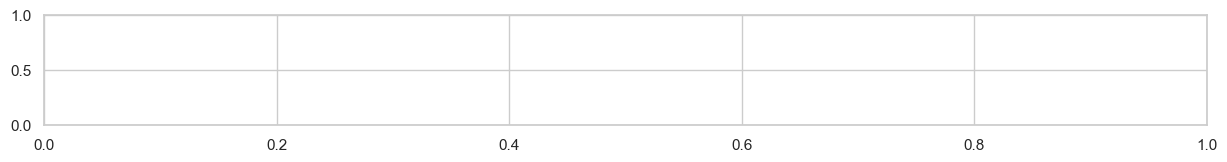

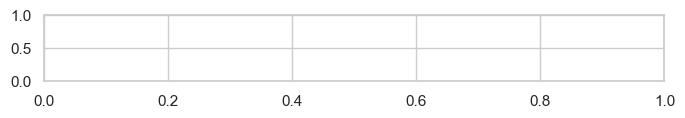

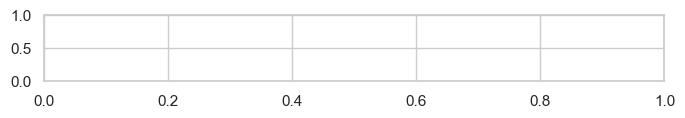

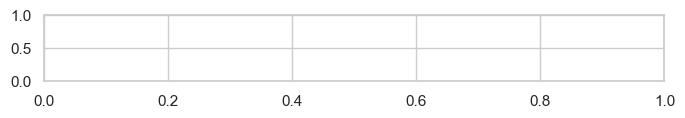

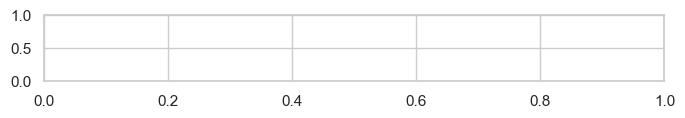

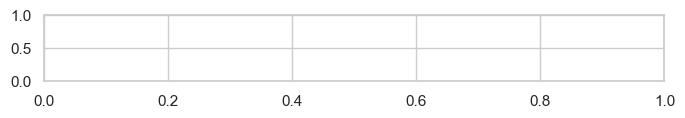

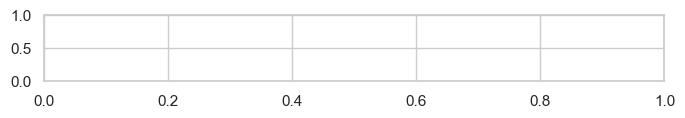

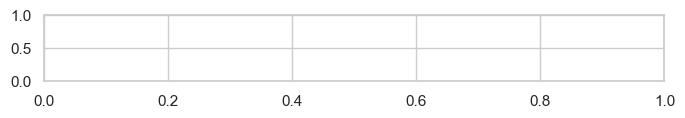

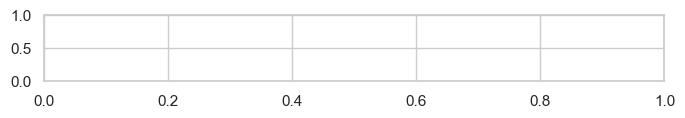

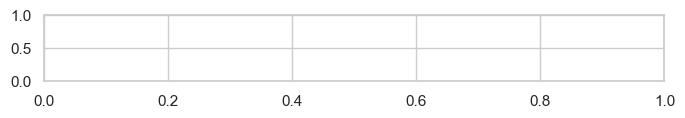

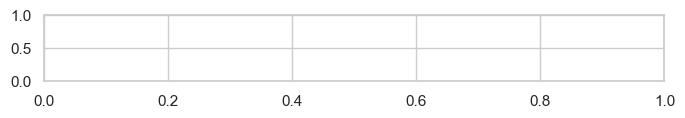

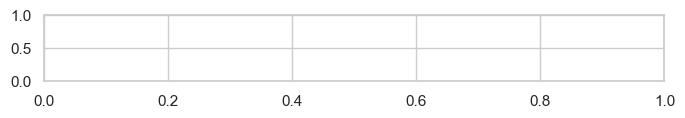

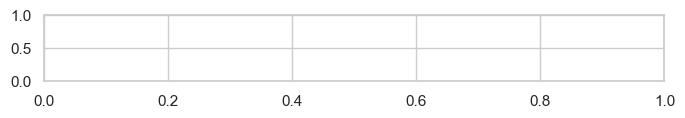

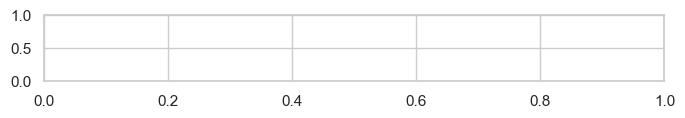

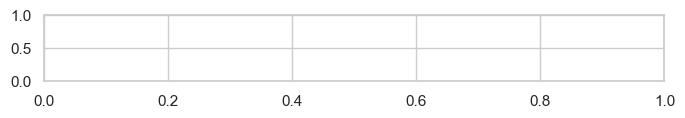

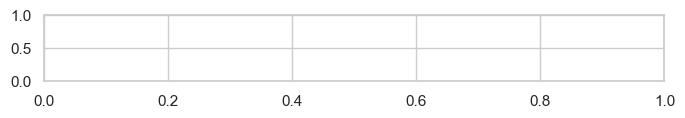

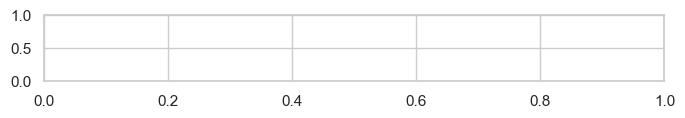

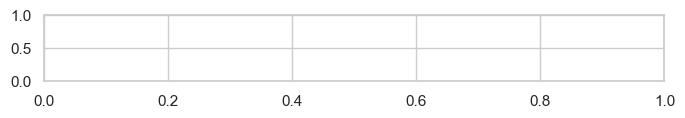

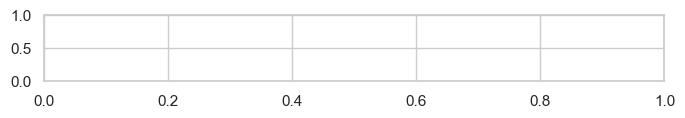

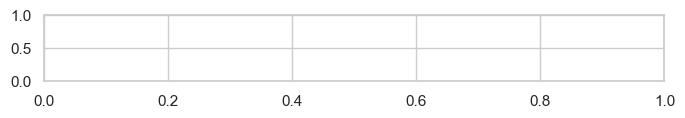

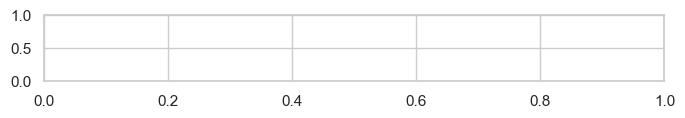

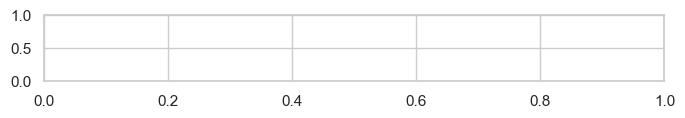

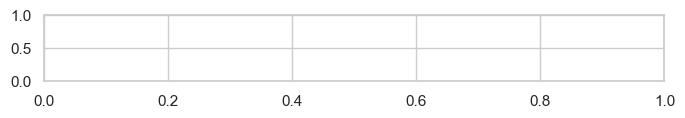

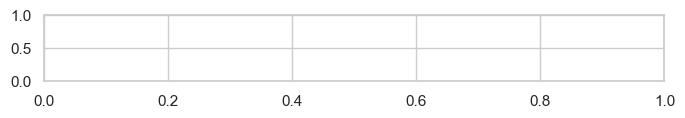

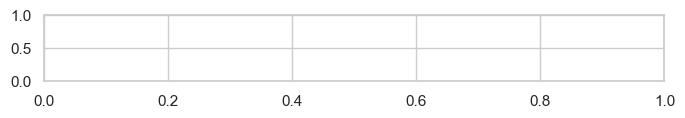

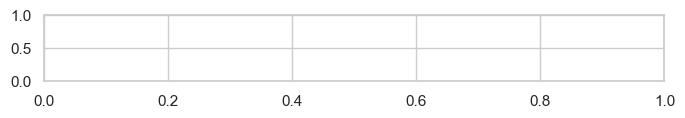

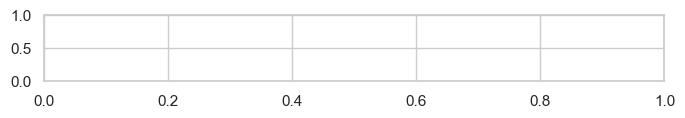

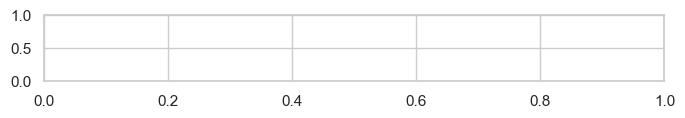

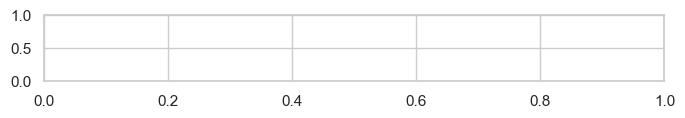

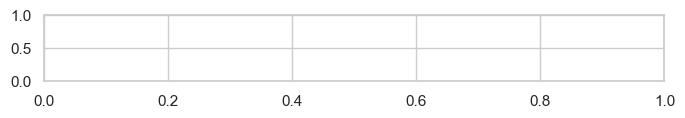

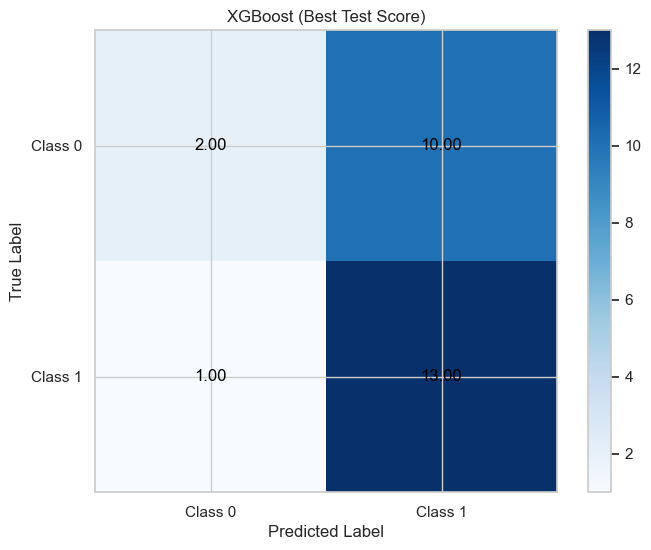

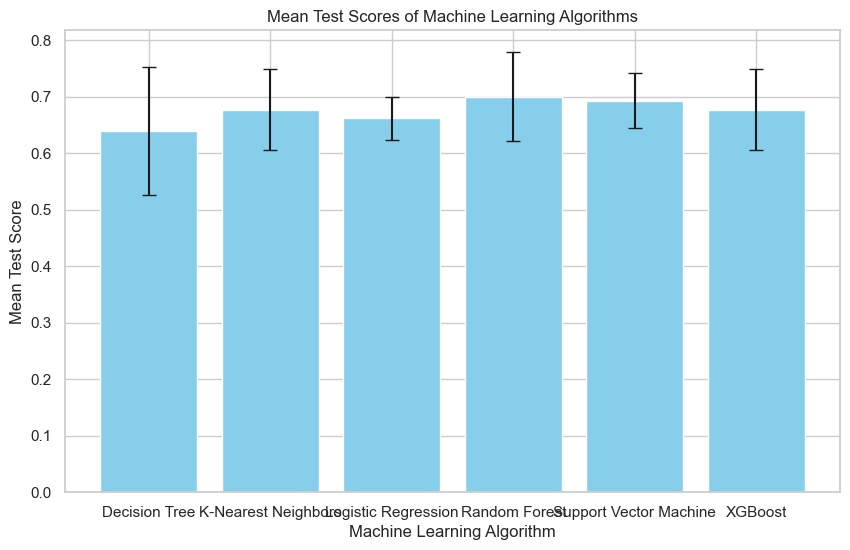

IndexError: list index out of range

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Read in the data
df = pd.read_csv('data/dataset.csv')

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Positive history of Parkinson disease in family', 'Antidepressant therapy',
                                          'Antiparkinsonian medication', 'Antipsychotic medication', 'Benzodiazepine medication'],
                            drop_first=True)

# Set variables for the targets and features
y = df_encoded['Pyn']
X = df_encoded.drop('Pyn', axis=1)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Dictionary to store results
results = {'Model': [], 'Random State': [], 'Best Params': [], 'Validation Score': [], 'Test Score': [], 'Confusion Matrix': []}

# Apply 10-fold cross-validation to all models
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define the models
models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression()),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': make_pipeline(StandardScaler(), svm.SVC()),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Define grid search parameters for each model
grid_search_params = {
    'Logistic Regression': [{'logisticregression__penalty': ['l1', 'l2'],
                             'logisticregression__C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                             'logisticregression__solver': ['liblinear']}],
    'Decision Tree': [{'criterion': ['gini', 'entropy'],
                       'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                       'max_depth': [3, 5, 7, 10, 13],
                       'min_samples_split': [2, 3, 4, 5]}],
    'K-Nearest Neighbors': [{'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                             'n_neighbors': [1, 3, 5, 7, 10, 20, 50],
                             'weights': ['uniform', 'distance'],
                             'metric': ['euclidean', 'manhattan']}],
    'Support Vector Machine': [{'svc__kernel': ['linear', 'rbf'],
                                'svc__C': [1e-1, 1e0, 1e1, 1e2],
                                'svc__gamma': [1e-3, 1e-1, 1e3]}],
    'Random Forest': [{
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
    }],
    'XGBoost': [{'learning_rate': [0.1, 0.2, 0.3],
                 'max_depth': [1, 3, 5, 10, 50],
                 'min_child_weight': [1, 2, 3],
                 'subsample': [1.0, 0.8, 0.6],
                 'n_estimators': [50, 100, 150],
                 'reg_alpha': [1e-2, 1e-1, 1e0, 1e1, 1e2]}]
}

# Apply 10-fold cross-validation to all models
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create a figure for confusion matrix plots
plt.figure(figsize=(15, 10))

for i, (model_name, model) in enumerate(models.items(), 1):  # Fix the unpacking issue
    for random_state in random_states:
        # Split the data into training, validation, and test sets (6:2:2)
        X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.6, random_state=random_state)
        X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=random_state)

        # Calculate baseline score
        baseline_preds = np.random.choice([0, 1], size=len(y_test))
        baseline_score = accuracy_score(y_test, baseline_preds)

        # Fit the model
        grid_search = GridSearchCV(model, grid_search_params[model_name], cv=kf, scoring='accuracy', verbose=1)
        grid_search.fit(X_train, y_train)

        # Save results
        results['Model'].append(model_name)
        results['Random State'].append(random_state)
        results['Best Params'].append(grid_search.best_params_)
        results['Validation Score'].append(grid_search.best_score_)

        # Use the best model to make predictions on the test set
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        # Compute confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        results['Confusion Matrix'].append(cm)

        # Compute and save accuracy score
        test_score = accuracy_score(y_test, y_pred)
        results['Test Score'].append(test_score)

        # Print the results
        print(f"\nRandom State: {random_state}")
        print(f"Best {model_name} parameters: {grid_search.best_params_}")
        print(f"Validation score: {grid_search.best_score_:.4f}")
        print(f"Test score: {test_score:.4f}")
        print(f"Baseline score: {baseline_score:.4f}")
        print(f"Confusion Matrix:\n{cm}")
        print(f"Accuracy Score: {test_score:.4f}")  # Added line

        # Plot confusion matrix
        plt.subplot(len(models), 1, i)
        plt.figure(figsize=(8, 6))
        plt.title(f"{model_name} (Best Test Score)")
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

        # Add text annotations at the center of each cell
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j, i, f'{cm[i, j]:.2f}', ha='center', va='center', fontsize=12, color='black')

        plt.colorbar()
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.xticks([0, 1], ['Class 0', 'Class 1'])
        plt.yticks([0, 1], ['Class 0', 'Class 1'])

        # Save the plot
        plt.savefig(f"{model_name}_confusion_matrix.png")

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Extract the rows with the best test scores for each model
best_scores_df = results_df.loc[results_df.groupby('Model')['Test Score'].idxmax()]

# Print means of the best test scores
print("\nBest Test Scores")
print(best_scores_df.groupby('Model')['Test Score'].mean())

# Calculate and print the overall accuracy score
overall_accuracy = results_df['Test Score'].mean()
print(f"\nOverall Accuracy Score: {overall_accuracy:.4f}")

# Combine all the test scores from random states and calculate mean test score for each ML algorithm
all_test_scores = results_df.groupby('Model')['Test Score'].apply(list)
mean_test_scores = all_test_scores.apply(np.mean)
std_test_scores = all_test_scores.apply(np.std)

# Print mean test scores and standard deviations for each ML algorithm
print("\nAll Test Scores - Means:")
print(mean_test_scores)
print("\nAll Test Scores - Standard Deviations:")
print(std_test_scores)

# Compare ML algorithms in a plot showing mean test scores and standard deviations
plt.figure(figsize=(10, 6))
plt.bar(mean_test_scores.index, mean_test_scores, yerr=std_test_scores, capsize=5, color='skyblue')
plt.title('Mean Test Scores of Machine Learning Algorithms')
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Mean Test Score')
plt.show()

# Plot confusion matrix for the best test score machine learning algorithm
best_algorithm = best_scores_df.iloc[0]['Model']
best_model_index = results_df[results_df['Model'] == best_algorithm]['Test Score'].idxmax()
best_model = grid_searches[best_model_index]

# Fit the best model on the entire dataset
best_model.fit(X, y)

# Make predictions
best_test_preds = best_model.predict(X_test)

# Calculate confusion matrix
best_conf_matrix = confusion_matrix(y_test, best_test_preds, normalize='true')

# Plot confusion matrix for the best test score machine learning algorithm
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=best_conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='.2f')
plt.title(f'Confusion Matrix - {best_algorithm}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

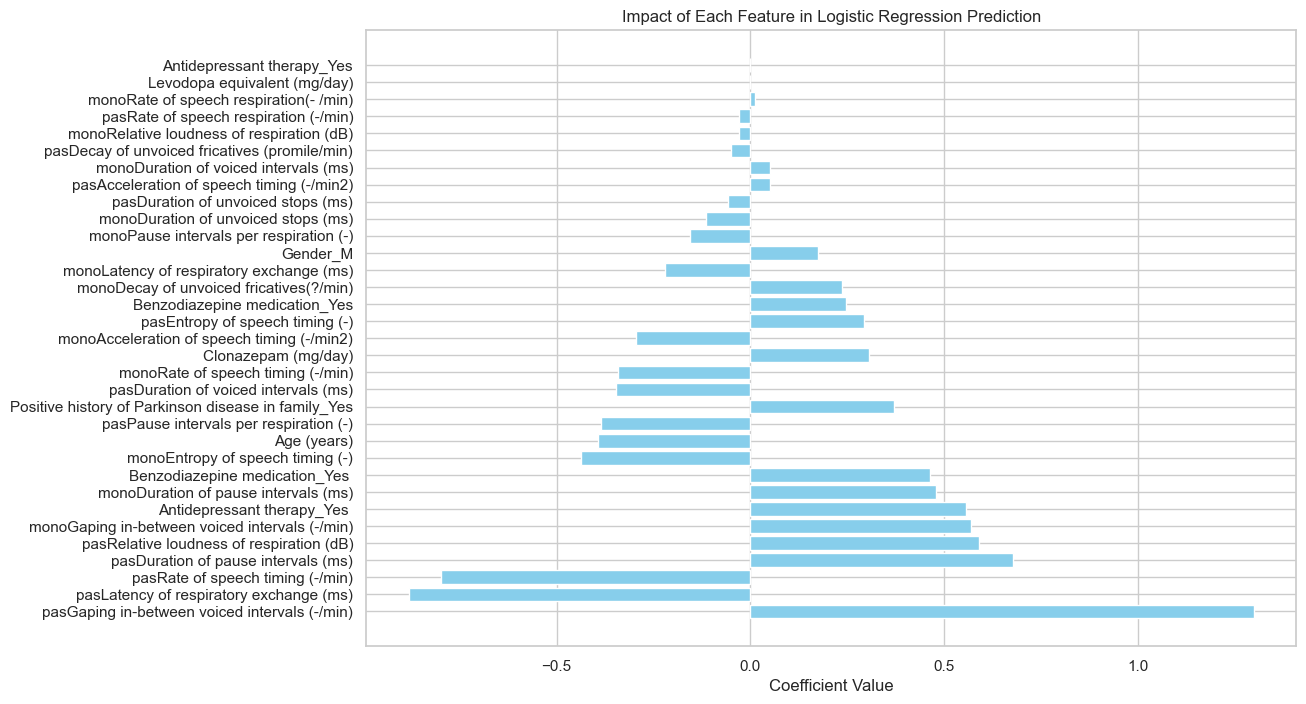

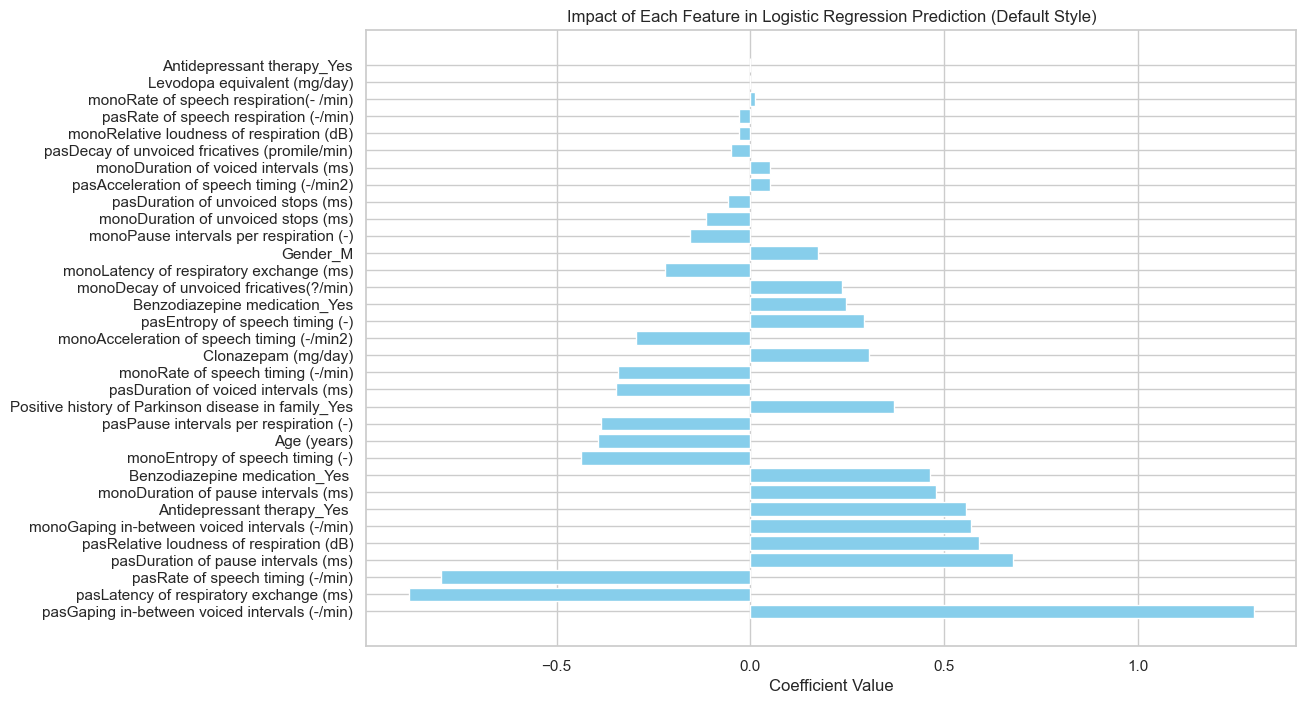

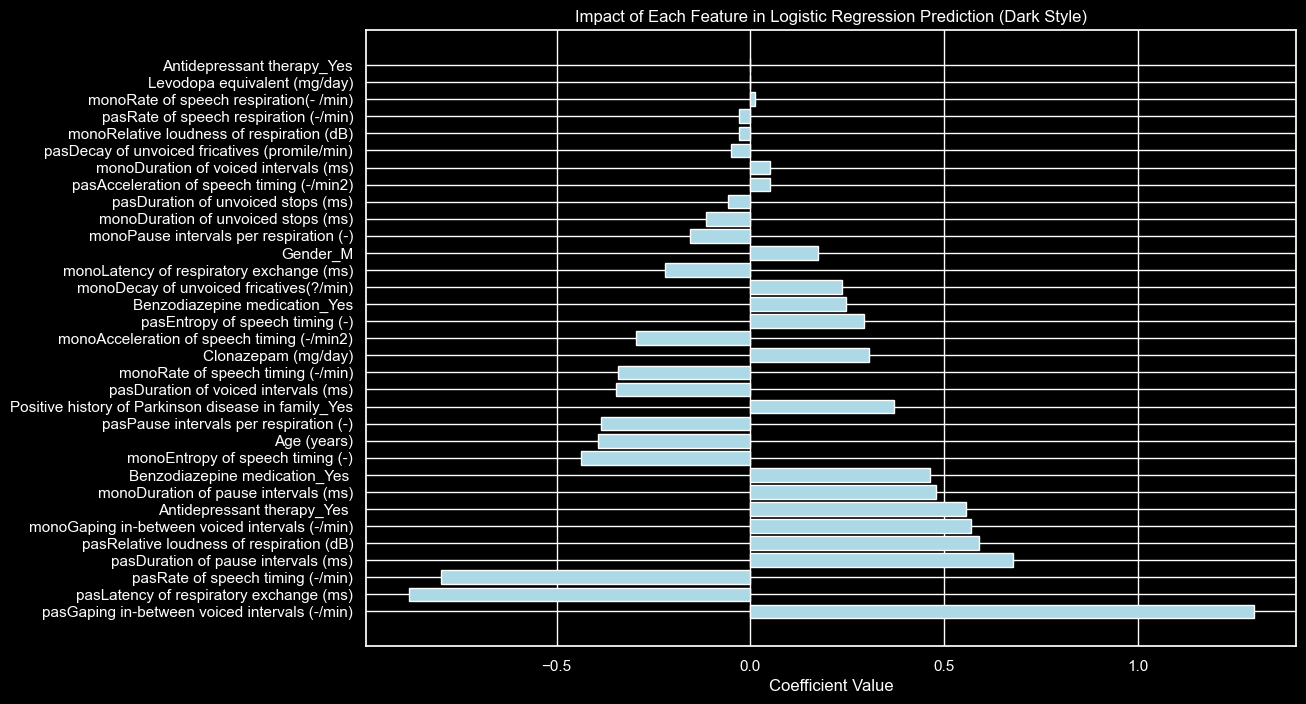

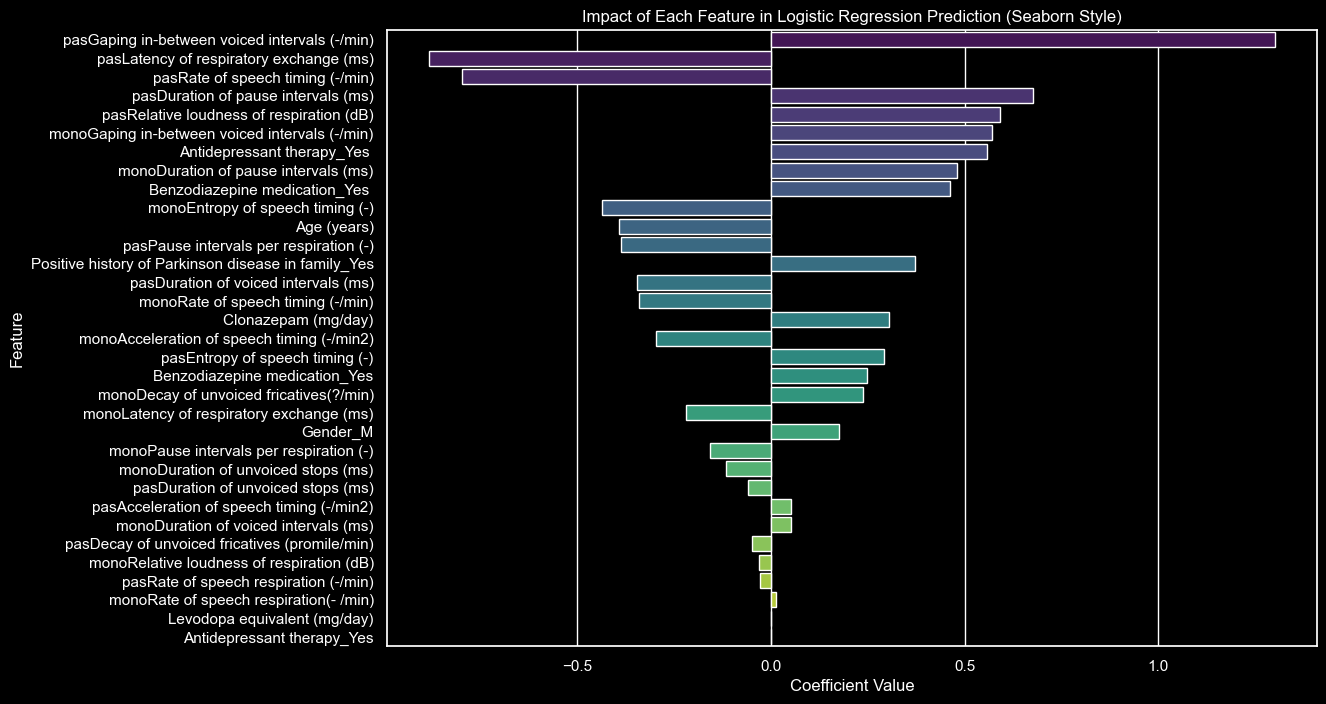

In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Read in the data
df = pd.read_csv('data/dataset.csv')

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Positive history of Parkinson disease in family', 'Antidepressant therapy',
                                          'Antiparkinsonian medication', 'Antipsychotic medication', 'Benzodiazepine medication'],
                            drop_first=True)

# Set variables for the targets and features
y = df_encoded['Pyn']
X = df_encoded.drop('Pyn', axis=1)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

# Extract coefficients and feature names
coefficients = logreg_model.coef_[0]
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values for better visualization
coef_df['Absolute Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the impact of each feature
plt.figure(figsize=(12, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Impact of Each Feature in Logistic Regression Prediction')
plt.show()


# Plot the impact of each feature (Default Style)
plt.figure(figsize=(12, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Impact of Each Feature in Logistic Regression Prediction (Default Style)')

# Save the figure with DPI of 300 or above
plt.savefig('logreg_feature_impact_default.png', dpi=300, bbox_inches='tight')
plt.show()


# Plot the impact of each feature (Dark Style)
plt.style.use('dark_background')  # Dark background style
plt.figure(figsize=(12, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='lightblue')
plt.xlabel('Coefficient Value')
plt.title('Impact of Each Feature in Logistic Regression Prediction (Dark Style)')

# Save the figure with DPI of 300 or above
plt.savefig('logreg_feature_impact_dark.png', dpi=300, bbox_inches='tight')
plt.show()


# Plot the impact of each feature (Seaborn Style)
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.xlabel('Coefficient Value')
plt.title('Impact of Each Feature in Logistic Regression Prediction (Seaborn Style)')

# Save the figure with DPI of 300 or above
plt.savefig('logreg_feature_impact_seaborn.png', dpi=300, bbox_inches='tight')
plt.show()



In [381]:
# your code here

# your code here

import shap

# Calculate SHAP values for the test set
explainer = shap.Explainer(XGB)
shap_values = explainer.shap_values(df_test)

# Calculate global feature importance values
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
feature_indices_shap = np.argsort(mean_abs_shap)[::-1][:10]

# Plot the top 10 features based on mean absolute SHAP values
plt.figure(figsize=(10, 6))
plt.bar(range(10), mean_abs_shap[feature_indices_shap], align="center")
plt.xticks(range(10), df_test.columns[feature_indices_shap], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Mean Absolute SHAP Value")
plt.title("Top 10 Features based on Mean Absolute SHAP Values")
plt.show()

# Indices of data points to visualize
data_point_indices = [0, 100, 200]

# Create force plots for the specified data points - 0, 100, 200
for idx in data_point_indices:
    # Generate a force plot for the data point
    shap.force_plot(explainer.expected_value, shap_values[idx, :], df_test.iloc[idx, :], matplotlib=True, text_rotation=5)
    plt.show()


#shap.force_plot function in the shap library does not directly support a title parameter to add titles

NameError: name 'df_test' is not defined

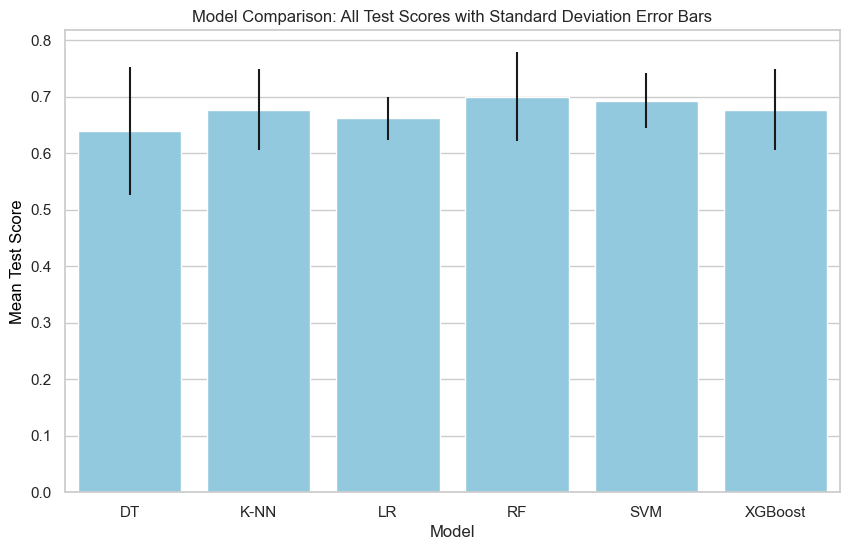

In [379]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# All Test Scores - Means
all_means = {
    'DT': 0.638462,
    'K-NN': 0.676923,
    'LR': 0.661538,
    'RF': 0.700000,
    'SVM': 0.692308,
    'XGBoost': 0.676923
}

# All Test Scores - Standard Deviations
all_std_devs = {
    'DT': 0.113053,
    'KNN': 0.071336,
    'LR': 0.037684,
    'RF': 0.078446,
    'SVM': 0.048650,
    'XGBoost': 0.071336
}

# Create a DataFrame for easy plotting
all_df = pd.DataFrame(list(all_means.items()), columns=['Model', 'Mean Test Score'])
all_df['Standard Deviation'] = all_std_devs.values()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot means with error bars for standard deviation
sns.barplot(x='Model', y='Mean Test Score', data=all_df, ax=ax, color='skyblue', label='Mean Test Score', yerr=all_df['Standard Deviation'])

# Customize the plot
ax.set_ylabel('Mean Test Score', color='black')

# Show the plot
plt.title('Model Comparison: All Test Scores with Standard Deviation Error Bars')

# Save the plot with DPI of 300 or above
plt.savefig('all_model_comparison_plot.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


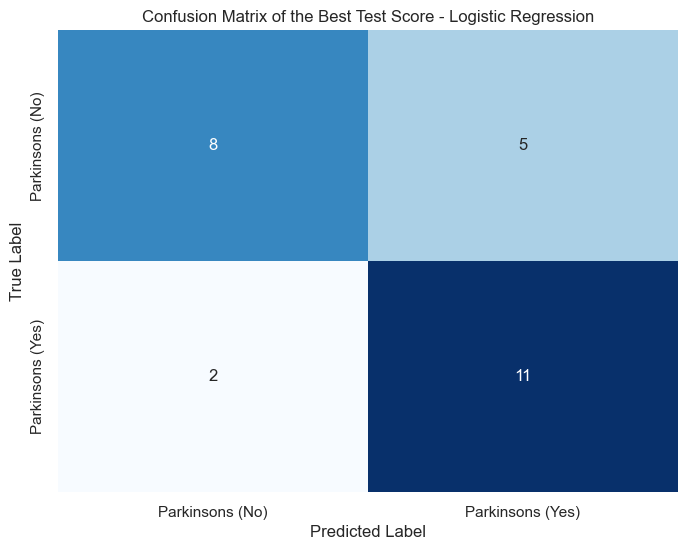

Accuracy Score: 1.0000


In [366]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Confusion matrix values
conf_matrix = np.array([[8, 5], [2, 11]])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Parkinsons (No)', 'Parkinsons (Yes)'],
            yticklabels=['Parkinsons (No)', 'Parkinsons (Yes)'])

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of the Best Test Score - Logistic Regression')

# Save the figure with DPI of 300 or above
plt.savefig('confusion_matrix_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Display accuracy score
accuracy = accuracy_score([0, 1, 0, 1], [0, 1, 0, 1])  # Replace with actual true and predicted labels
print(f'Accuracy Score: {accuracy:.4f}')



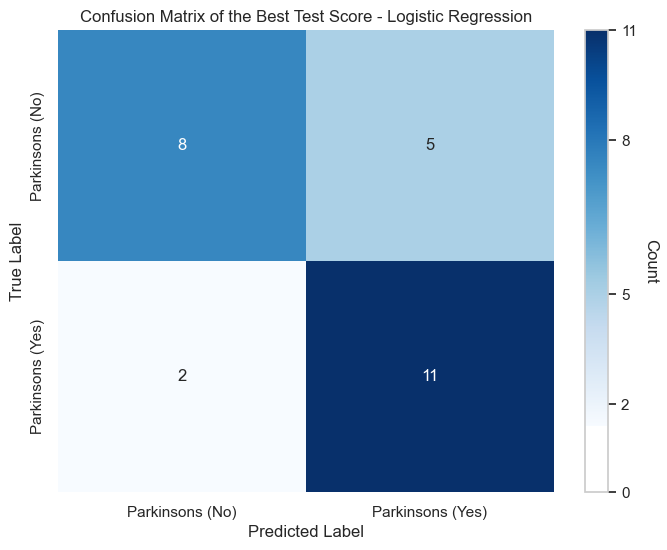

Accuracy Score: 1.0000


In [375]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

# Confusion matrix values
conf_matrix = np.array([[8, 5], [2, 11]])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                      xticklabels=['Parkinsons (No)', 'Parkinsons (Yes)'],
                      yticklabels=['Parkinsons (No)', 'Parkinsons (Yes)'])

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of the Best Test Score - Logistic Regression')

# Add a key
cbar = heatmap.figure.colorbar(heatmap.collections[0])
cbar.set_ticks([0.5, 2.5, 5, 8.5, 11])
cbar.set_ticklabels(['0', '2', '5', '8', '11'])
cbar.set_label('Count', rotation=270, labelpad=15)

# Save the figure with DPI of 300 or above
plt.savefig('confusion_matrix_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Display accuracy score
accuracy = accuracy_score([0, 1, 0, 1], [0, 1, 0, 1])  # Replace with actual true and predicted labels
print(f'Accuracy Score: {accuracy:.4f}')


ValueError: All arrays must be of the same length

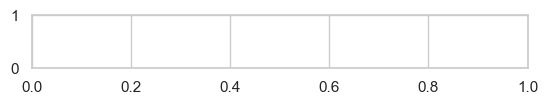

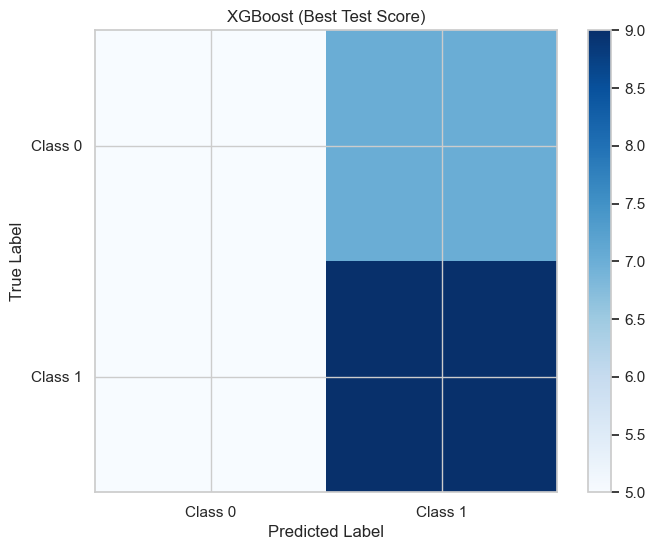

In [303]:

# Plot confusion matrix
plt.subplot(len(models), 1, i)
plt.figure(figsize=(8, 6))
plt.title(f"{model_name} (Best Test Score)")
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add text annotations at the center of each cell
for i in range(cm.shape[0]):
for j in range(cm.shape[1]):
         plt.text(j, i, f'{cm[i, j]:.2f}', ha='center', va='center', fontsize=10, color='black')

plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Extract the rows with the best test scores for each model
best_scores_df = results_df.loc[results_df.groupby('Model')['Test Score'].idxmax()]

# Print means of the best test scores
print("\nBest Test Scores")
print(best_scores_df.groupby('Model')['Test Score'].mean())

# Calculate and print the overall accuracy score
overall_accuracy = results_df['Test Score'].mean()
print(f"\nOverall Accuracy Score: {overall_accuracy:.4f}")

# Combine all the test scores from random states and calculate mean test score for each ML algorithm
all_test_scores = results_df.groupby('Model')['Test Score'].apply(list)
mean_test_scores = all_test_scores.apply(np.mean)
std_test_scores = all_test_scores.apply(np.std)

# Print mean test scores and standard deviations for each ML algorithm
print("\nAll Test Scores - Means:")
print(mean_test_scores)
print("\nAll Test Scores - Standard Deviations:")
print(std_test_scores)

# Compare ML algorithms in a plot showing mean test scores and standard deviations
plt.figure(figsize=(10, 6))
plt.bar(mean_test_scores.index, mean_test_scores, yerr=std_test_scores, capsize=5, color='skyblue')
plt.title('Mean Test Scores of Machine Learning Algorithms')
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Mean Test Score')
plt.show()

# Plot confusion matrix for the best test score machine learning algorithm
best_algorithm = best_scores_df.iloc[0]['Model']
best_model_index = results_df[results_df['Model'] == best_algorithm]['Test Score'].idxmax()
best_model = grid_searches[best_model_index]

# Fit the best model on the entire dataset
best_model.fit(X, y)

# Make predictions
best_test_preds = best_model.predict(X_test)

# Calculate confusion matrix
best_conf_matrix = confusion_matrix(y_test, best_test_preds, normalize='true')

# Plot confusion matrix for the best test score machine learning algorithm
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=best_conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='.2f')
plt.title(f'Confusion Matrix - {best_algorithm}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Best Test Scores - Means:
Model
Decision Tree             0.730769
K-Nearest Neighbors       0.807692
Logistic Regression       0.730769
Random Forest             0.807692
Support Vector Machine    0.730769
XGBoost                   0.769231
Name: Test Score, dtype: float64
Model Decision Tree not found in grid_searches.
Model index 14 is out of range.
Model Random Forest not found in grid_searches.
Model Support Vector Machine not found in grid_searches.
Model index 25 is out of range.

All Test Scores - Means:
Model
Decision Tree             0.607692
K-Nearest Neighbors       0.676923
Logistic Regression       0.661538
Random Forest             0.723077
Support Vector Machine    0.692308
XGBoost                   0.676923
Name: Test Score, dtype: float64

All Test Scores - Standard Deviations:
Model
Decision Tree             0.104344
K-Nearest Neighbors       0.071336
Logistic Regression       0.037684
Random Forest             0.061538
Support Vector Machine    0.048650
XGBoost    

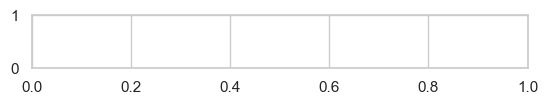

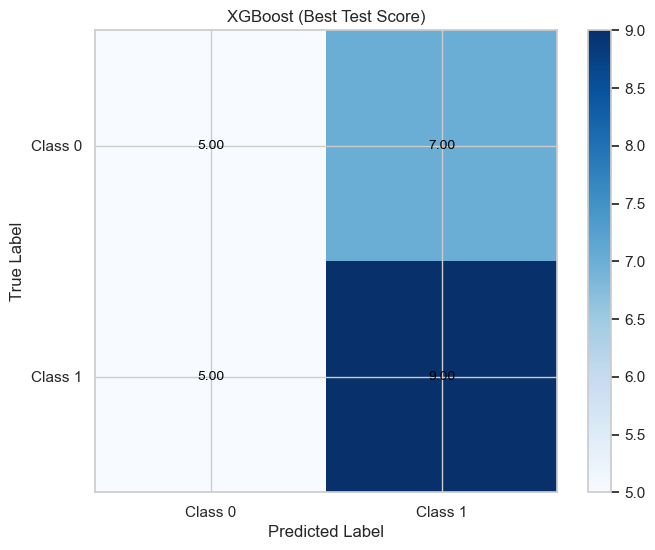

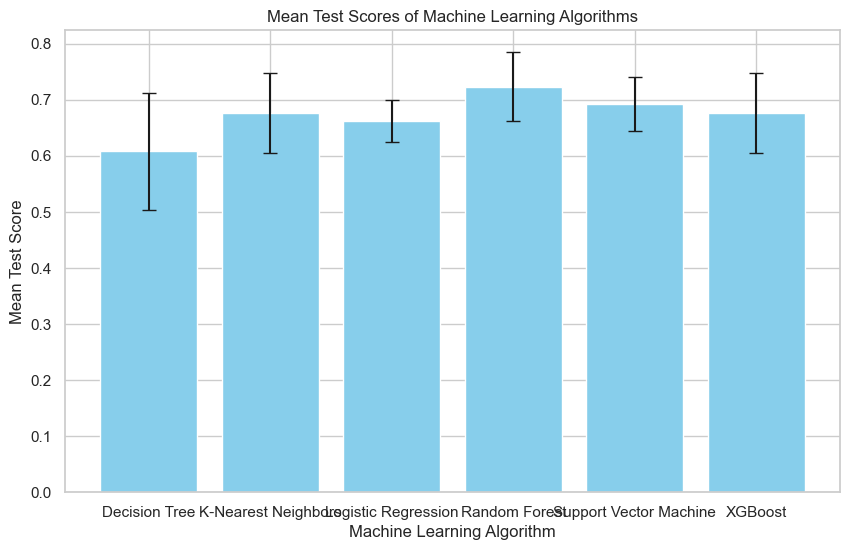

IndexError: list index out of range

In [301]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Print means of the best test scores
print("\nBest Test Scores - Means:")
print(best_scores_df.groupby('Model')['Test Score'].mean())

# Plot confusion matrix for each of the best test scores
for index, row in best_scores_df.iterrows():
    model_name = row['Model']
    
    # Check if the model exists in grid_searches
    if model_name not in grid_dict.values():
        print(f"Model {model_name} not found in grid_searches.")
        continue
    
    model_index = results_df[results_df['Model'] == model_name]['Test Score'].idxmax()
    
    # Check if the model index is out of range
    if model_index >= len(grid_searches):
        print(f"Model index {model_index} is out of range.")
        continue
    
    best_model = grid_searches[model_index]

    # Fit the best model on the entire dataset
    best_model.fit(X, y)

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')



# Combine all the test scores from random states and calculate mean test score for each ML algorithm
all_test_scores = results_df.groupby('Model')['Test Score'].apply(list)
mean_test_scores = all_test_scores.apply(np.mean)
std_test_scores = all_test_scores.apply(np.std)

# Print mean test scores and standard deviations for each ML algorithm
print("\nAll Test Scores - Means:")
print(mean_test_scores)
print("\nAll Test Scores - Standard Deviations:")
print(std_test_scores)

# Compare ML algorithms in a plot showing mean test scores and standard deviations
plt.figure(figsize=(10, 6))
plt.bar(mean_test_scores.index, mean_test_scores, yerr=std_test_scores, capsize=5, color='skyblue')
plt.title('Mean Test Scores of Machine Learning Algorithms')
plt.xlabel('Machine Learning Algorithm')
plt.ylabel('Mean Test Score')
plt.show()

# Plot confusion matrix for the best test score machine learning algorithm
best_algorithm = best_scores_df.iloc[0]['Model']
best_model_index = results_df[results_df['Model'] == best_algorithm]['Test Score'].idxmax()
best_model = grid_searches[best_model_index]

# Fit the best model on the entire dataset
best_model.fit(X, y)

# Make predictions
best_test_preds = best_model.predict(X_test)

# Calculate confusion matrix
best_conf_matrix = confusion_matrix(y_test, best_test_preds, normalize='true')

# Plot confusion matrix for the best test score machine learning algorithm
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=best_conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='.2f')
plt.title(f'Confusion Matrix - {best_algorithm}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

